In [13]:
#cabeceras 
import numpy as np   
import pandas as pd  
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def leer_datos(dataset):
    data = pd.read_csv(dataset) 
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return x,y

def normalizar_datos(x):
    x_media = x.mean(axis=0)
    x_std = x.std(axis=0)
    x  = (x - x_media)/x_std
    return x

def dividir_datos(X, y, porcentaje):
    X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=porcentaje, random_state=42)
    return X_train, X_test, y_train, y_test


# Funciones de la regresion logistica

In [ ]:
def sigmoidal(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

def calcular_funcion_costo(X, y, theta):
    y_predecido = sigmoidal(X, theta)
    cross_entropy = - y * np.log(y_predecido) - (1-y) * np.log(1-y_predecido)
    return (1/X.shape[0]) * np.sum(cross_entropy)

def calcular_gradiente(X, y, theta,i):
    hipotesis = sigmoidal(X,theta) 
    return X.T.dot((hipotesis - y))

def gradiente_descendiente(X, y, theta, num_iteracciones, tasa):
    costos = np.zeros(num_iteracciones)
    for i in range(num_iteracciones):
        theta -= tasa * calcular_gradiente(X, y, theta,i)
        costos[i] = calcular_funcion_costo(X,y,theta)
    return theta, costos

def accuracy(X, y, theta):
    predicciones = sigmoidal(X, theta)
    aciertos = 0
    for y_pred, y_real in zip(predicciones,y):
        if y_pred > 0.5: test = 1 
        else: test = 0
        if y_real == test:
            aciertos+=1
    return ((aciertos/y.shape[0]))
    


# Creacion de los folks para esta parte

In [ ]:
def create_k_folds(dataset, k, escoger = True):
    if escoger == True:
        data = pd.read_csv(dataset)
        data = data.iloc[:,:]
        size_subset = data.shape[0]/k
        cant_clase_0 = int(size_subset * data["Outcome"].value_counts()[0]/data.shape[0])
        cant_clase_1 = int(size_subset - cant_clase_0)
        print("cant. de clase 1:", cant_clase_1)

        sorted_data = data.sort_values(['Outcome'], ascending=[True])
        buffer = np.zeros(shape=(k,int(size_subset),data.shape[1]))

        idx = 0
        size_from = int(0)
        size_to = int(cant_clase_0)
        while idx<k:
            buffer[idx][:cant_clase_0][:] = sorted_data.iloc[size_from:size_to,:]
            size_from = size_to
            size_to += cant_clase_0
            #print(size_from, size_to)
            idx+=1

        idx = 0
        size_from = int(size_from)
        size_to = int(size_from + cant_clase_1)
        #print(size_from, size_to)
        while idx<k:
            buffer[idx][cant_clase_0:][:] = sorted_data.iloc[size_from:size_to,:]
            size_from = size_to
            size_to += cant_clase_1
            #print(size_from, size_to)
            idx+=1
        a = buffer[0]
        b = buffer[1]
        c = buffer[2]


        return a,b,c
    else: 
        data = pd.read_csv(dataset)
        data = data.iloc[:,:]
        size_subset = data.shape[0]/k
        cant_clase_0 = int(size_subset * data["target"].value_counts()[0]/data.shape[0])
        cant_clase_1 = int(size_subset - cant_clase_0)
        print("cant. de clase 1:", cant_clase_1)

        sorted_data = data.sort_values(['target'], ascending=[True])
        buffer = np.zeros(shape=(k,int(size_subset),data.shape[1]))

        idx = 0
        size_from = int(0)
        size_to = int(cant_clase_0)
        while idx<k:
            buffer[idx][:cant_clase_0][:] = sorted_data.iloc[size_from:size_to,:]
            size_from = size_to
            size_to += cant_clase_0
            #print(size_from, size_to)
            idx+=1

        idx = 0
        size_from = int(size_from)
        size_to = int(size_from + cant_clase_1)
        #print(size_from, size_to)
        while idx<k:
            buffer[idx][cant_clase_0:][:] = sorted_data.iloc[size_from:size_to,:]
            size_from = size_to
            size_to += cant_clase_1
            #print(size_from, size_to)
            idx+=1
        a = buffer[0]
        b = buffer[1]
        c = buffer[2]


        return a,b,c

# Ahora de Diabetes su creacion de folks y en un for dependiendo de las iteraciones y el theta para al final sacar como una tabla.



cant. de clase 1: 90
cant. de clase 1: 55


/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.6770833333333334 - 0.66796875 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.671875 - 0.6627604166666666 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.6705729166666666 - 0.66015625 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.6770833333333334 - 0.6666666666666666 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.6731770833333334 - 0.6614583333333334 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.6705729166666666 - 0.6627604166666666 - 
0.75 - 0.6380208333333334 - 0.6341145833333334 - 0.6328125 - 0.67578125 - 0.6653645833333334 - 



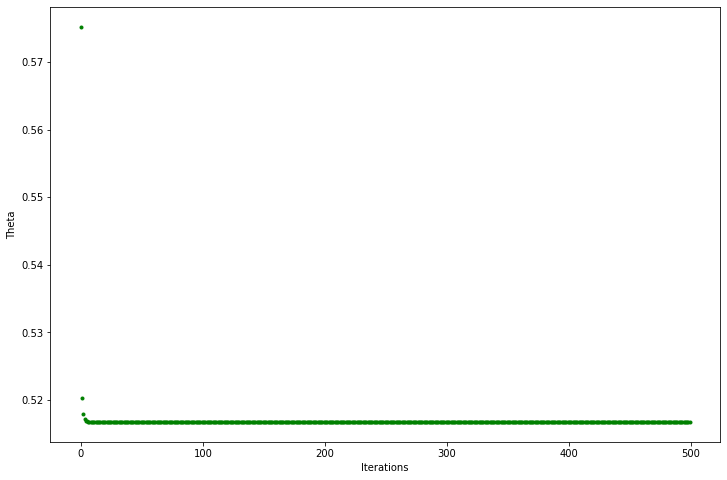

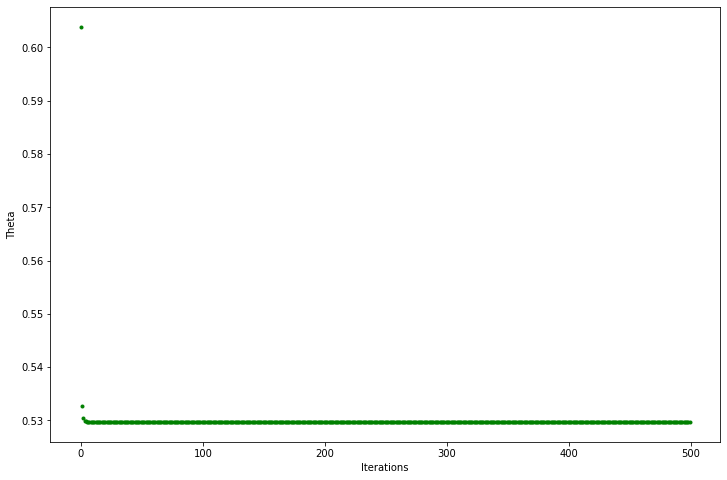

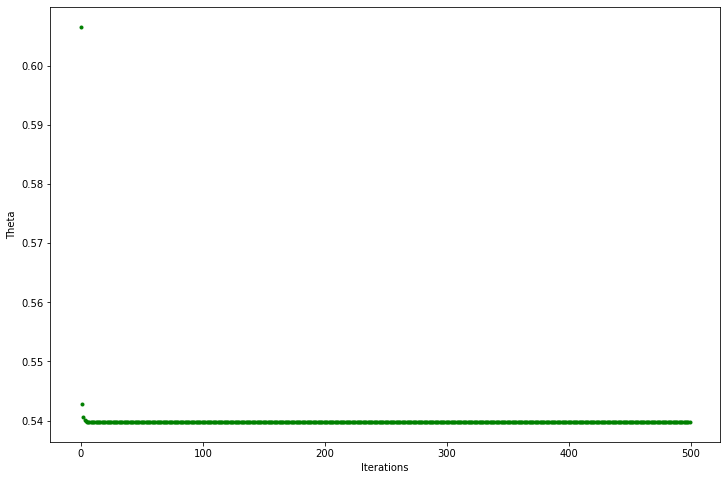

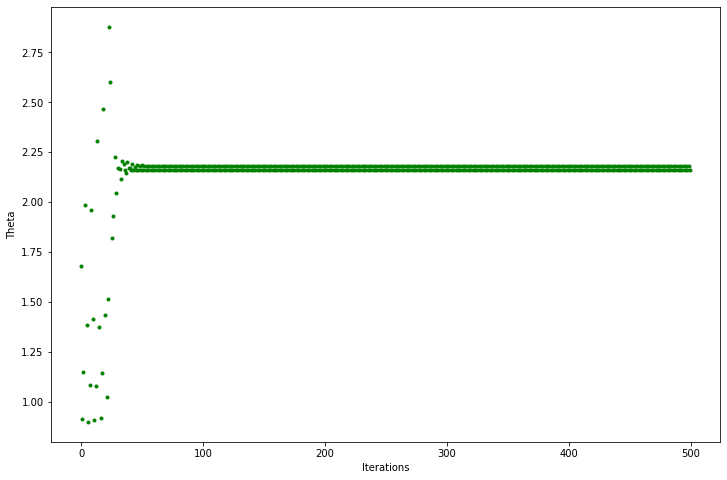

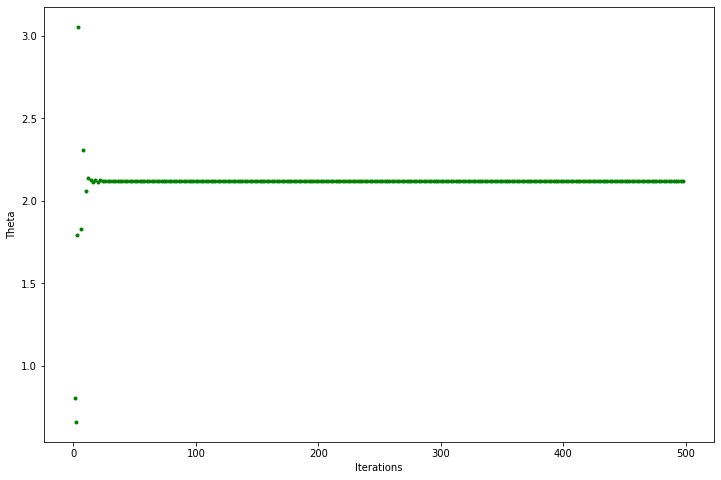

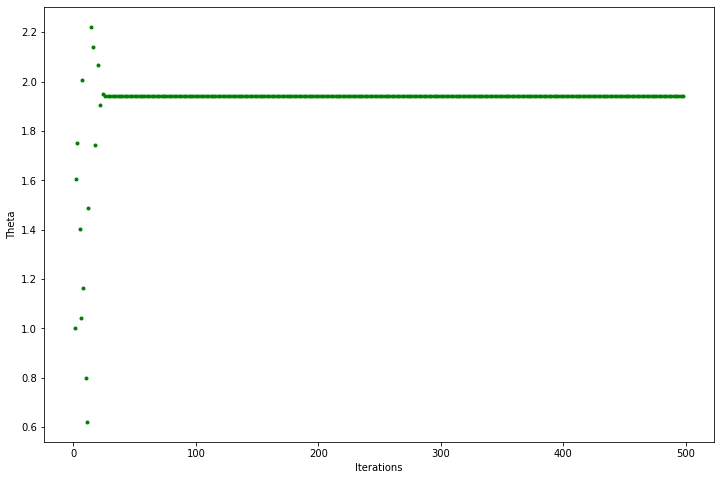

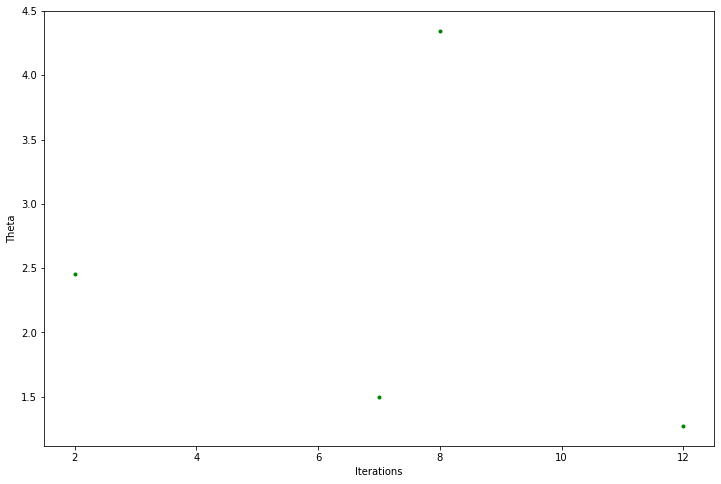

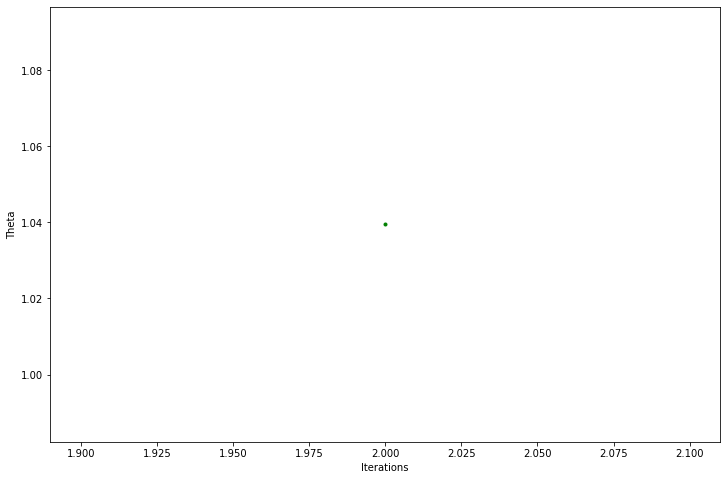

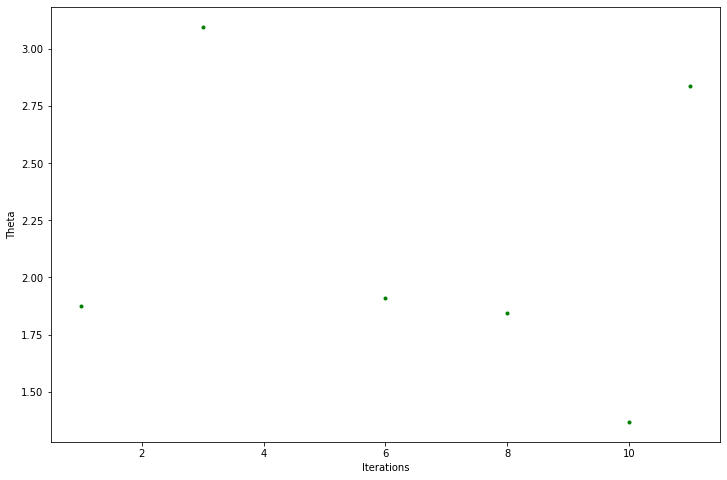

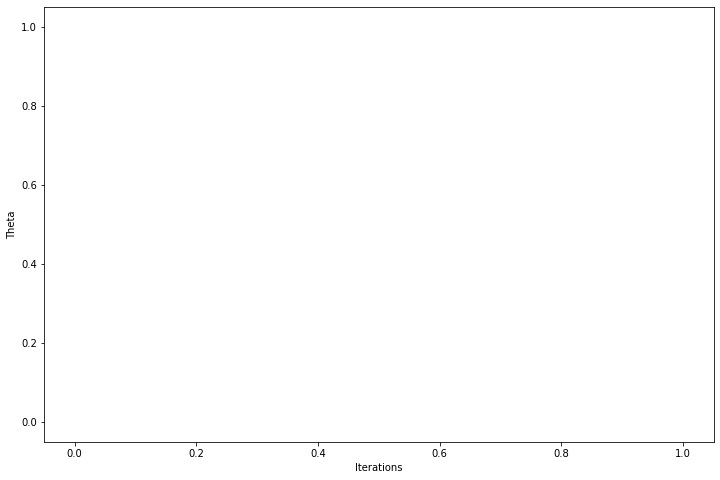

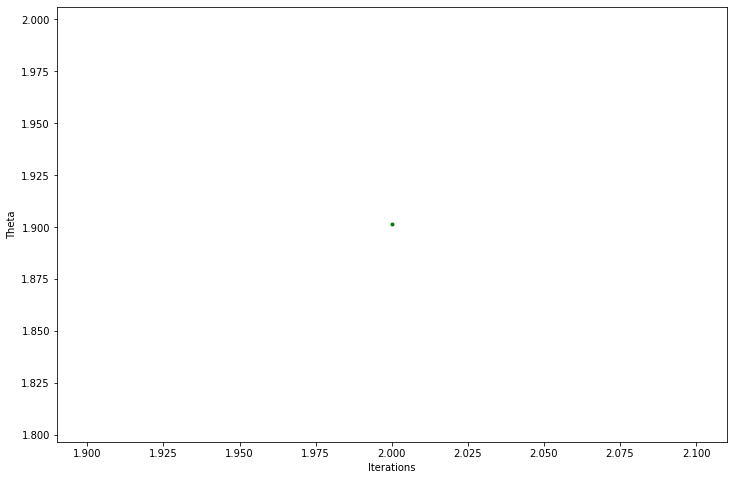

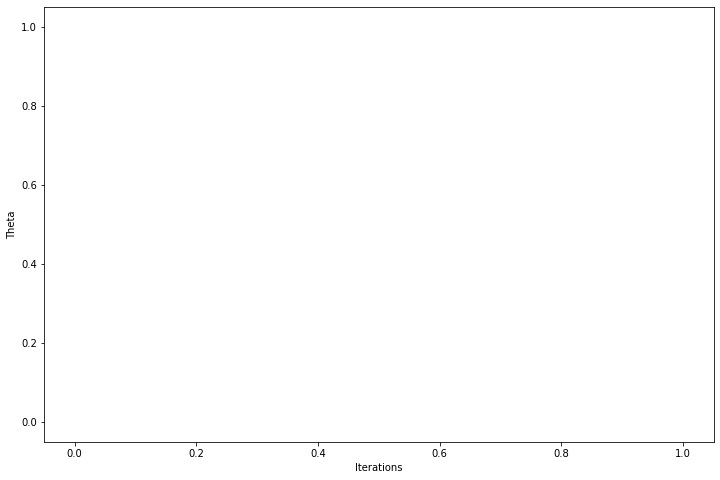

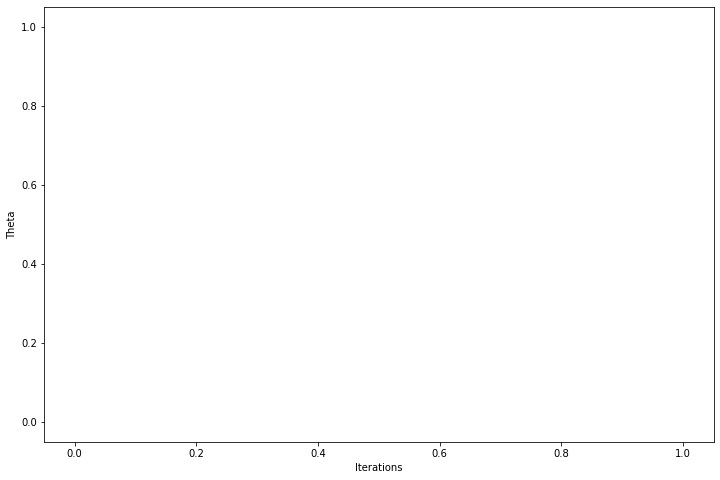

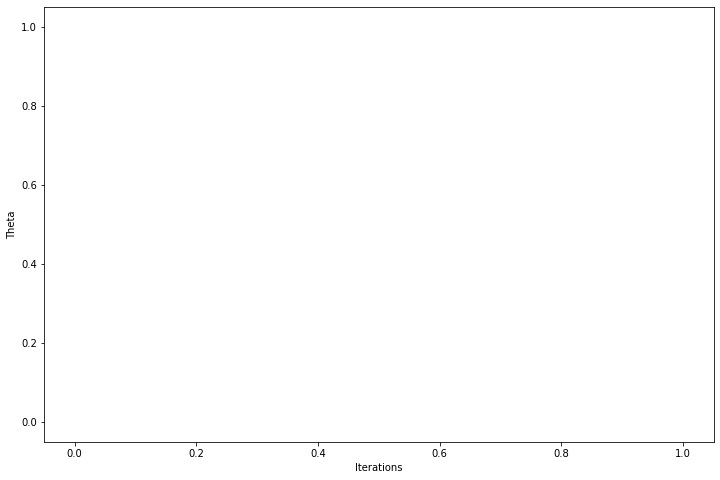

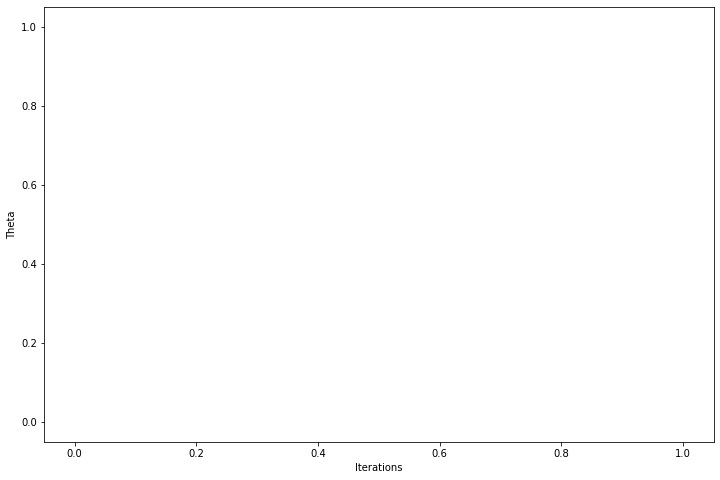

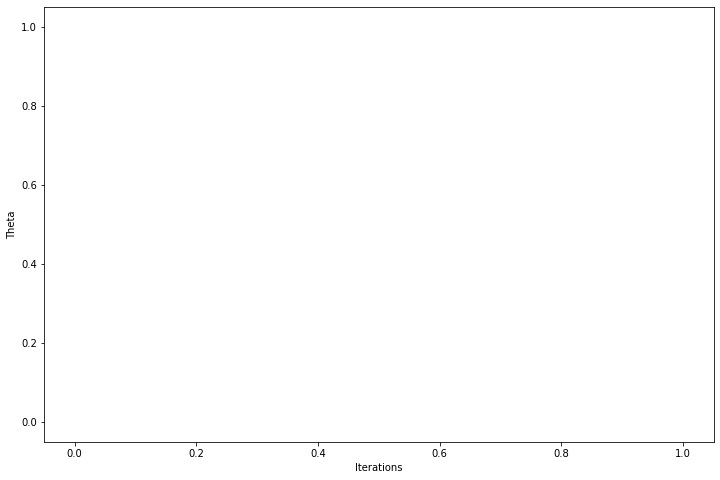

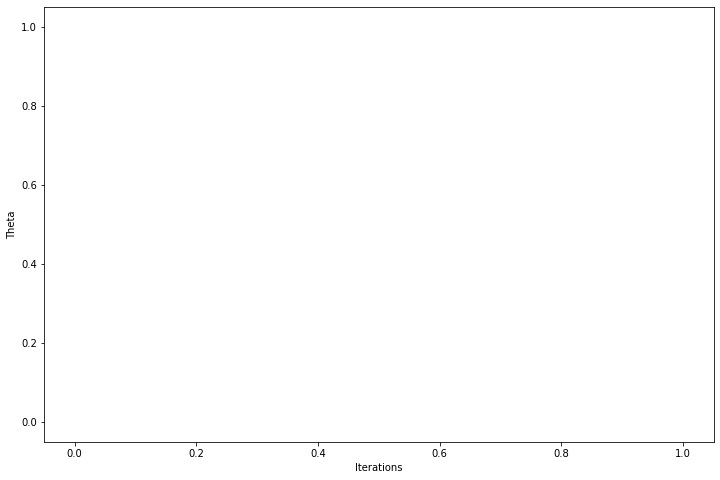

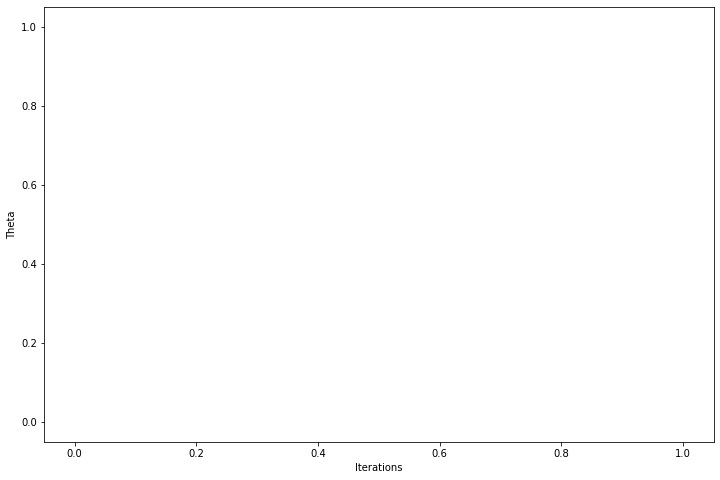

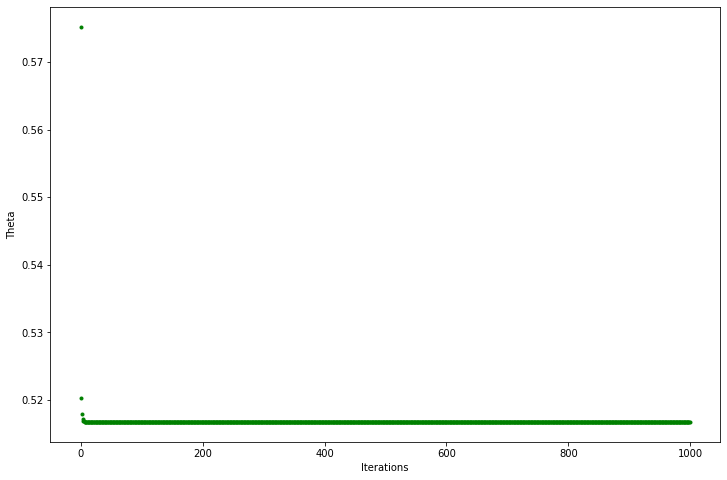

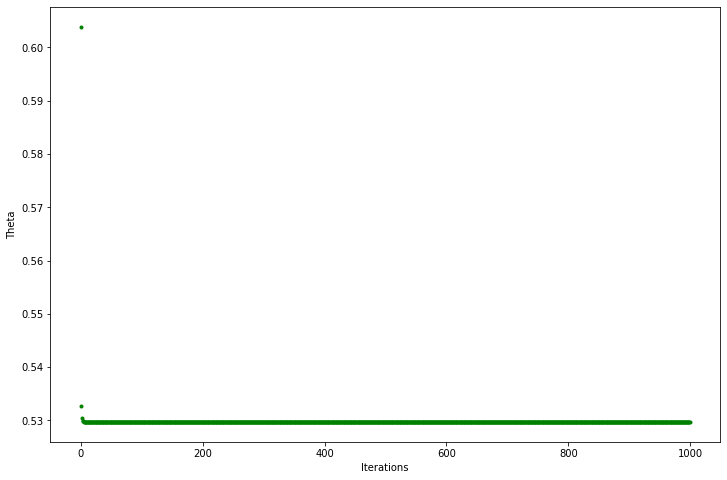

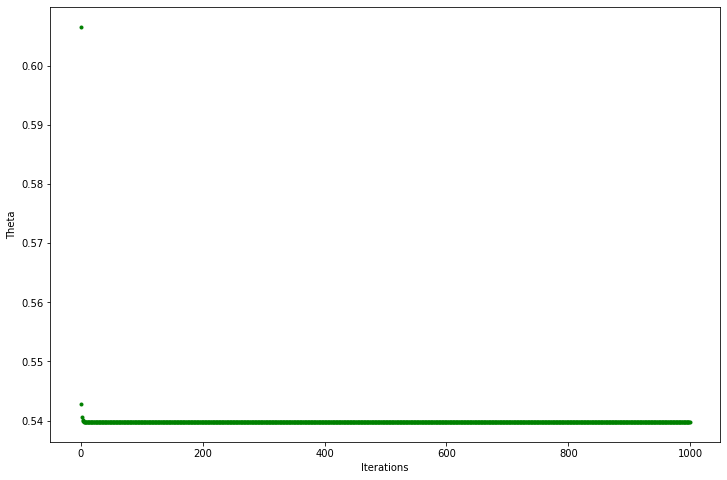

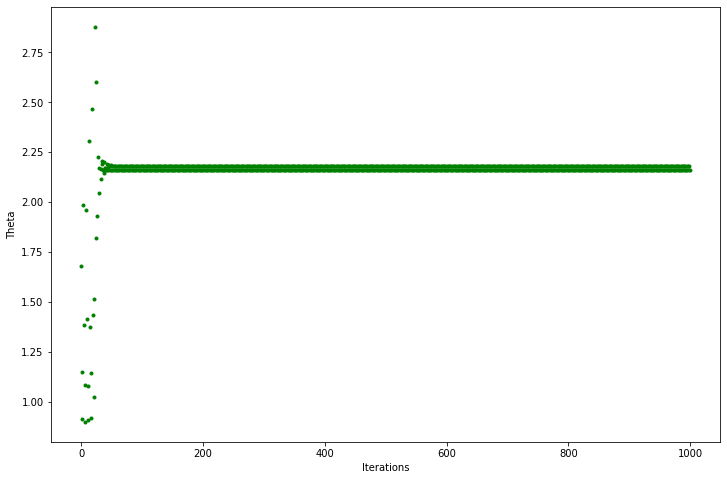

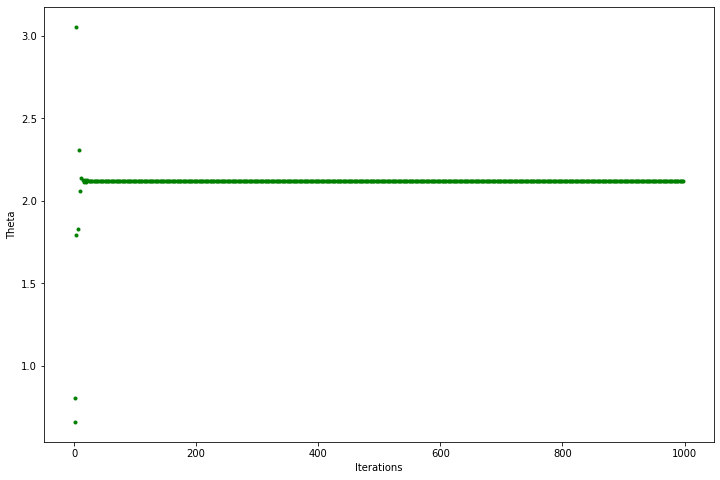

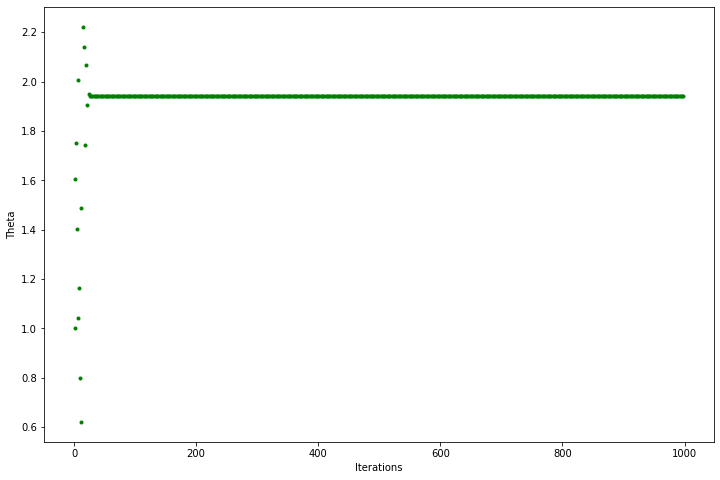

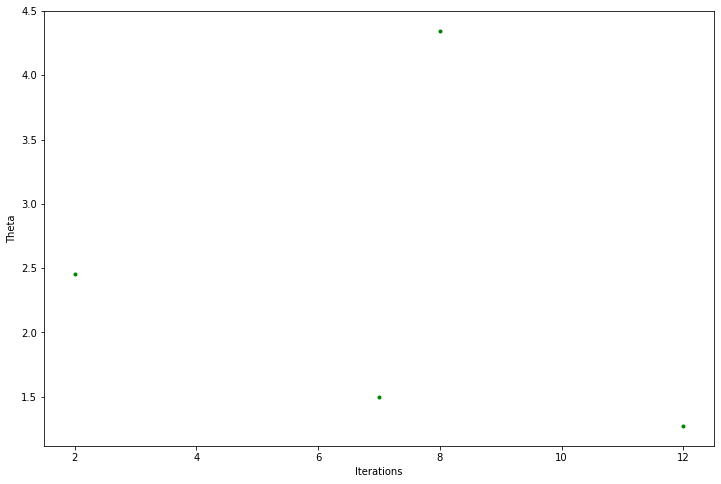

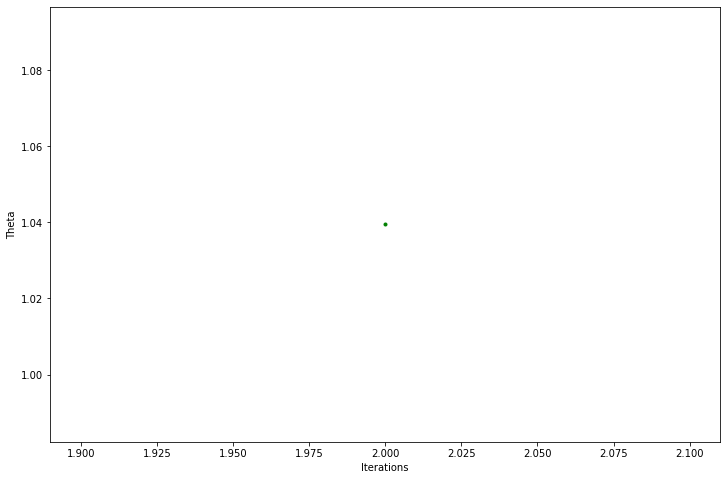

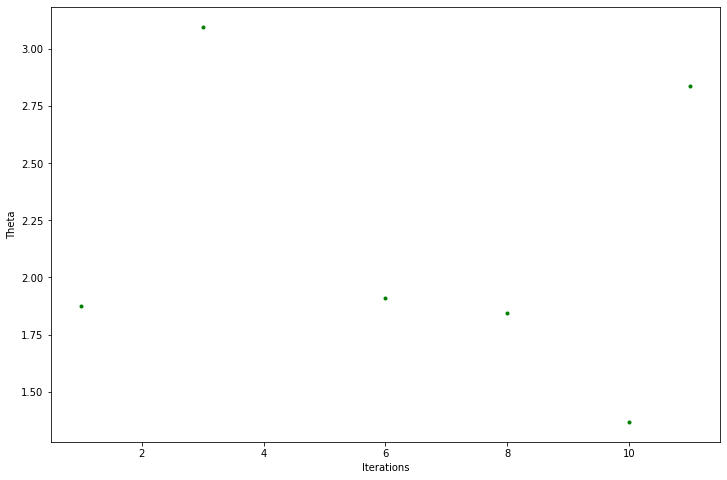

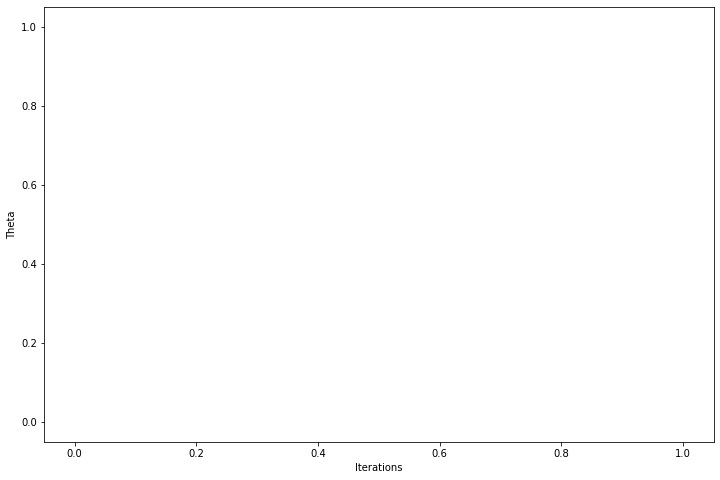

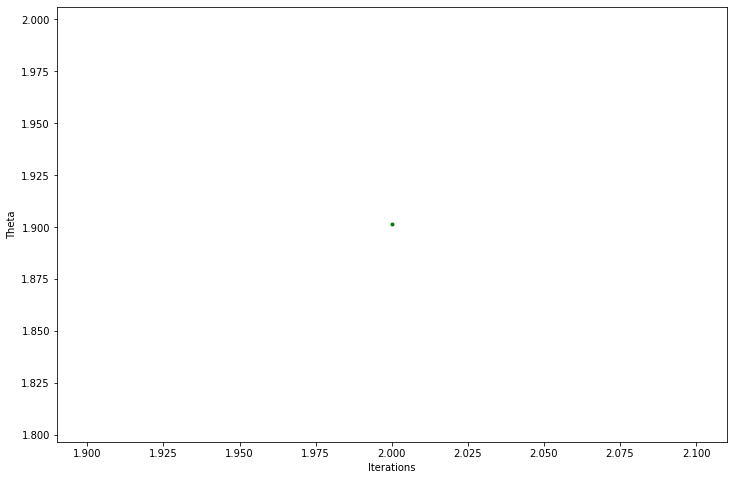

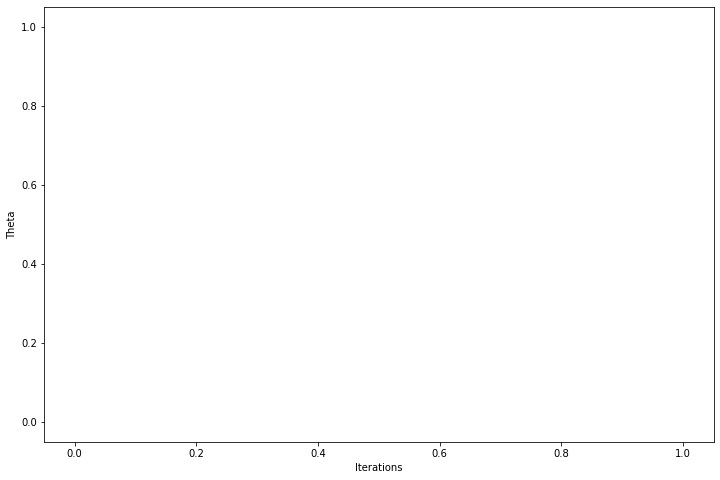

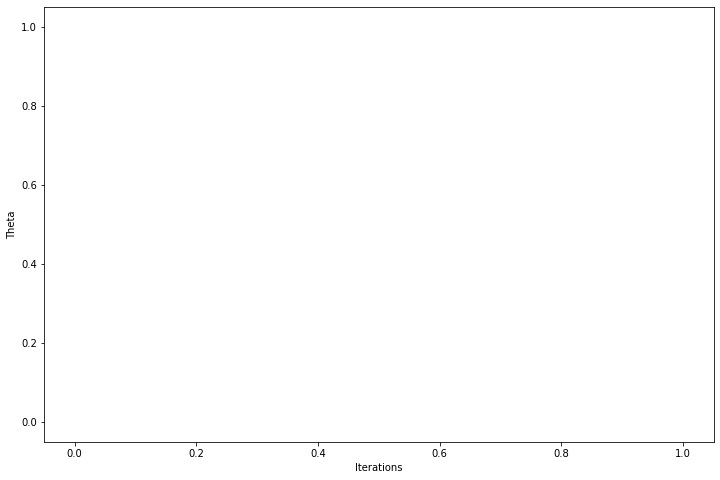

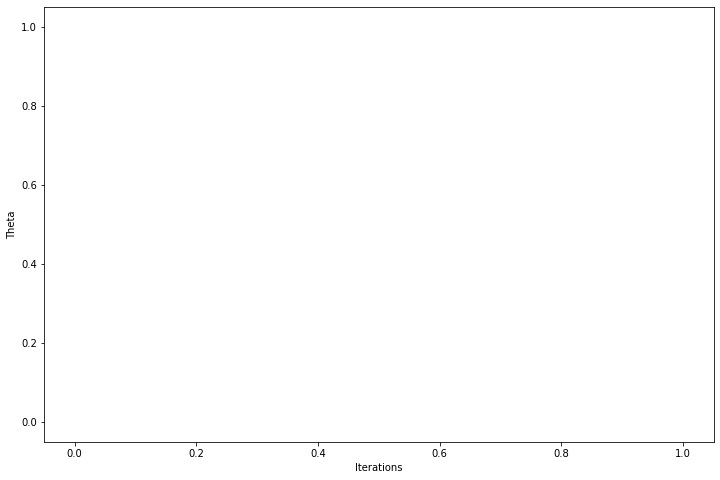

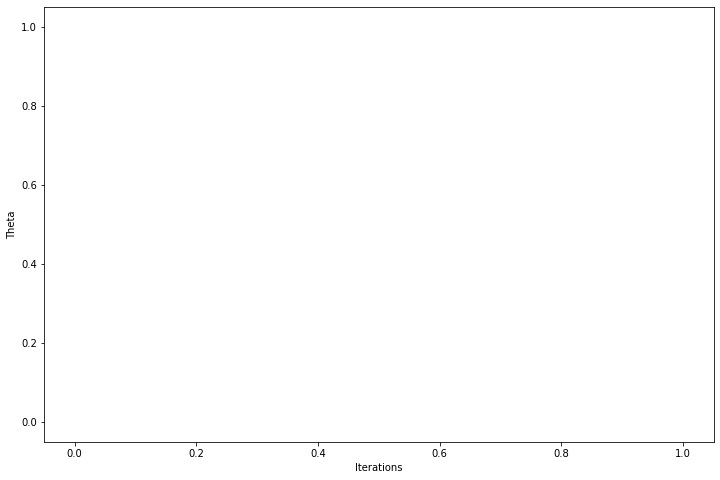

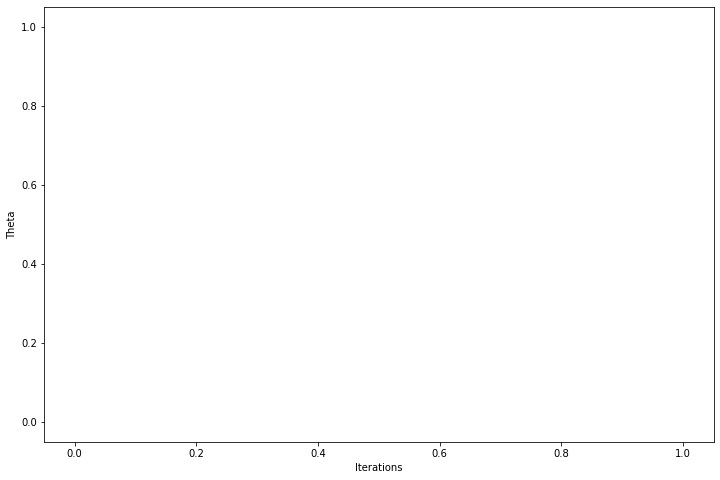

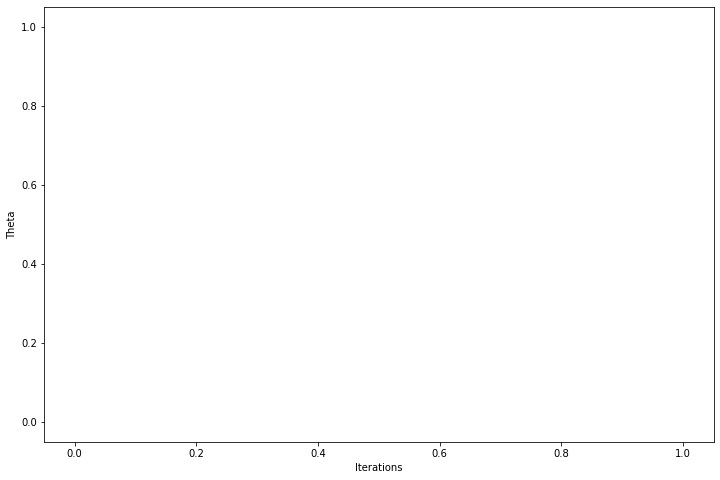

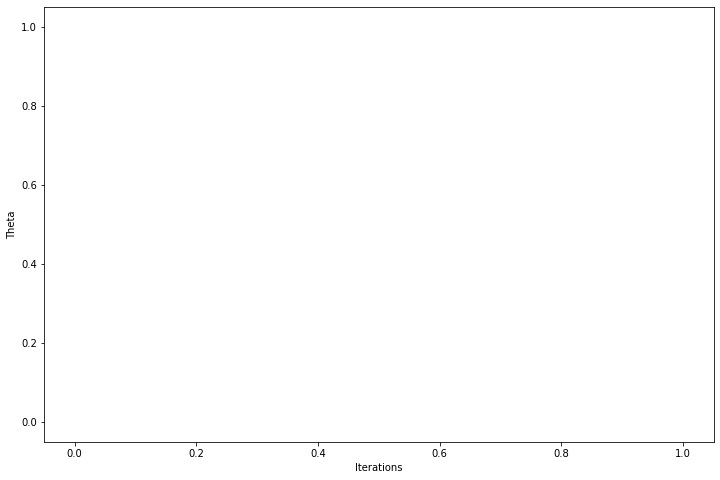

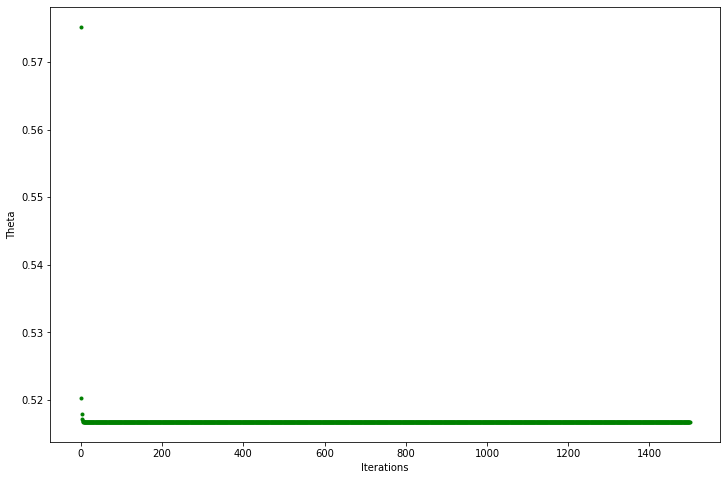

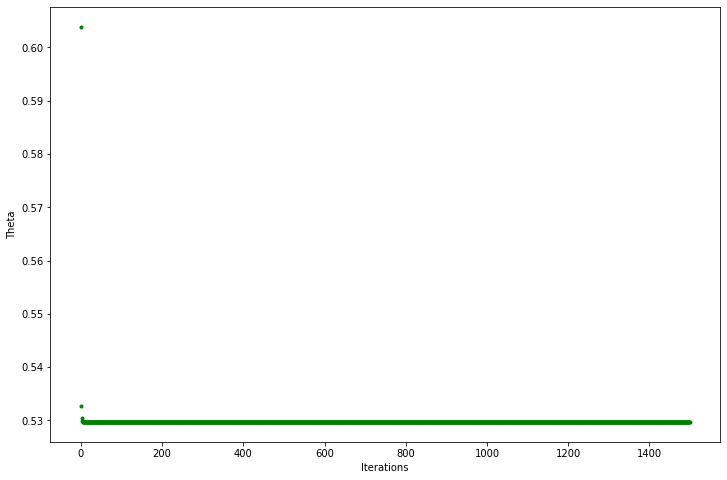

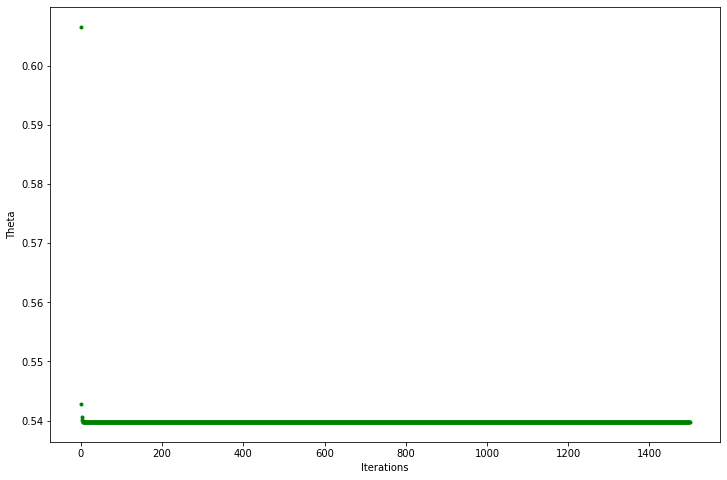

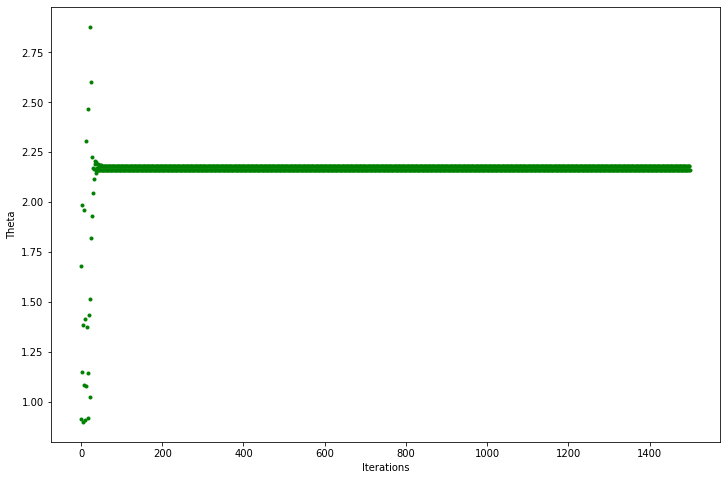

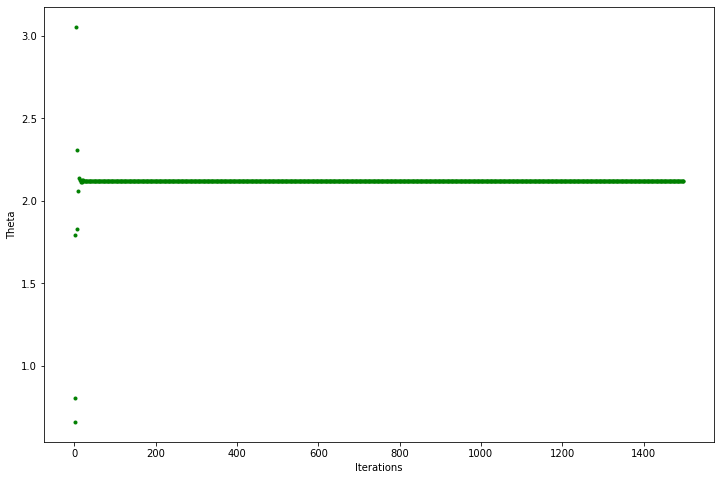

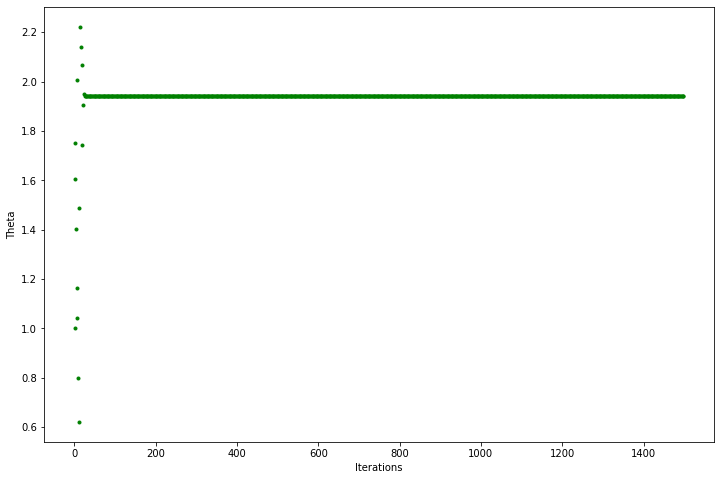

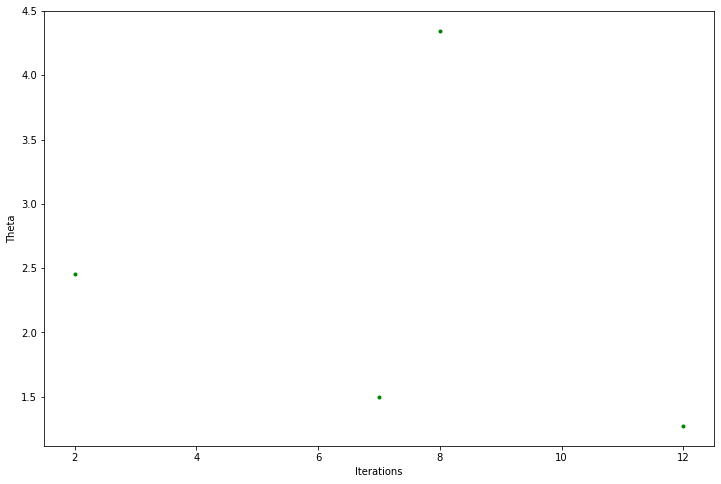

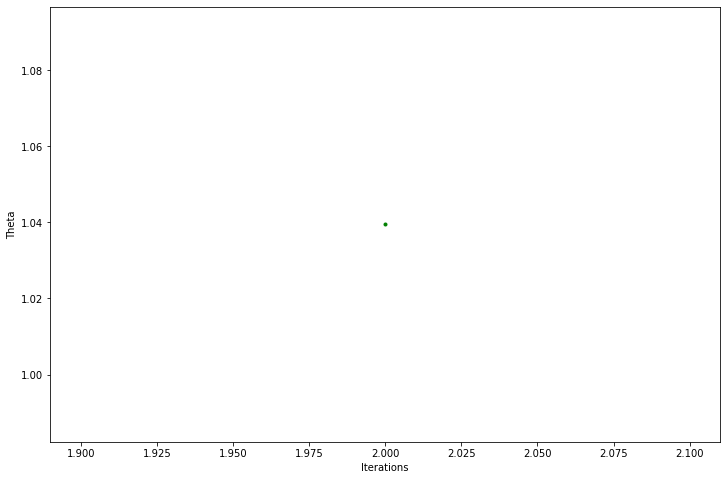

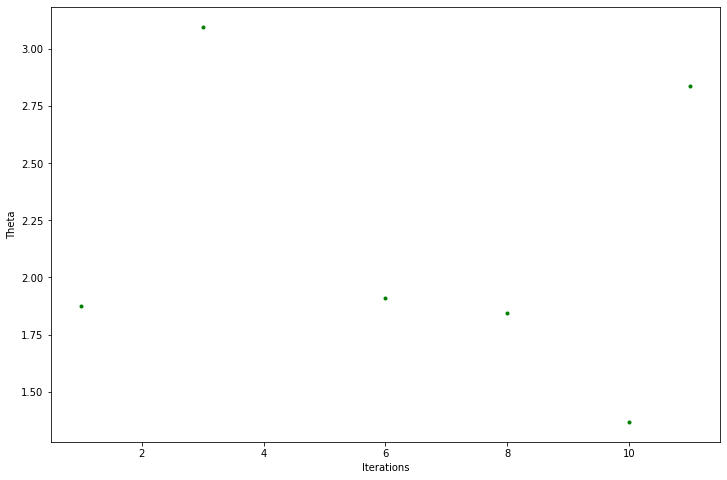

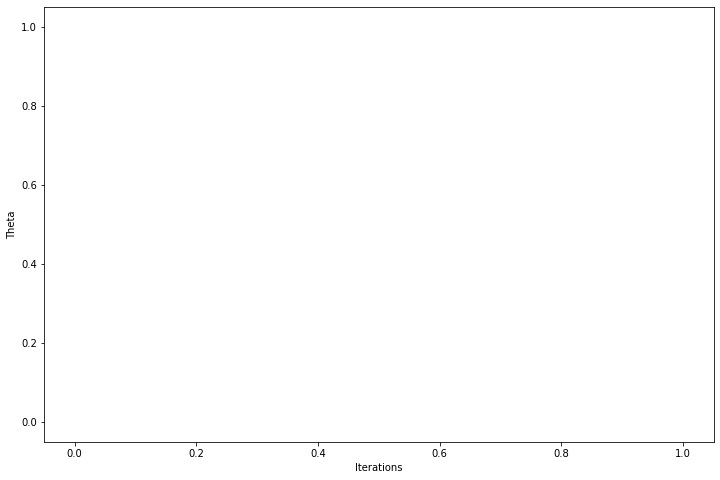

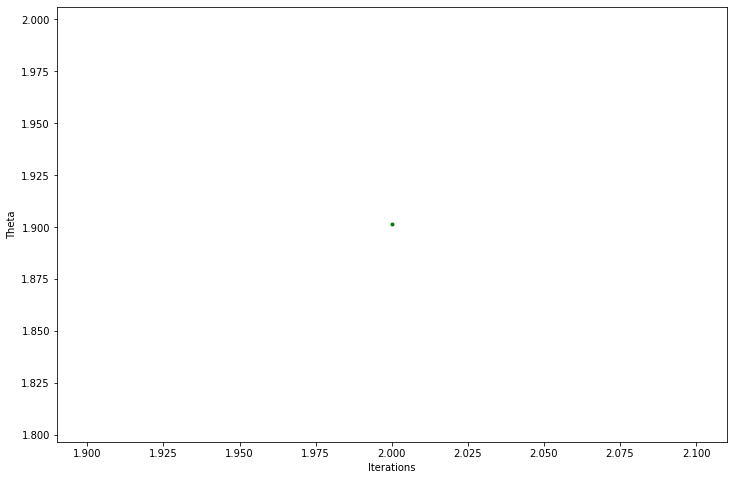

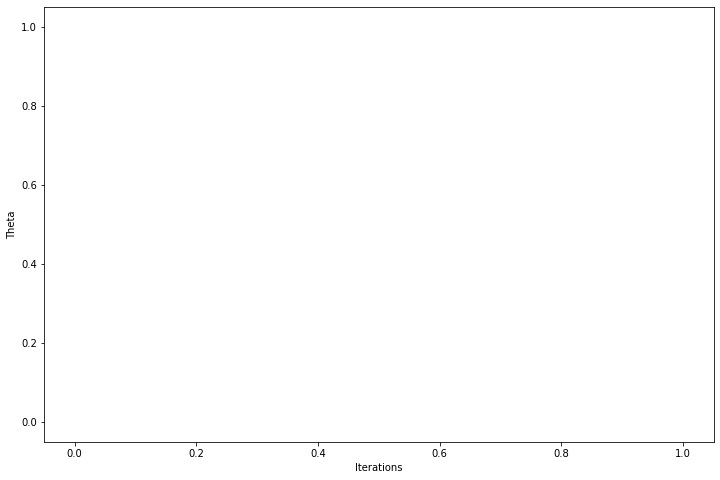

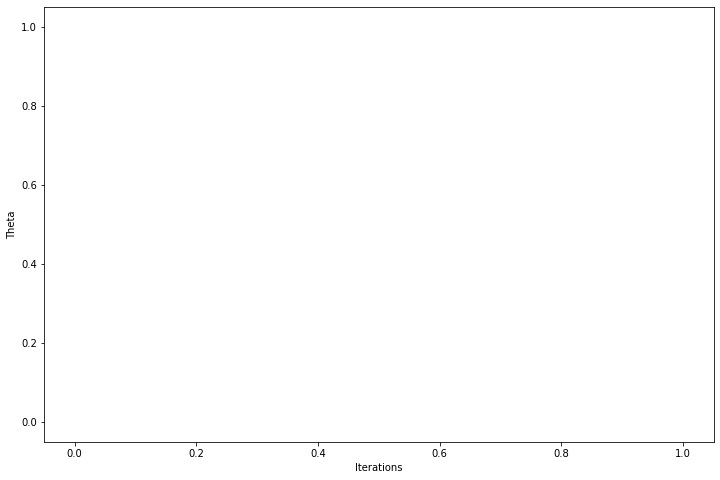

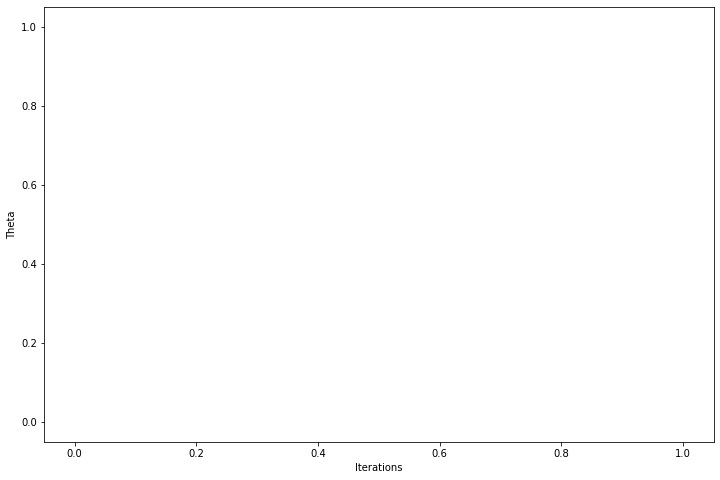

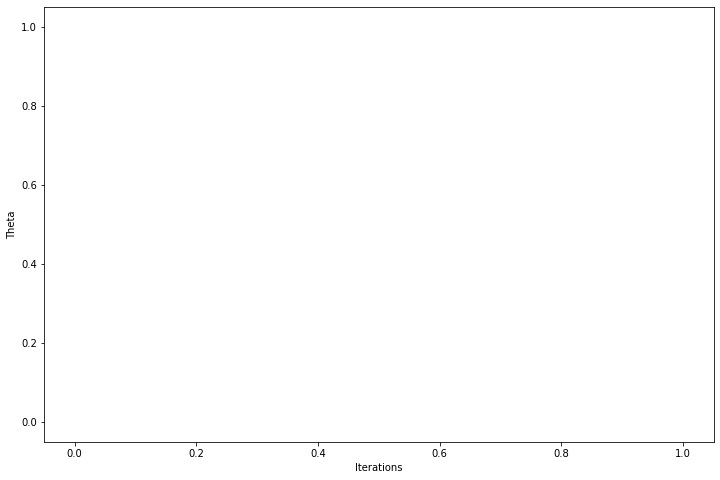

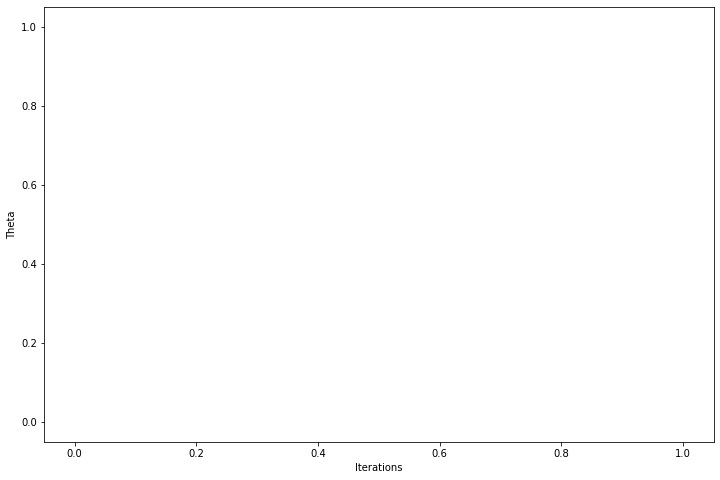

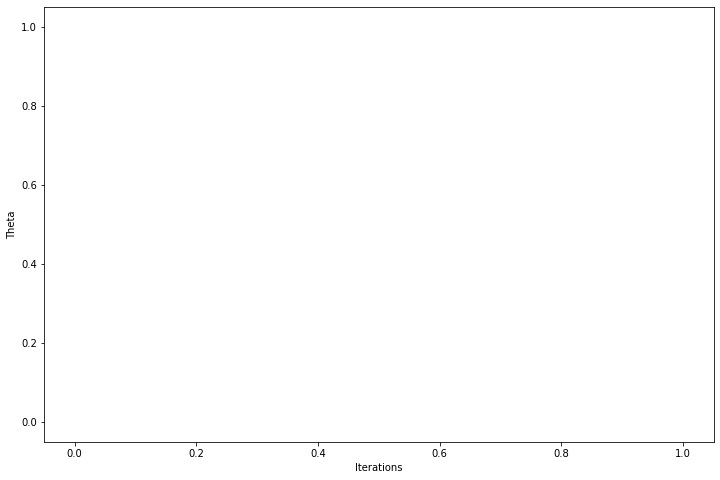

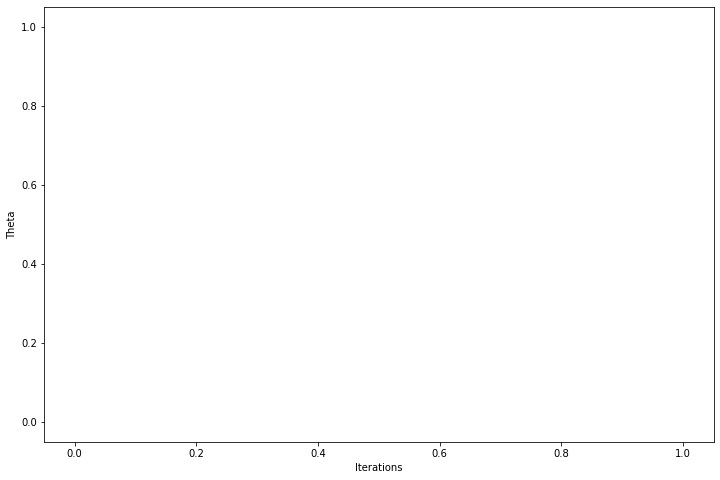

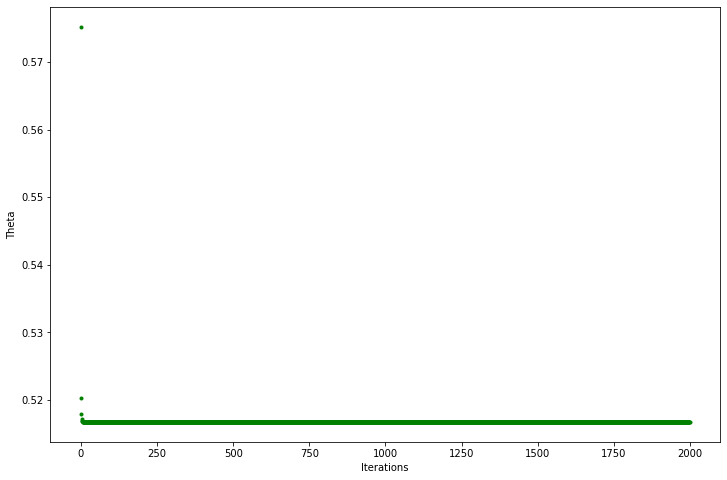

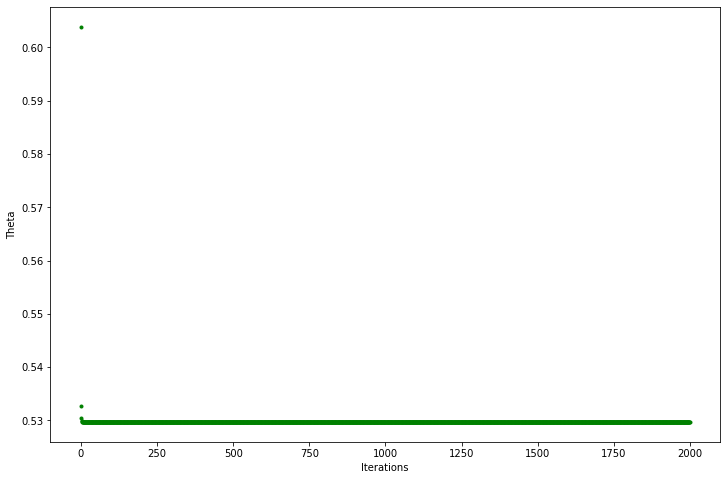

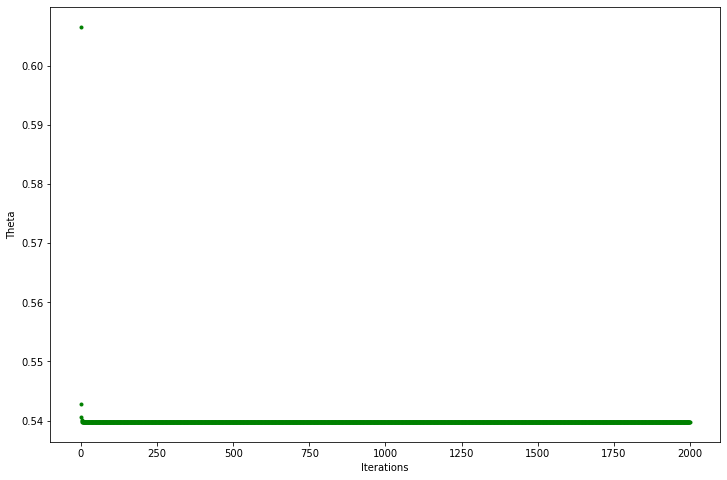

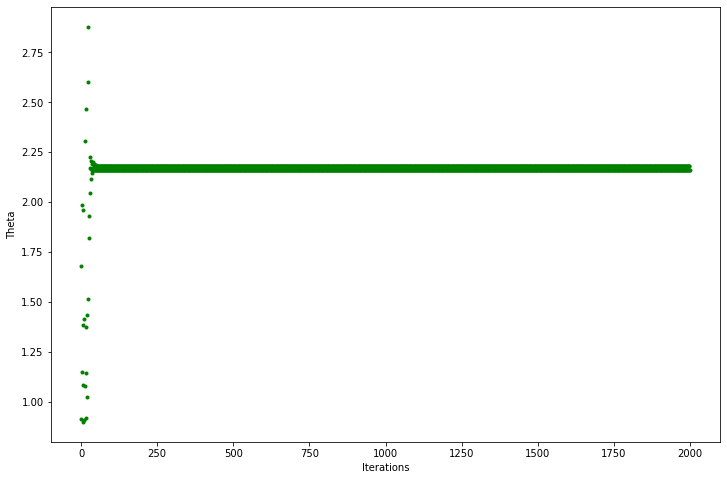

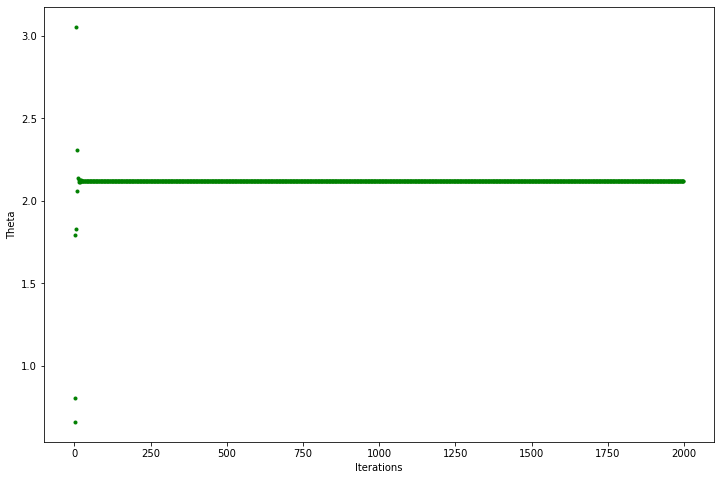

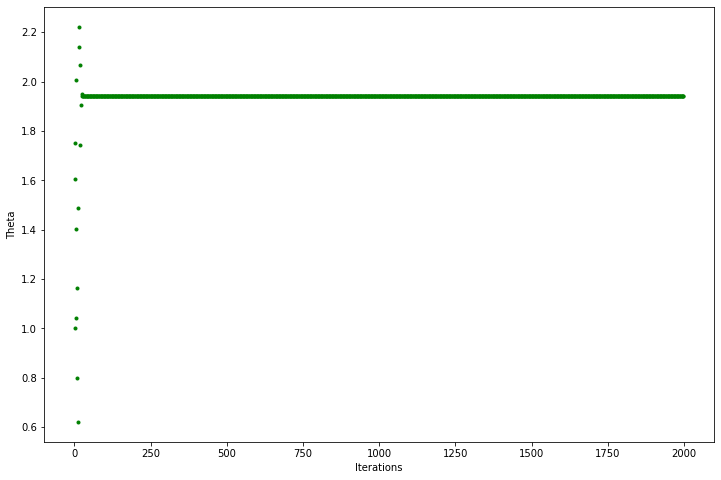

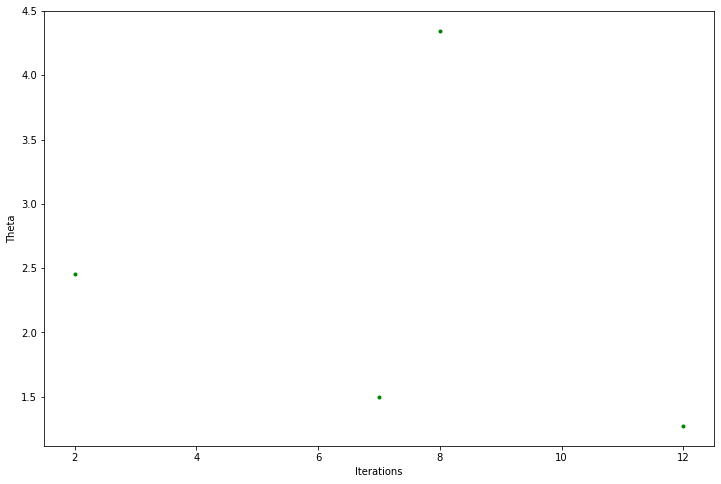

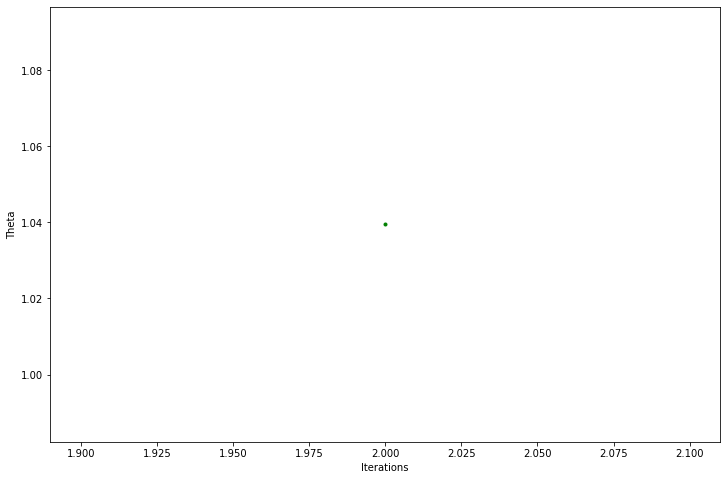

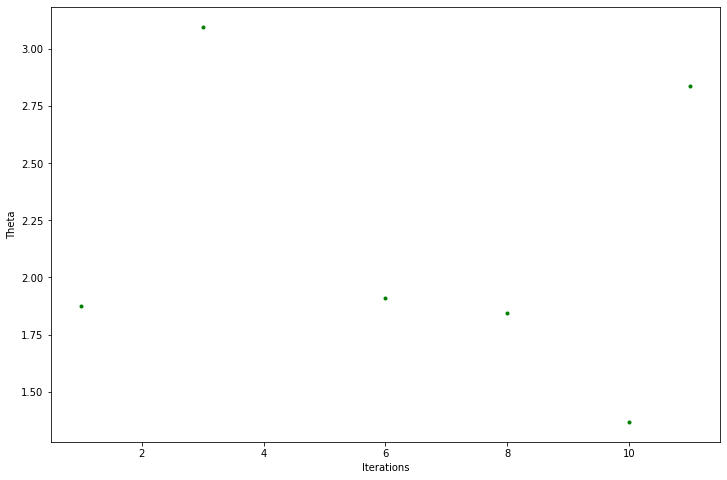

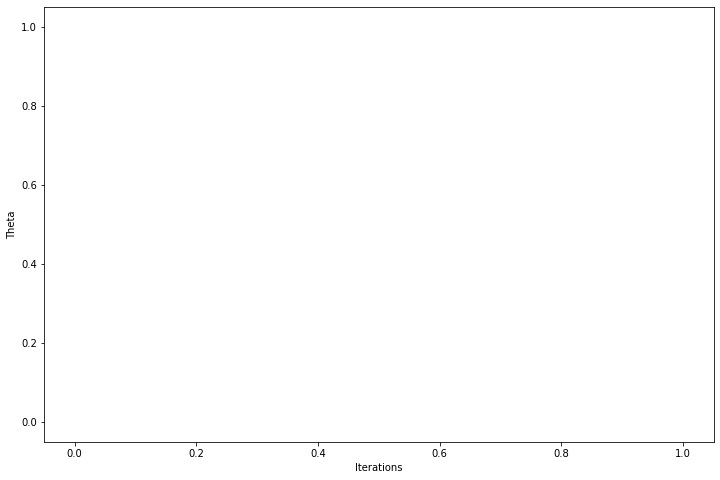

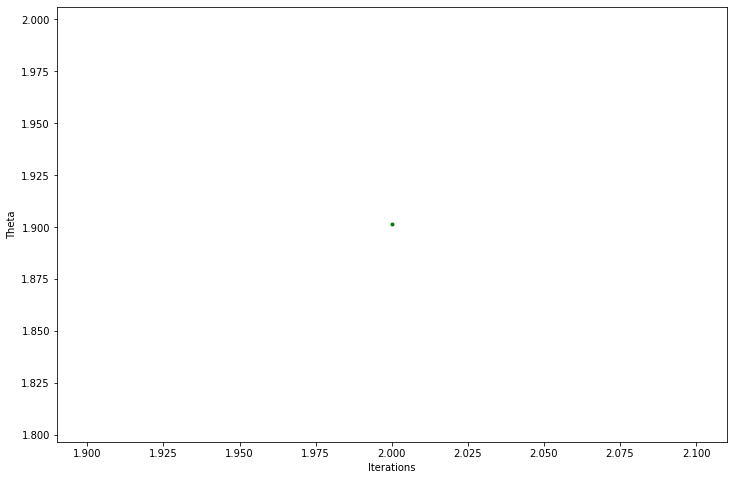

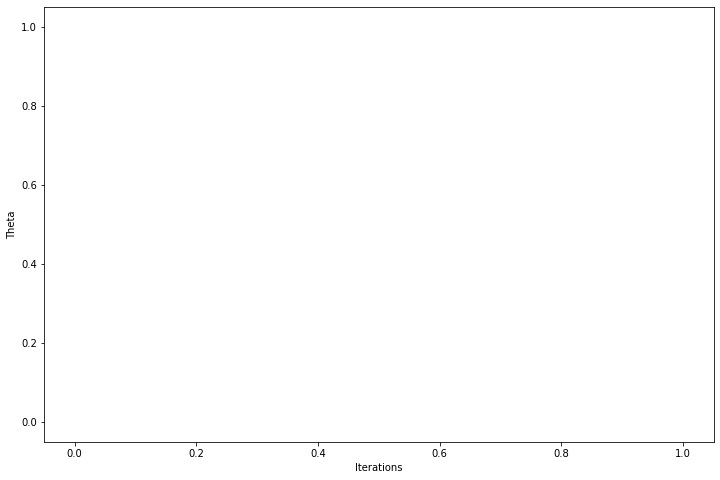

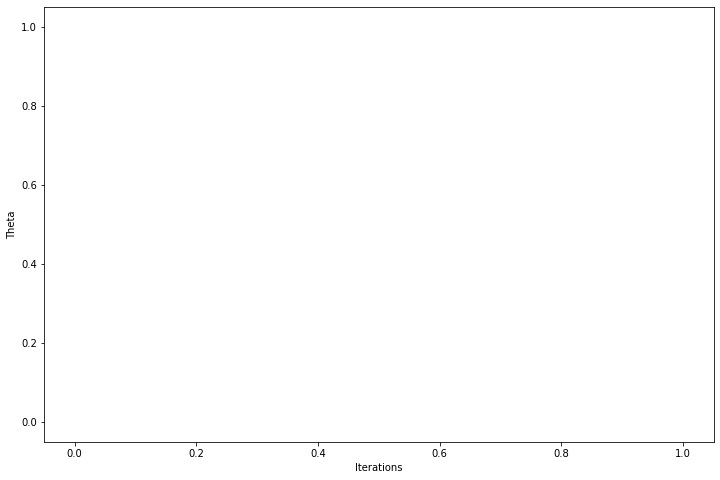

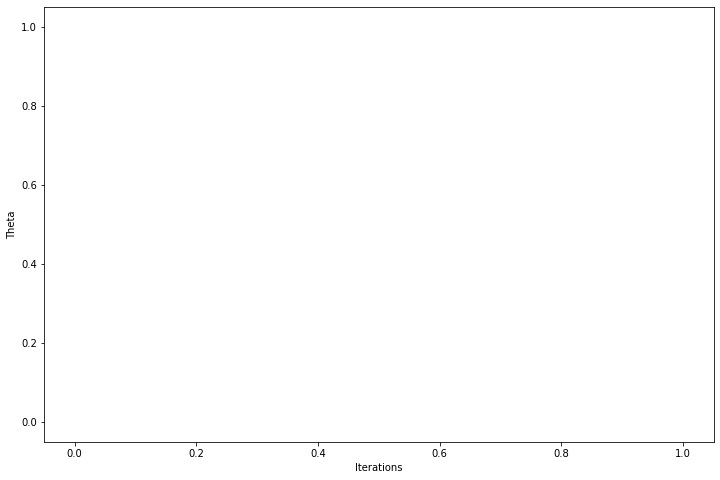

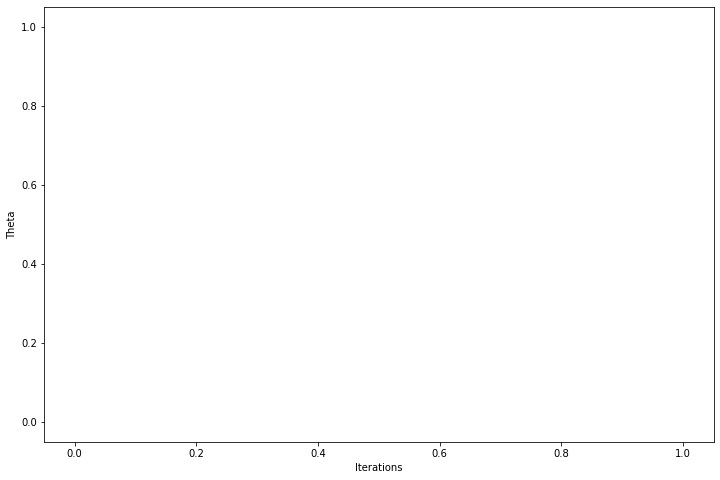

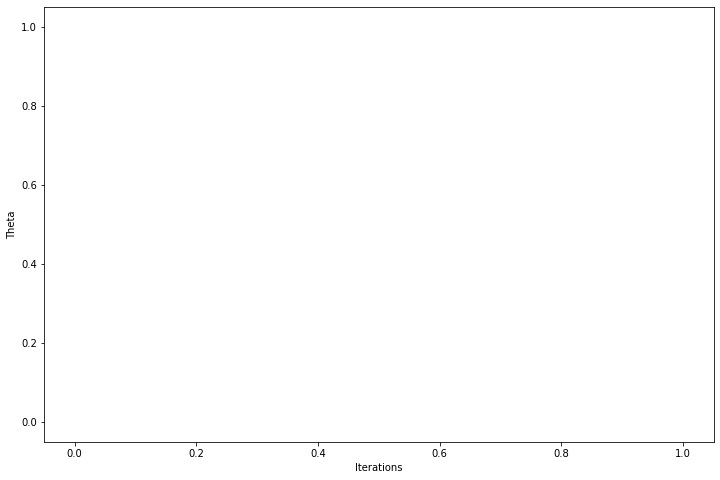

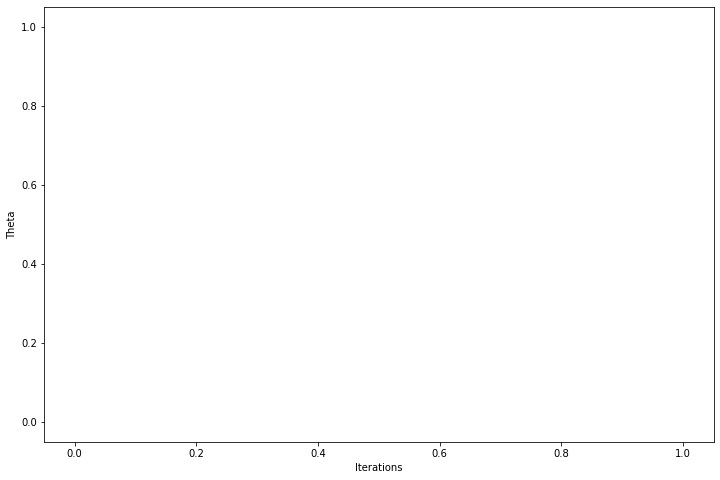

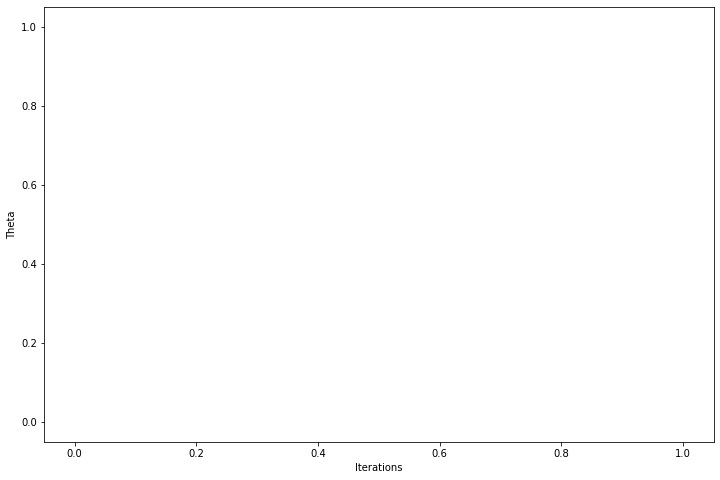

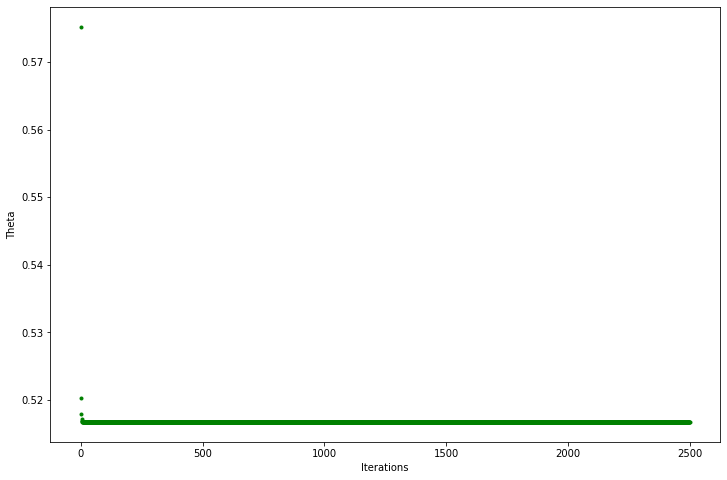

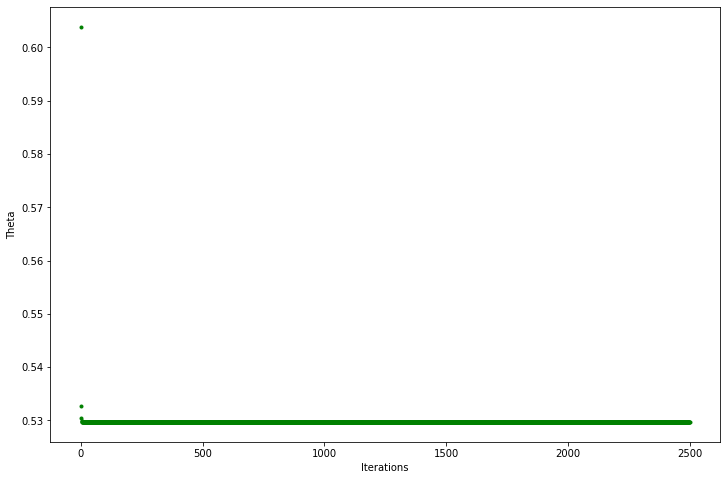

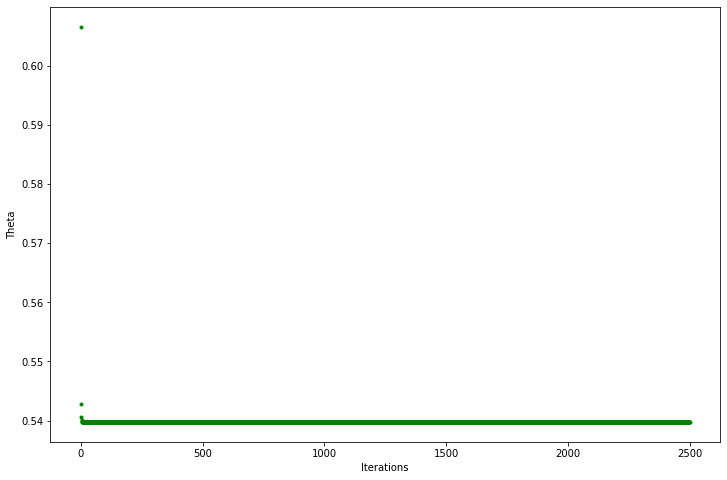

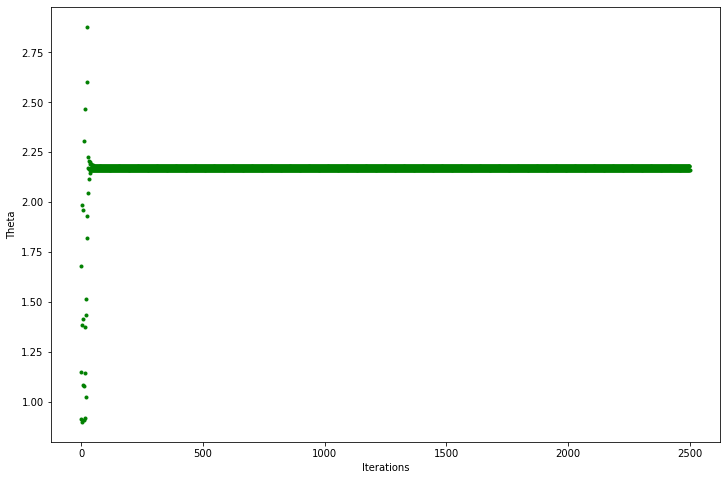

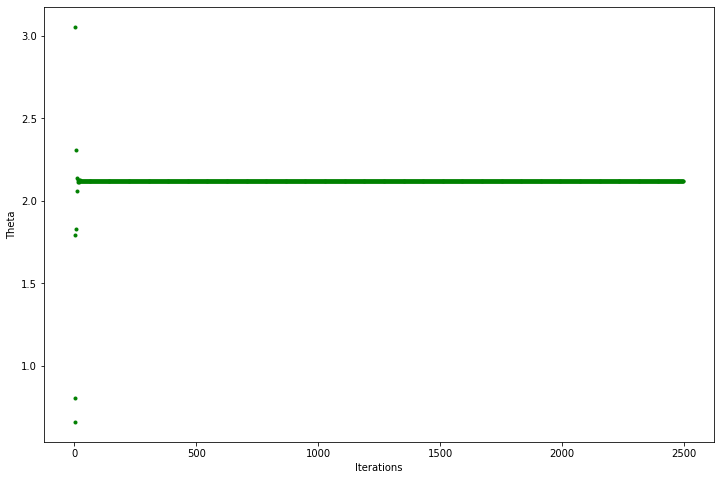

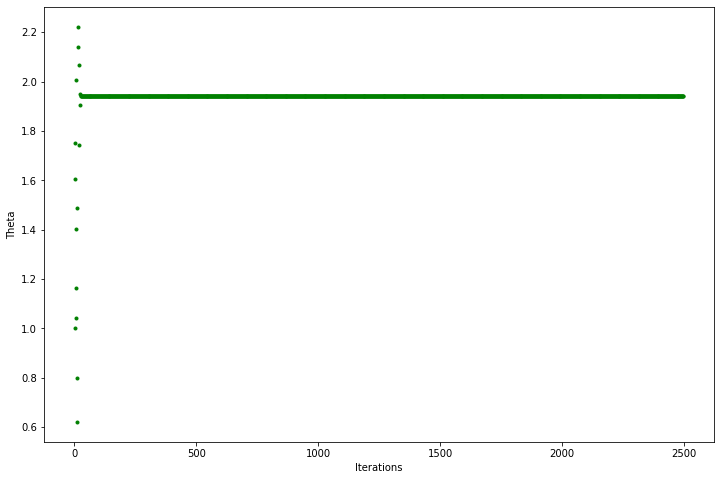

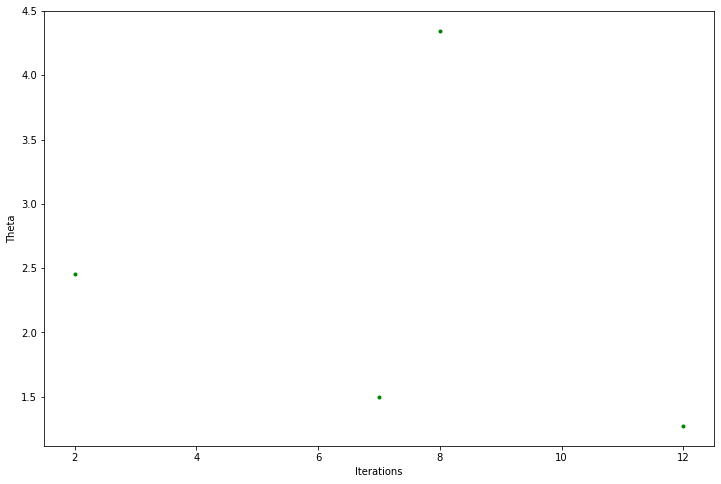

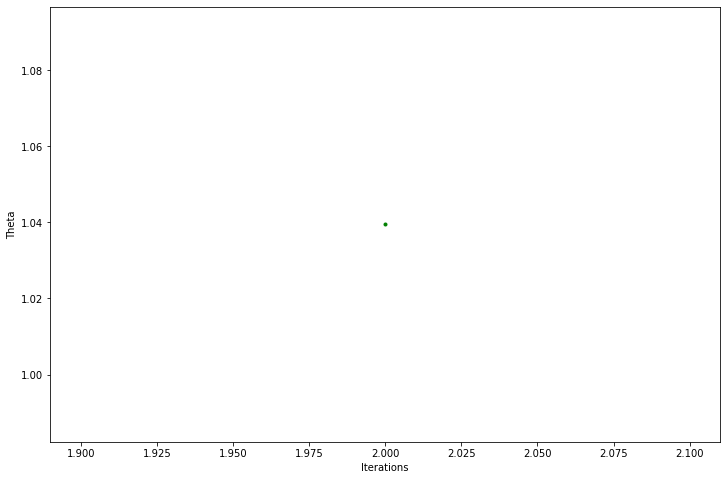

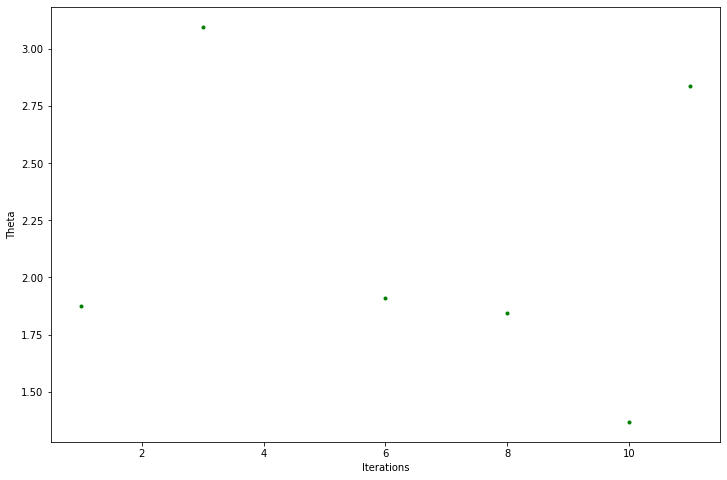

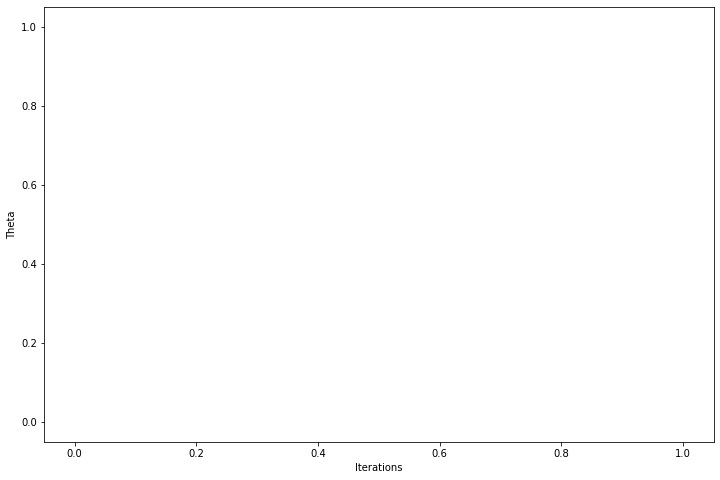

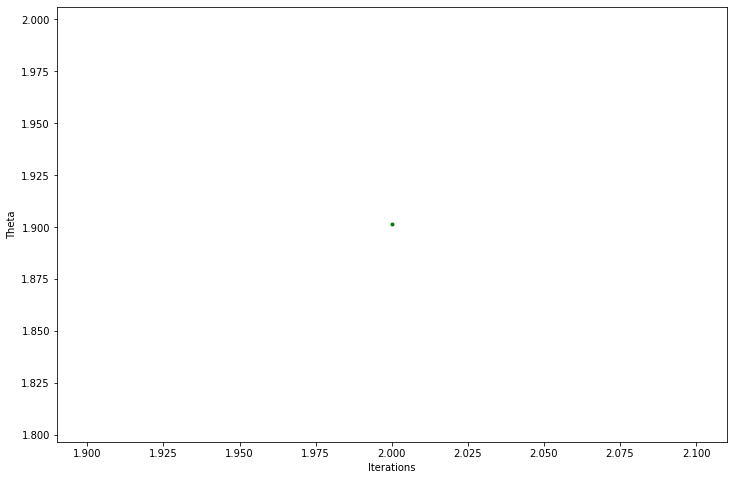

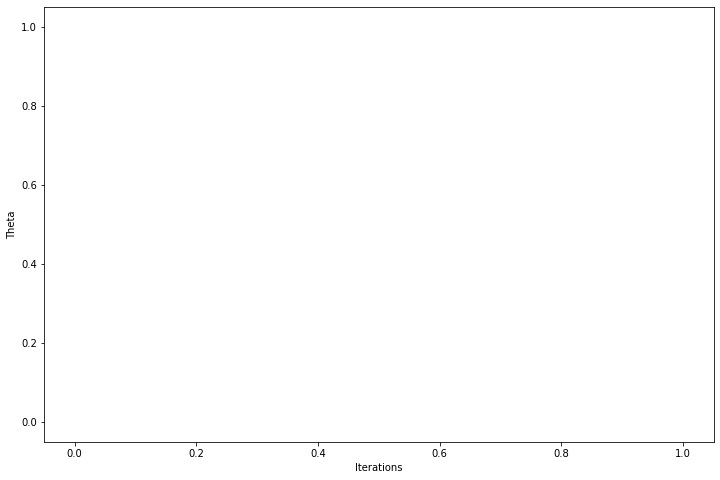

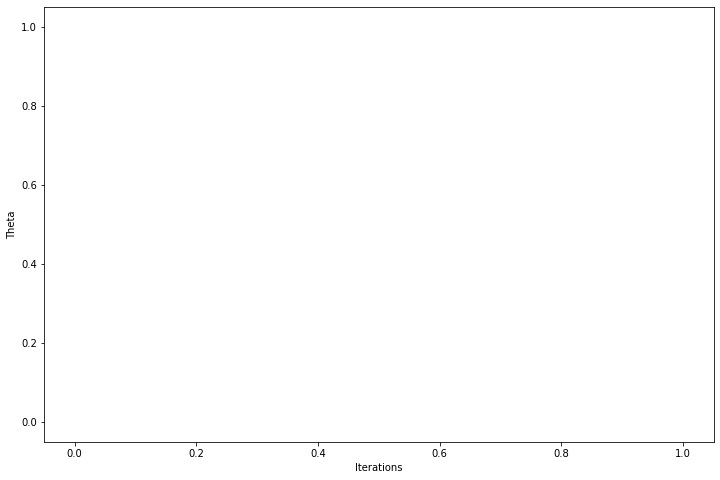

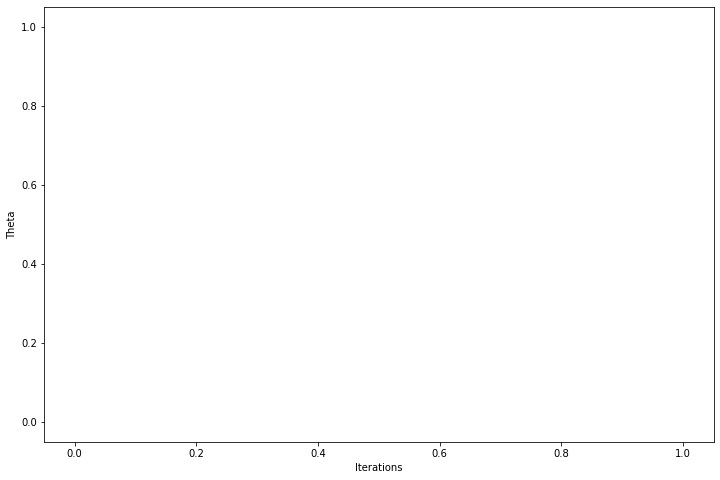

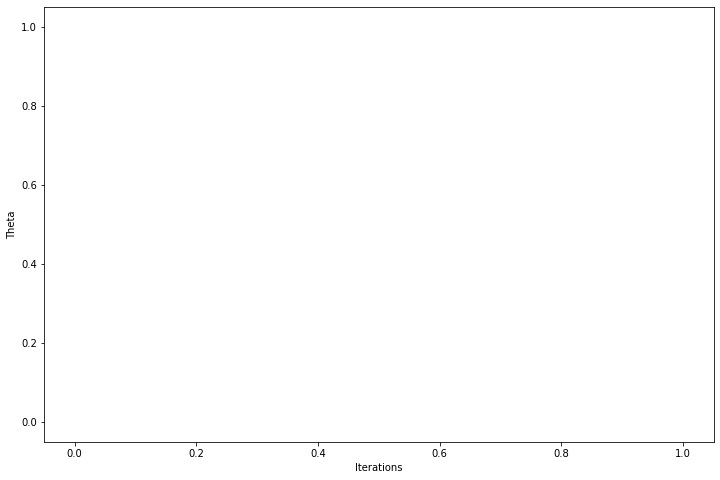

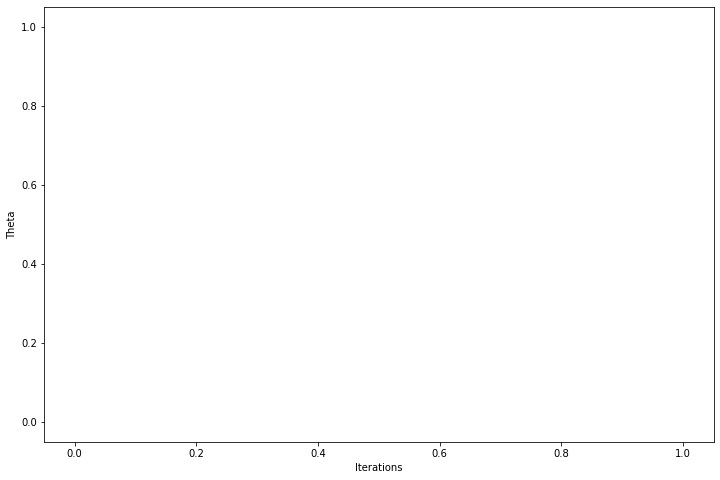

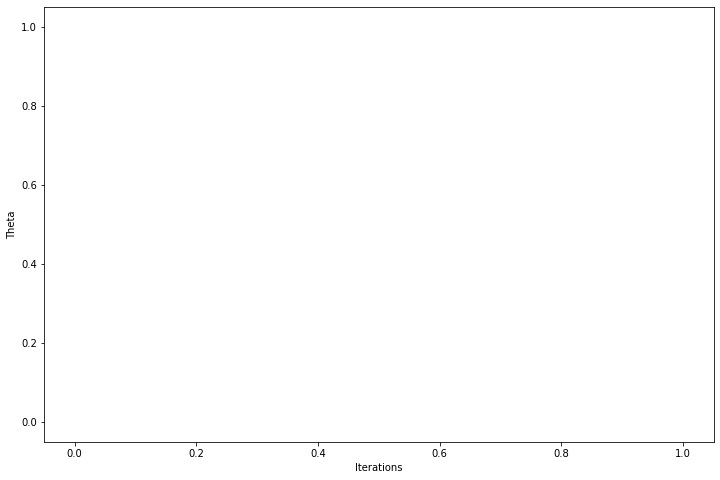

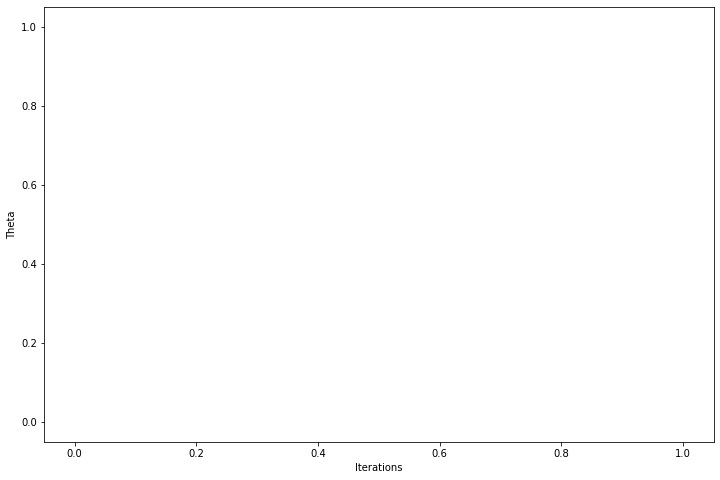

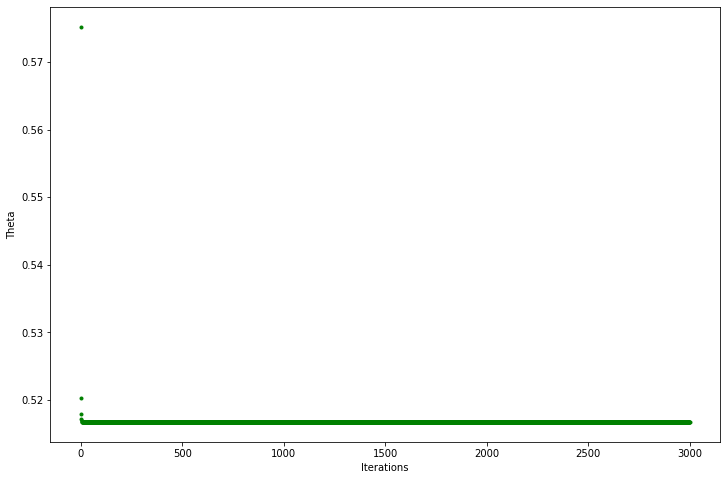

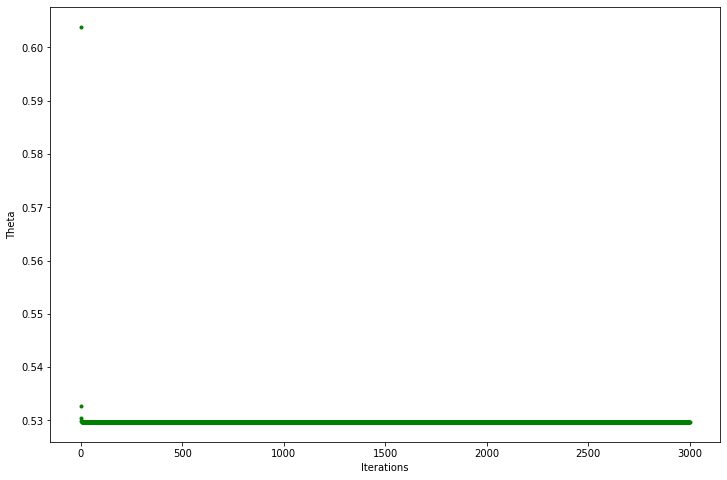

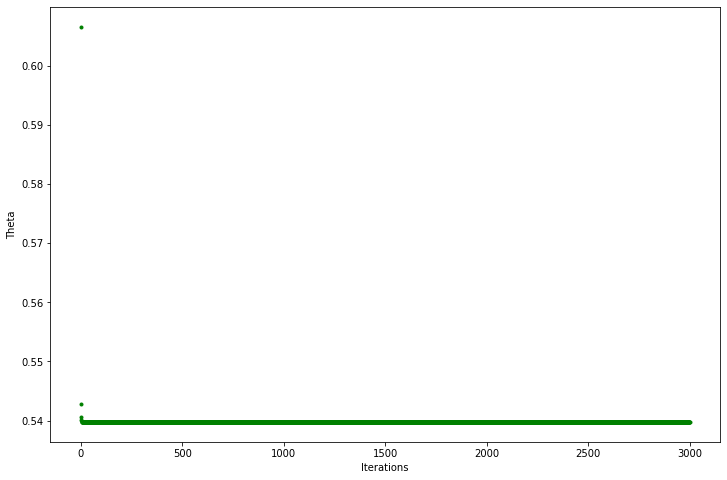

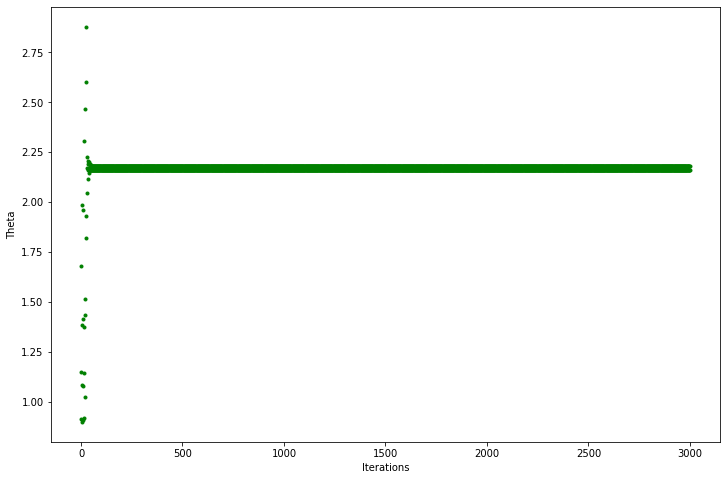

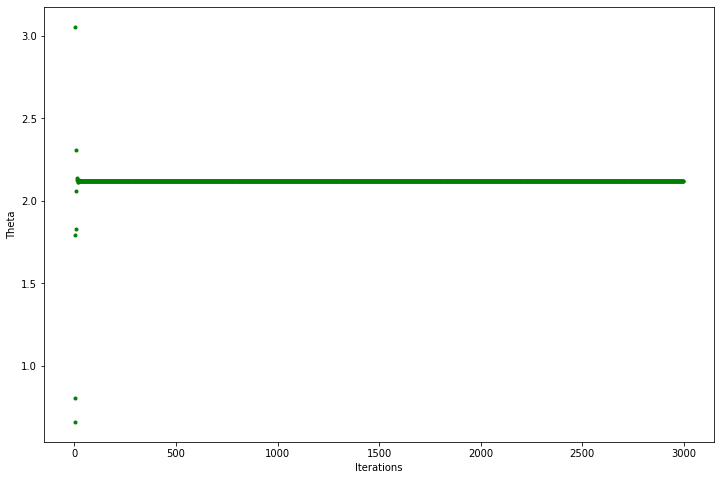

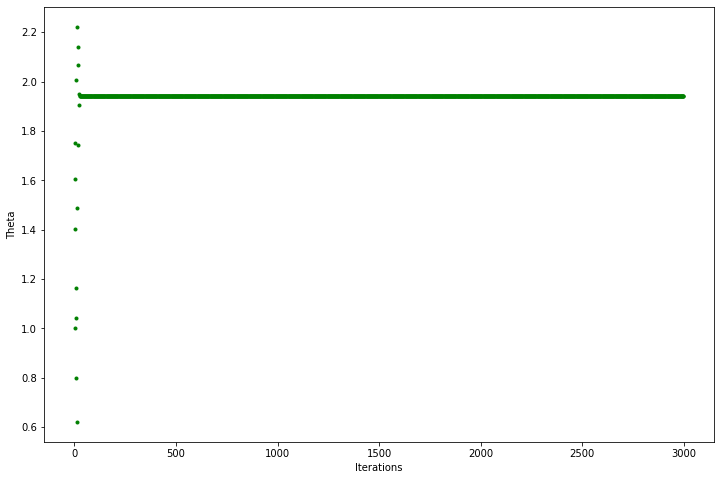

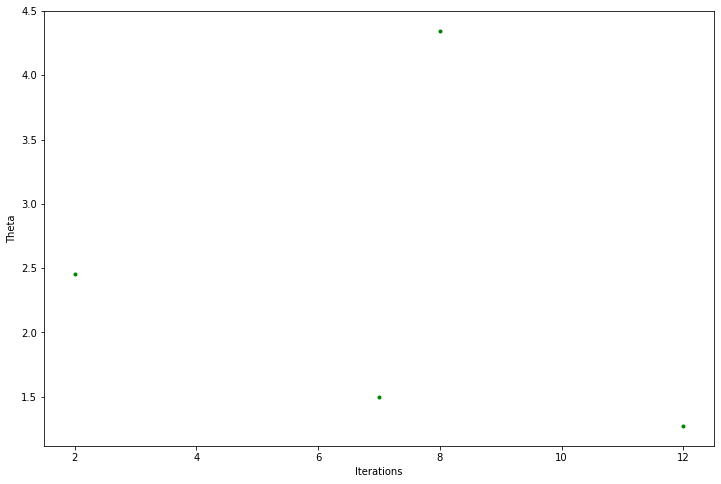

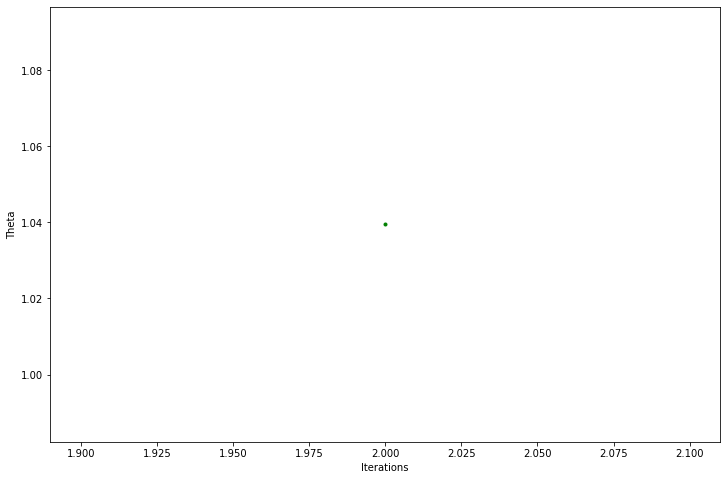

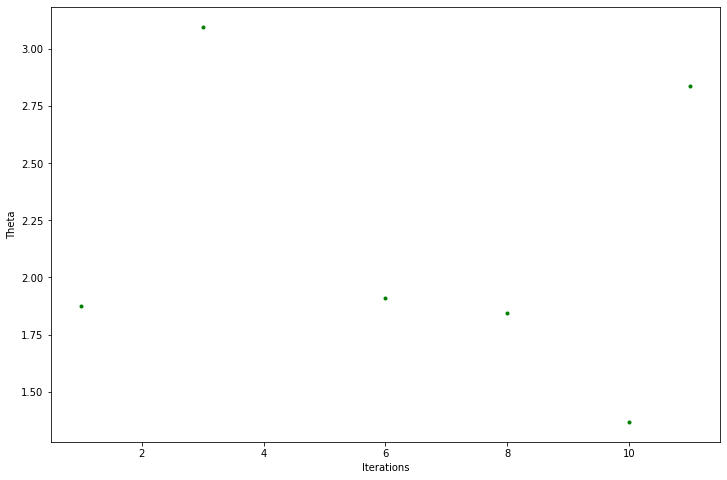

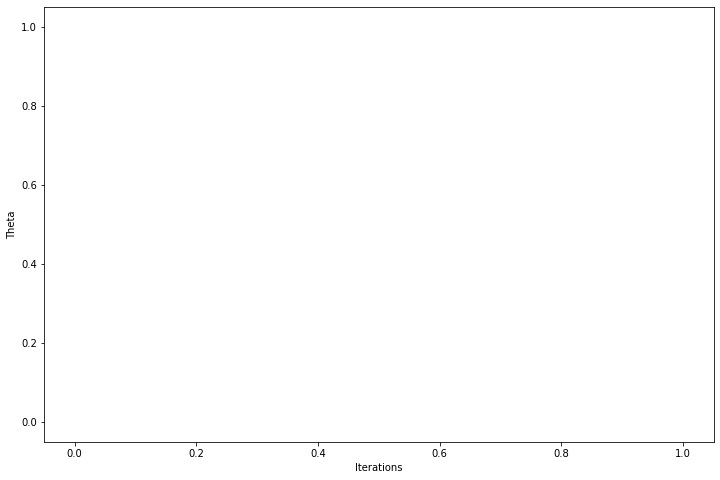

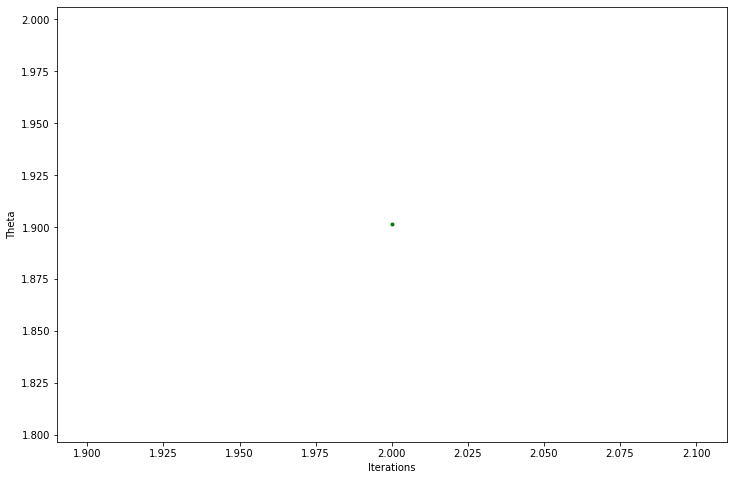

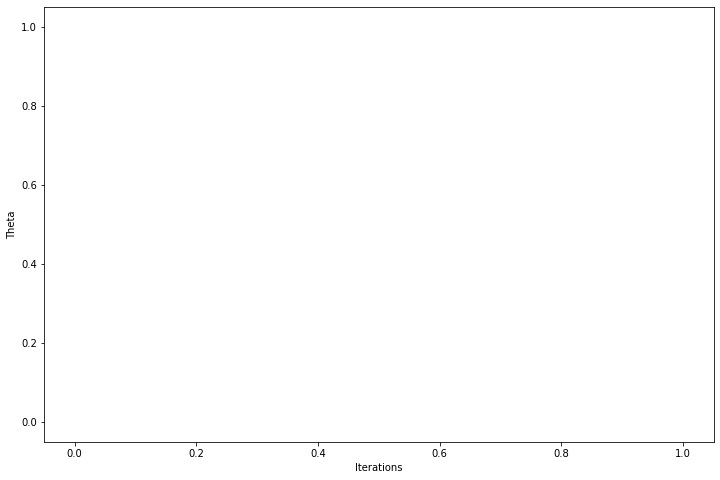

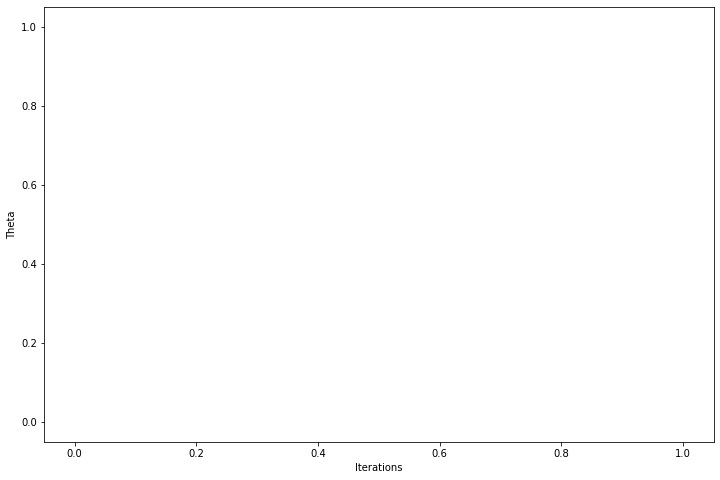

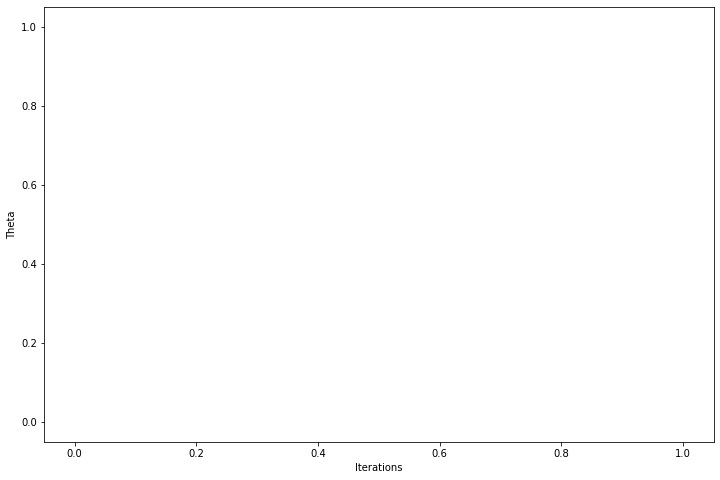

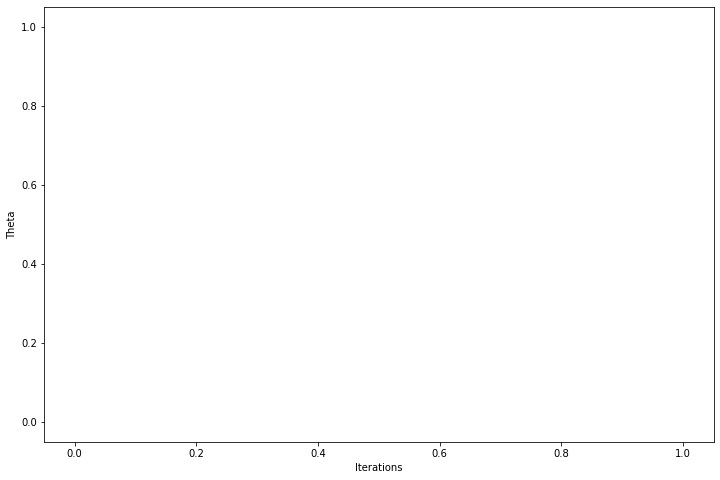

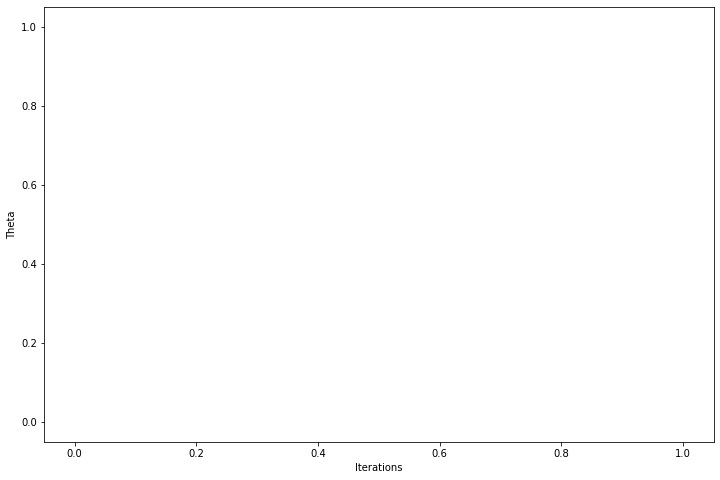

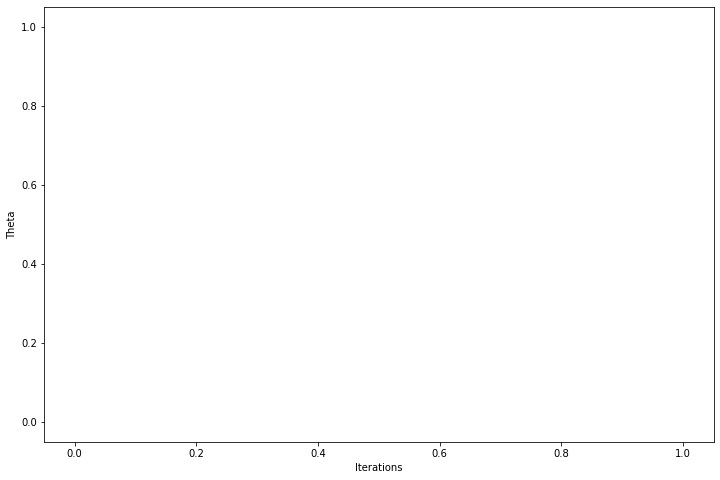

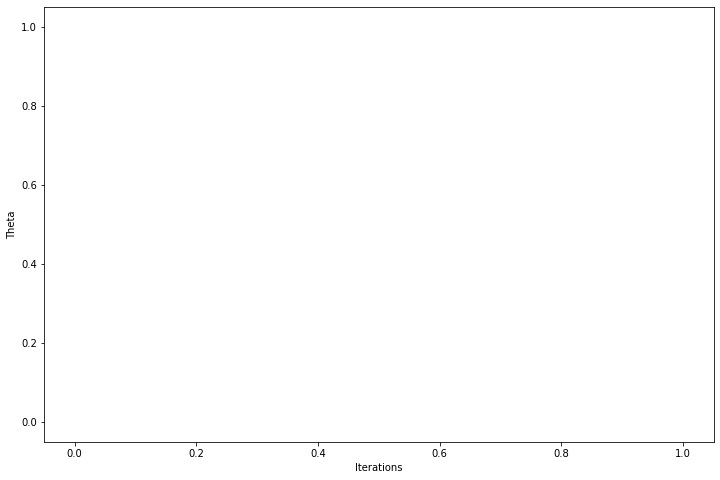

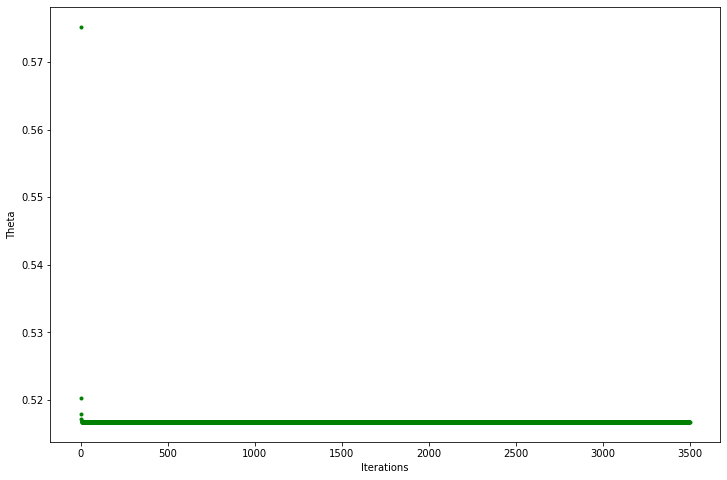

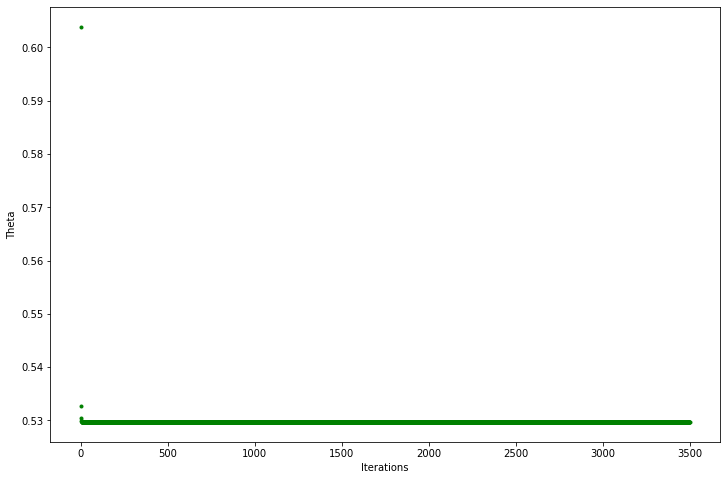

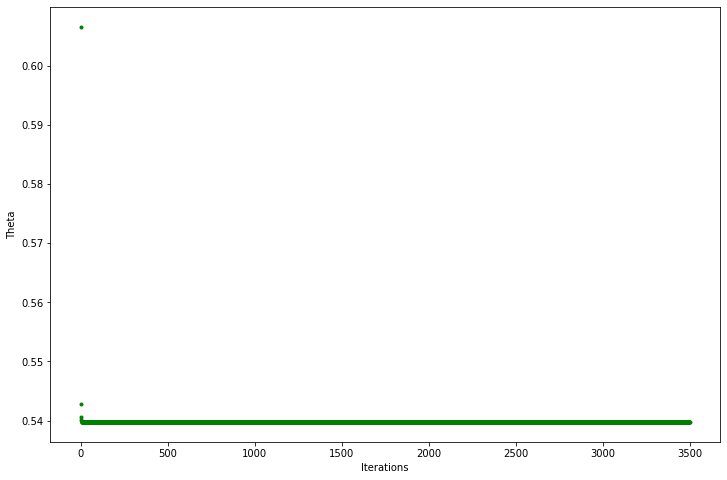

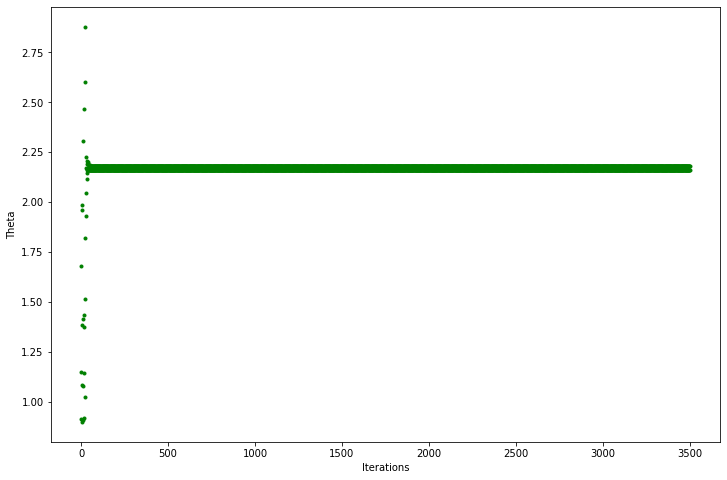

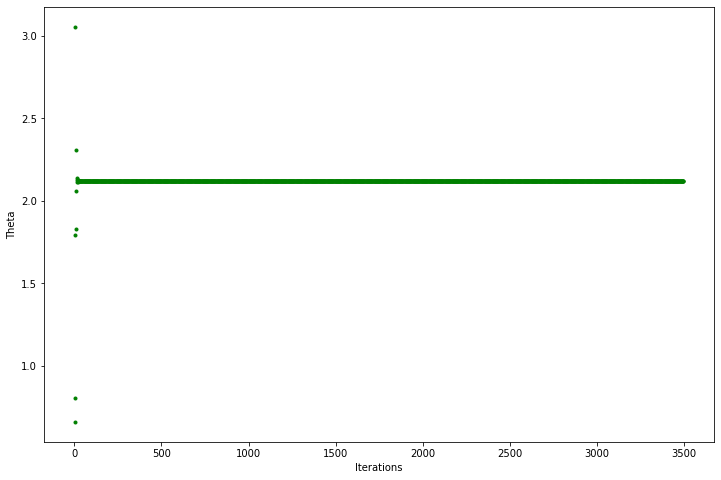

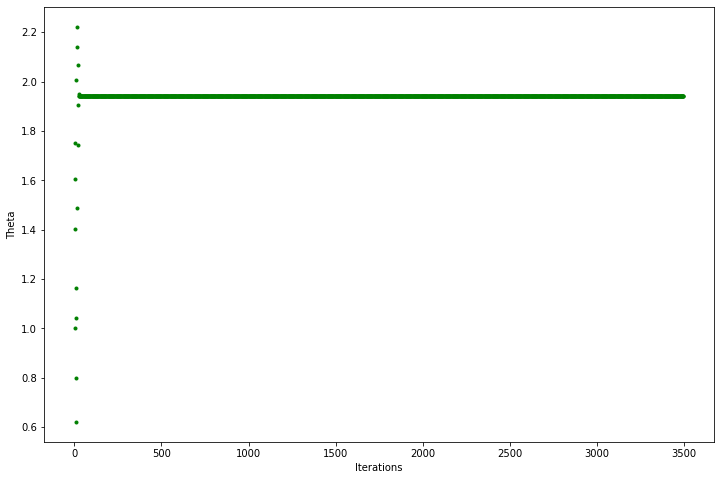

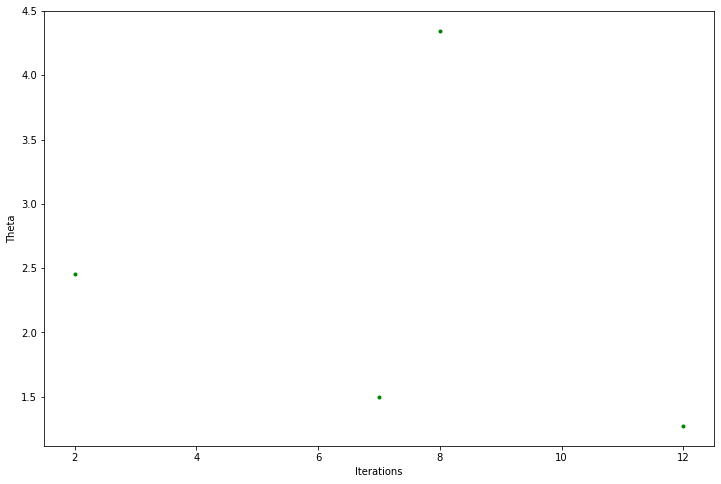

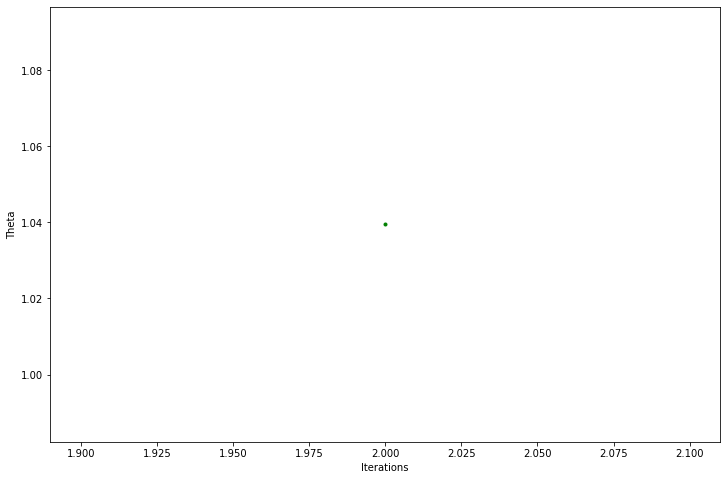

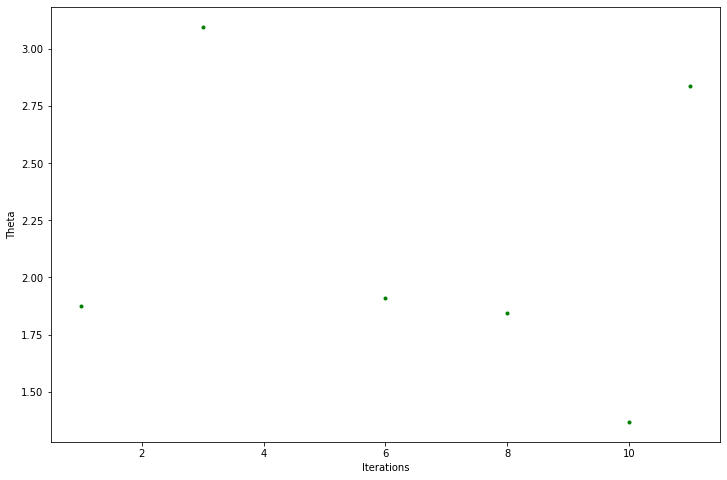

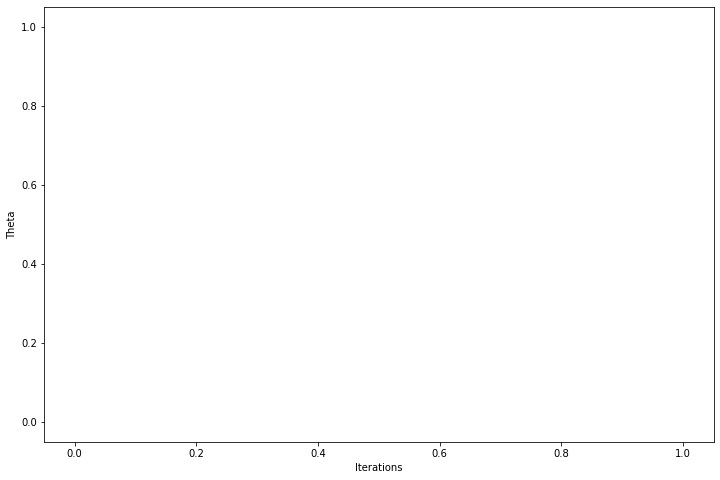

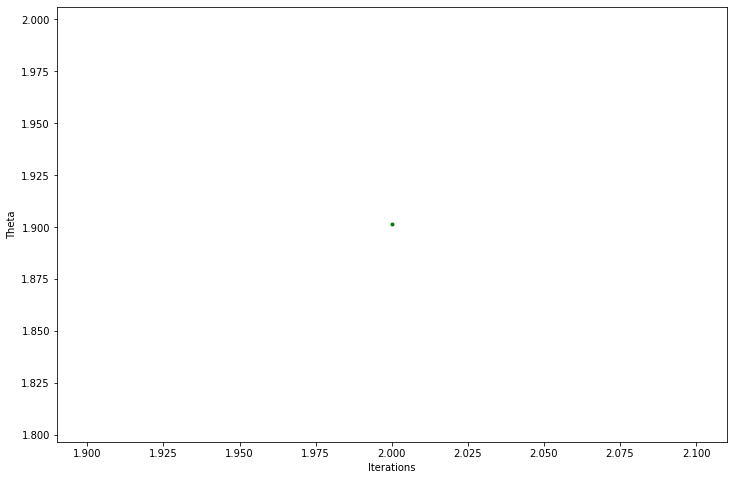

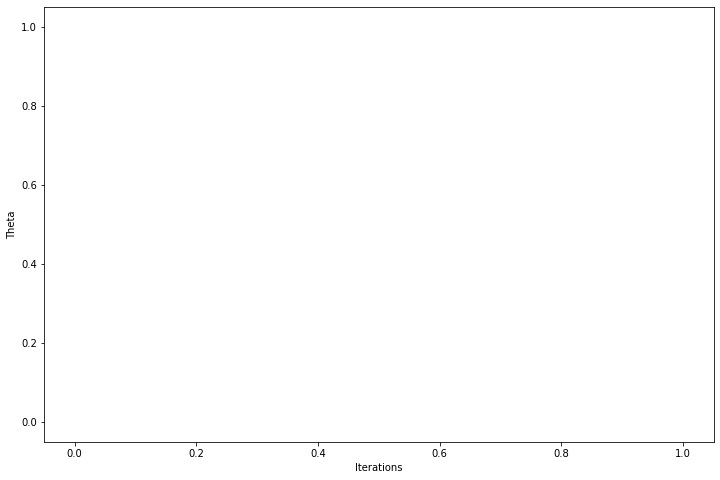

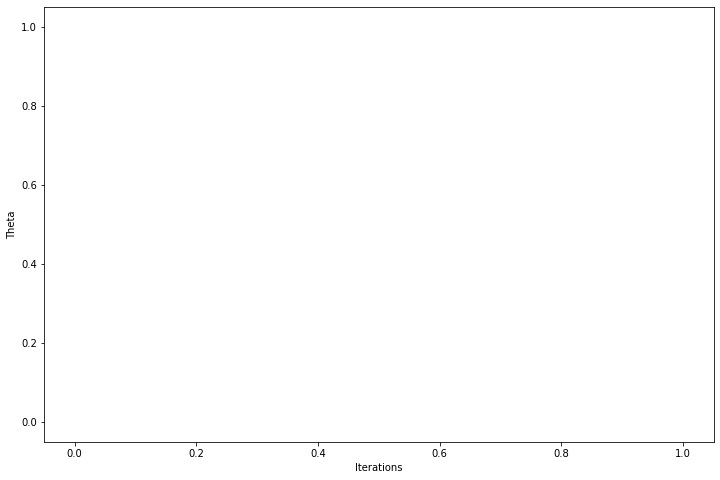

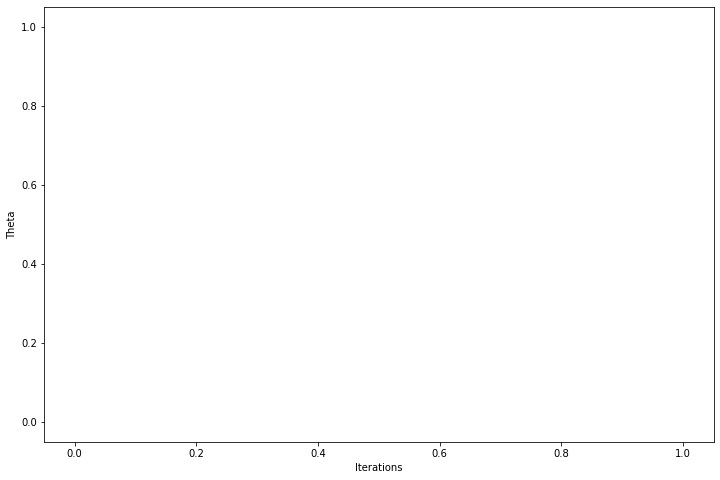

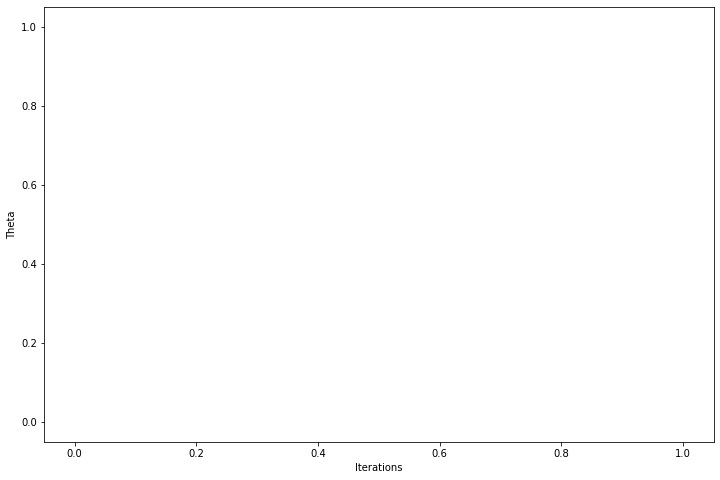

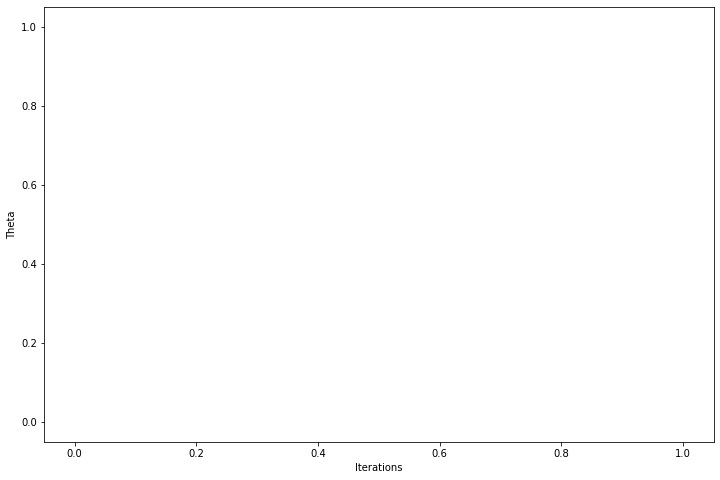

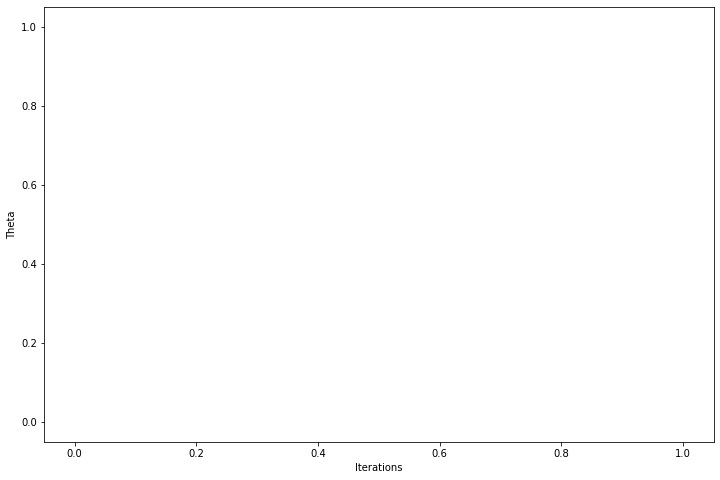

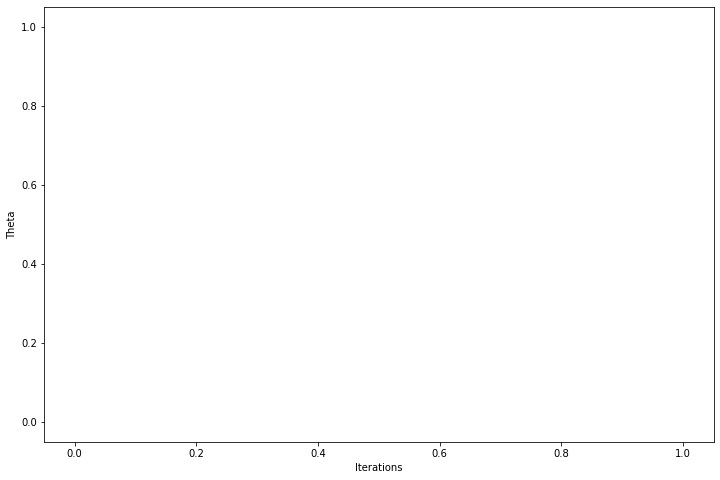

In [16]:
a,b,c = create_k_folds('diabetes.csv', 3, True)
d,e,f = create_k_folds('heart.csv', 3, False)
sets = np.array([a,b,c])
sets2 = np.array([d,e,f])

def plot_costo_historio(iterations,costos,nombre_figura):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_ylabel('Theta')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(iterations), costos, 'g.')
    fig.savefig(nombre_figura)
    #plt.show()



def get_data(sets, it, alpha):
    permut = np.array([[0, 1, 2], [0 , 2 , 1], [1, 2, 0]])
    vec_acc = ([])
    for elemente in permut:
        #print(elemente)
        train_set = np.concatenate((sets[elemente[0]], sets[elemente[1]]))
        #print(train_set)
        X_train = train_set[:,:-1]
        X_train = normalizar_datos(X_train)
        y_train = train_set[:,-1]
        
        test_set = sets[elemente[2]]
        X_test = test_set[:,:-1]
        X_test = normalizar_datos(X_test)
        #print(X_test)
        y_test = test_set[:,-1]
        theta = np.zeros([X_train.shape[1]])
        t, c = gradiente_descendiente(X_train, y_train, theta, it, alpha)
        acc = accuracy(X_test, y_test, t)
        vec_acc = np.append(vec_acc,acc)
        nombre_fig = "fig" + str(it) + str(alpha) + ".png"
        ploteo = plot_costo_historio(it,c,nombre_fig)
        #print("accuracysdkj: ", acc)
    return (vec_acc.mean())

tasas = ([0.01, 0.05, 0.1, 0.2, 0.3, 0.4])
iteracciones = ([500, 1000, 1500,2000,2500,3000,3500])         


code = ""
for i in iteracciones:
    for t in tasas:
        code = code + str(get_data(sets, i,t)) + ' - '
    code += '\n'
    
print (code)

#get_data(sets, 2000, 0.1)

# En esta parte es de la csv de Heart y tambien bota el accuracy como en un tabla. 

/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/Users/darkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


0.8250825082508251 - 0.8250825082508251 - 0.7821782178217823 - 0.8151815181518152 - 0.7491749174917492 - 0.7920792079207922 - 
0.8250825082508251 - 0.8250825082508251 - 0.7524752475247526 - 0.8118811881188118 - 0.7260726072607261 - 0.7491749174917492 - 
0.8250825082508251 - 0.8250825082508251 - 0.7854785478547855 - 0.768976897689769 - 0.7425742574257427 - 0.7557755775577558 - 
0.8250825082508251 - 0.8250825082508251 - 0.7821782178217823 - 0.7557755775577557 - 0.7524752475247526 - 0.7590759075907592 - 
0.8250825082508251 - 0.8250825082508251 - 0.7524752475247526 - 0.7854785478547854 - 0.7260726072607261 - 0.7590759075907592 - 
0.8250825082508251 - 0.8250825082508251 - 0.7854785478547855 - 0.8184818481848185 - 0.7194719471947195 - 0.6930693069306931 - 
0.8250825082508251 - 0.8250825082508251 - 0.7821782178217823 - 0.7755775577557755 - 0.7293729372937294 - 0.7557755775577558 - 



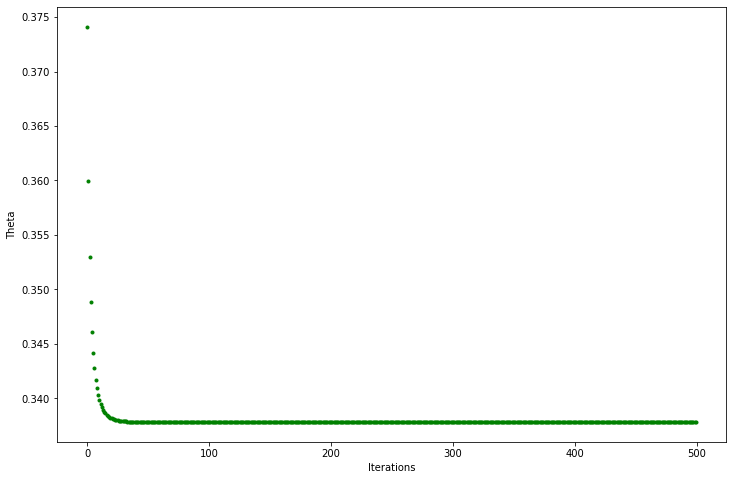

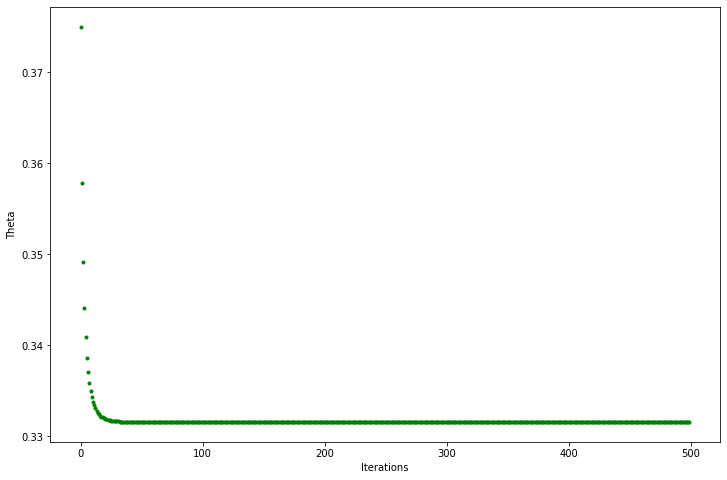

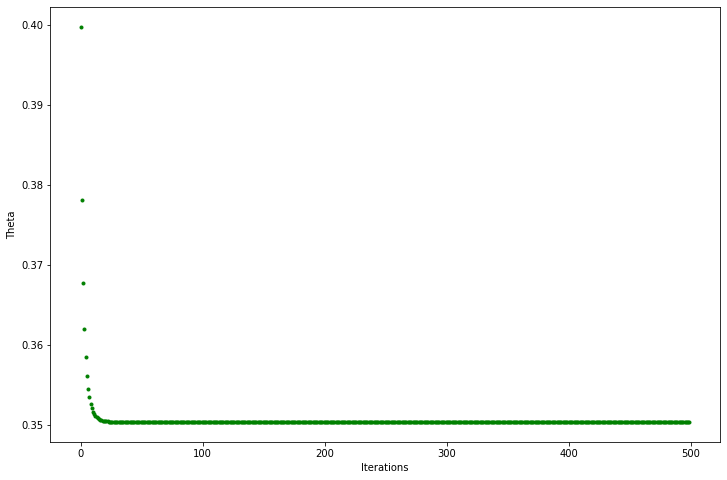

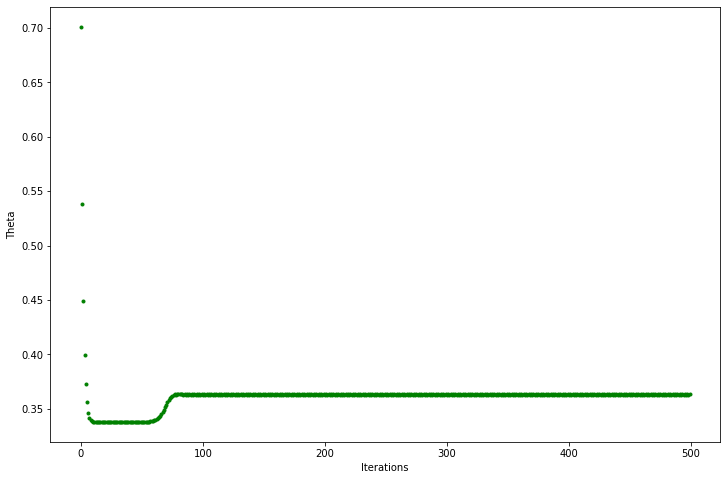

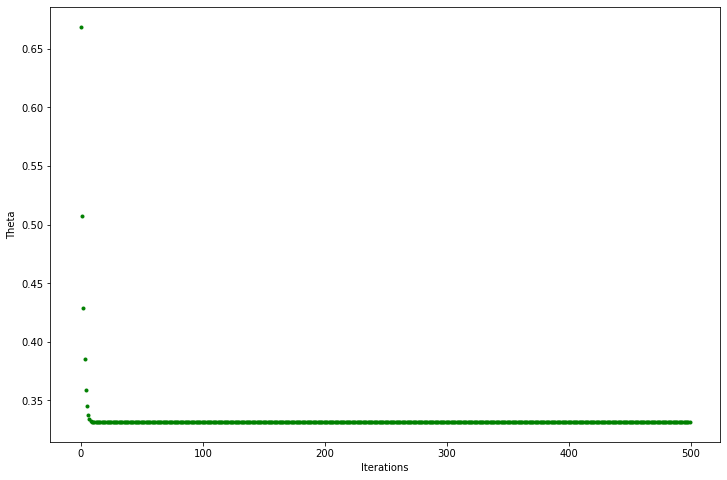

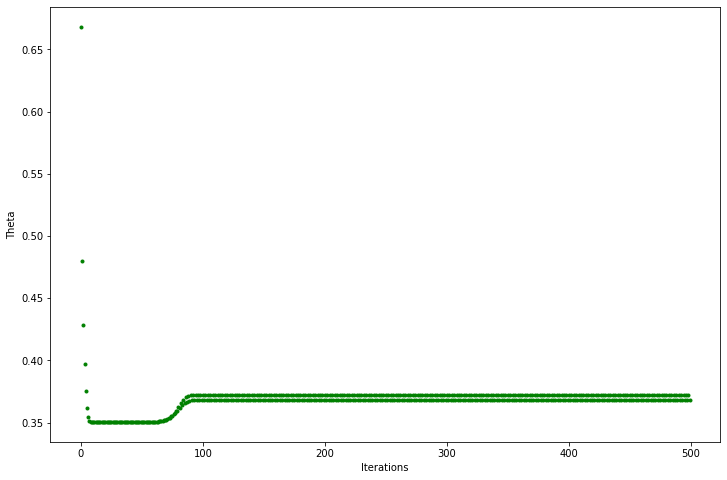

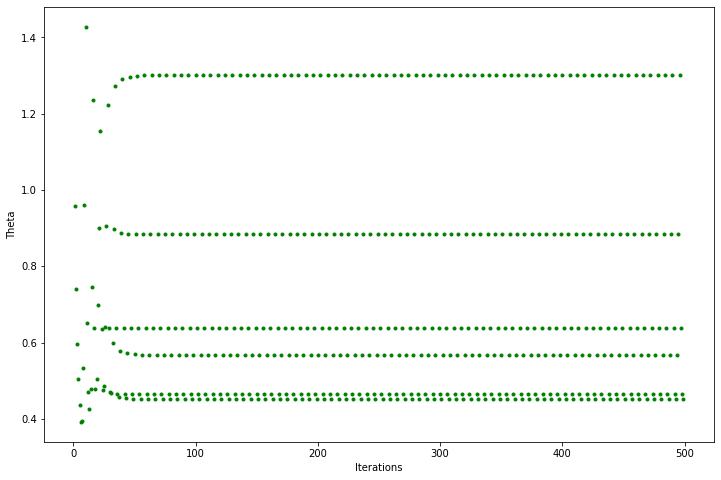

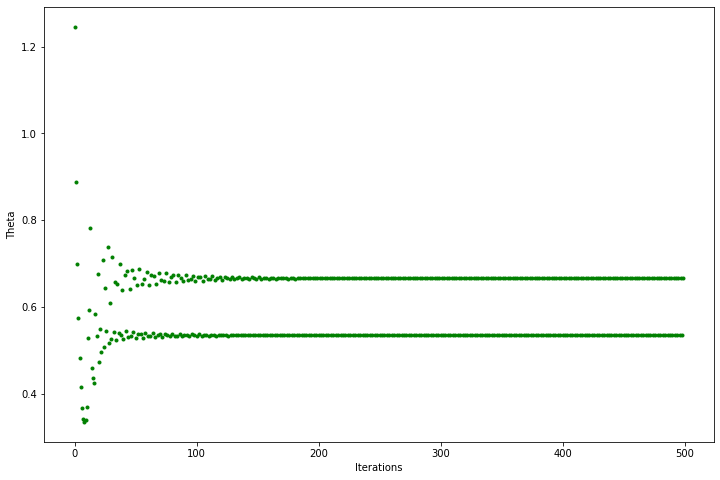

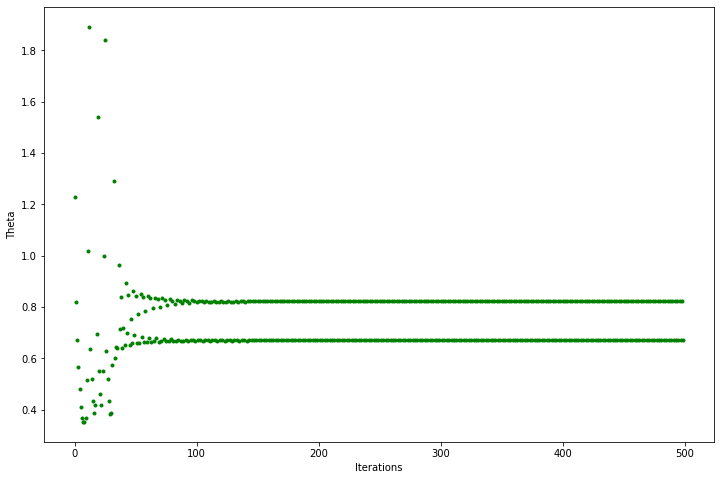

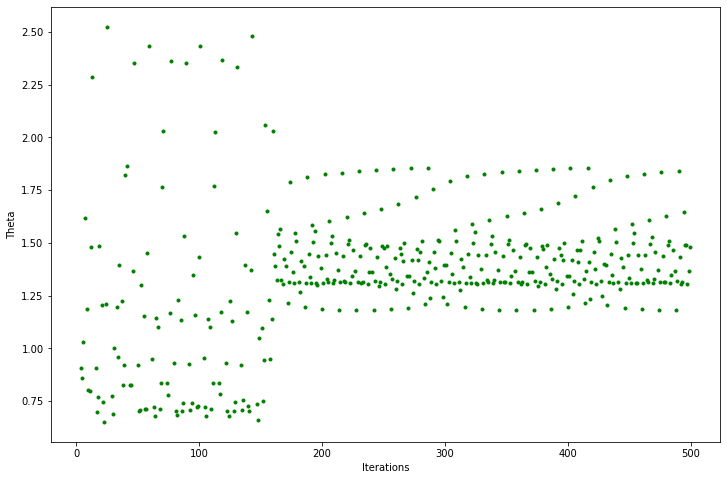

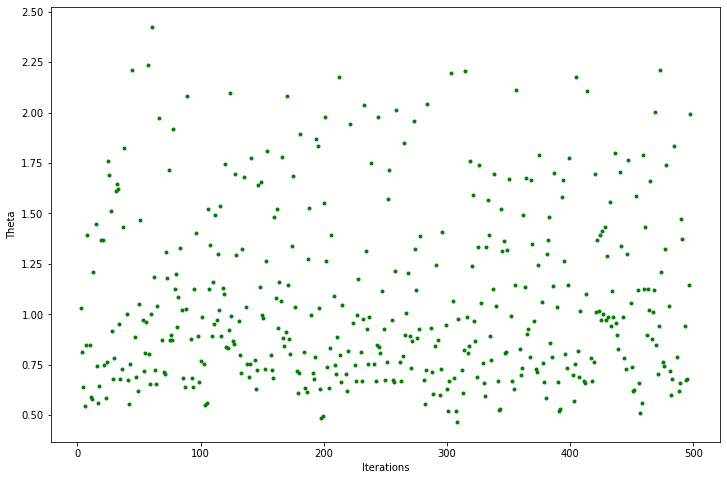

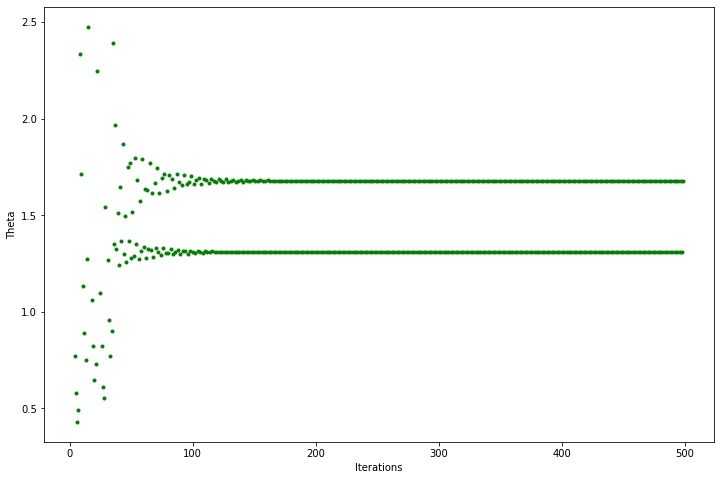

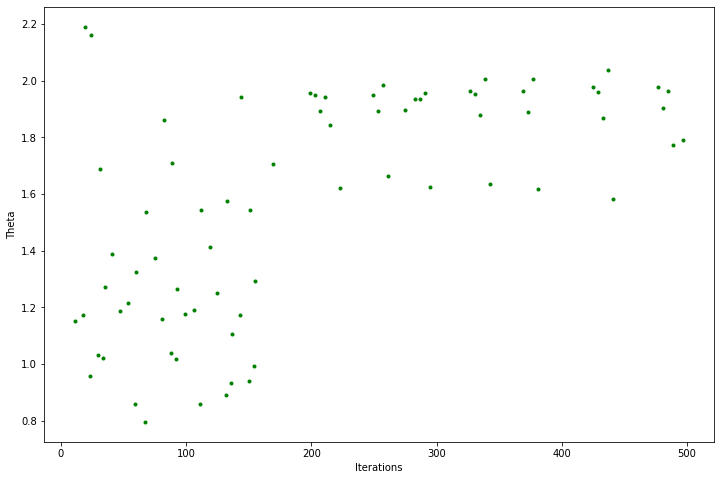

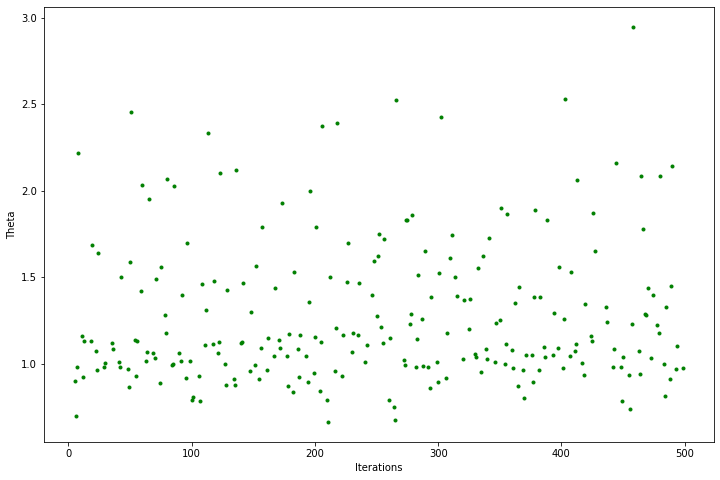

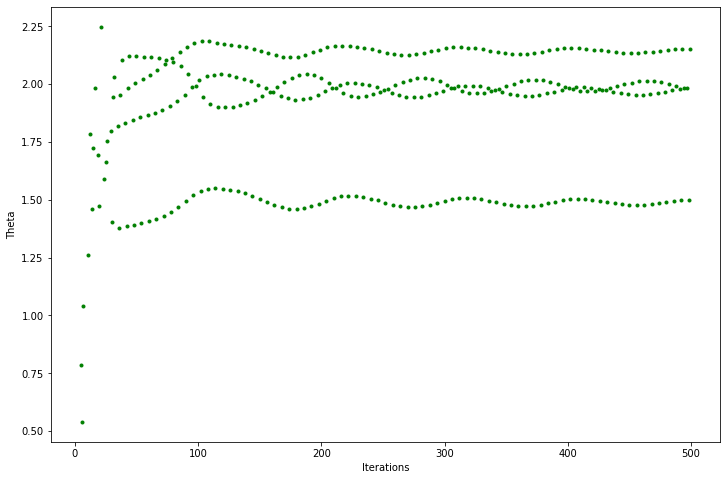

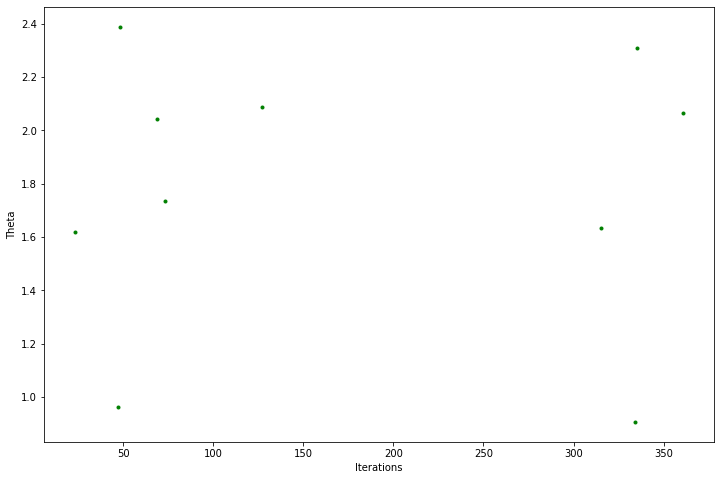

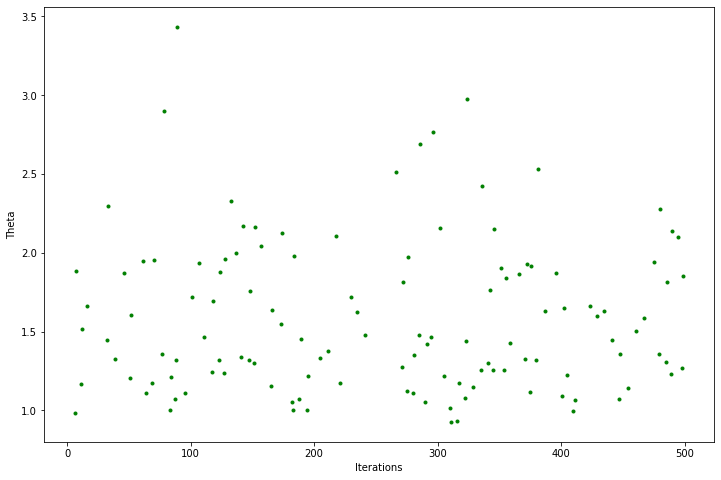

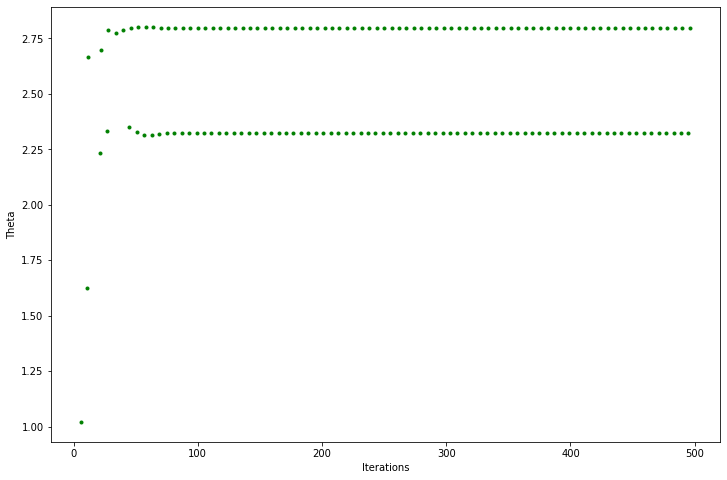

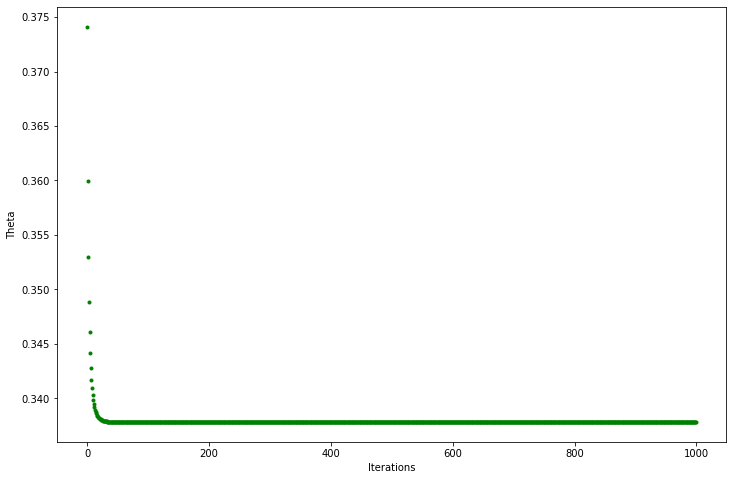

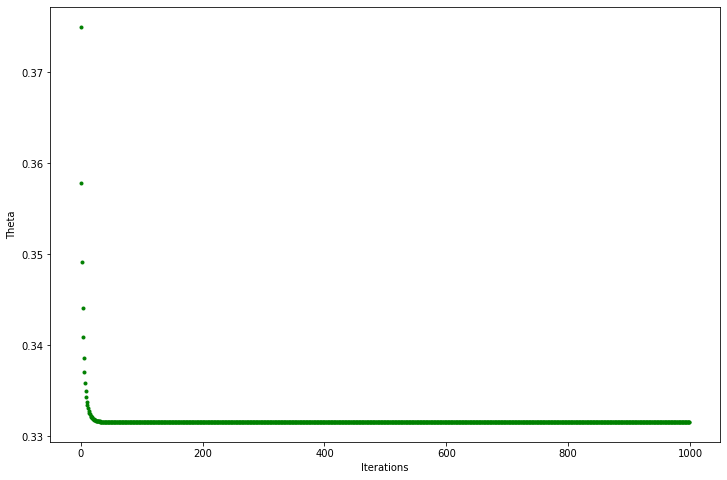

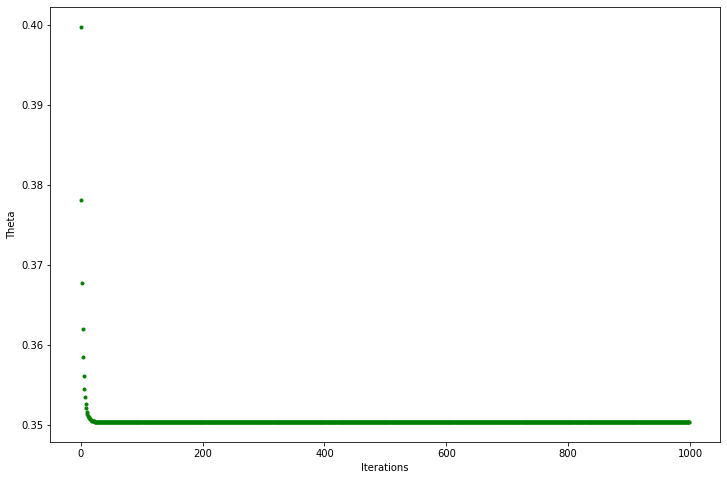

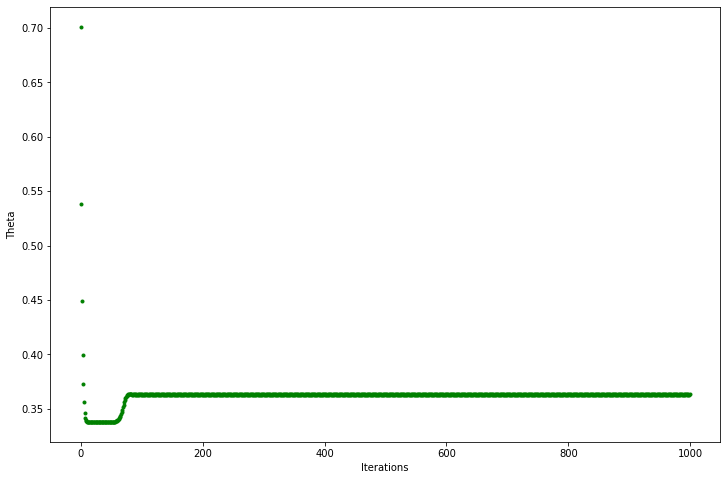

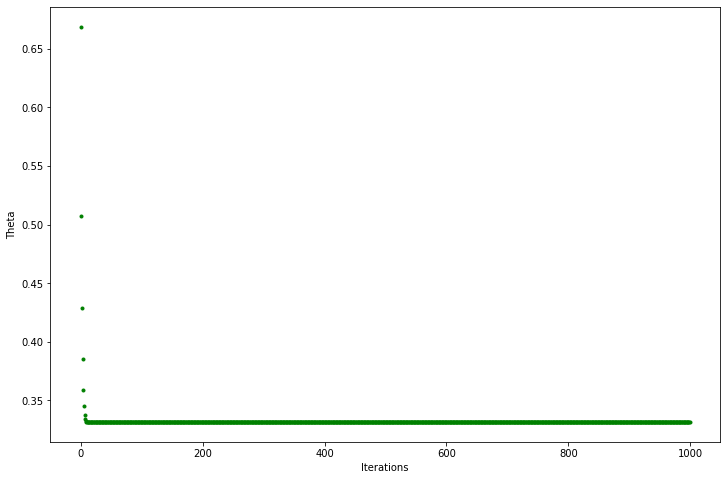

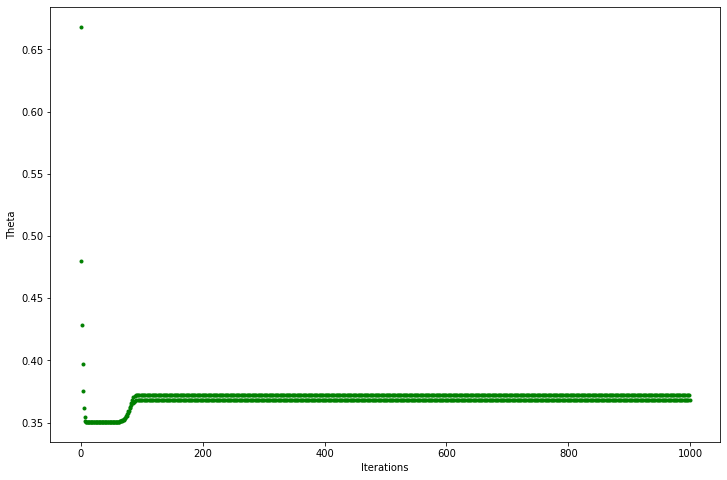

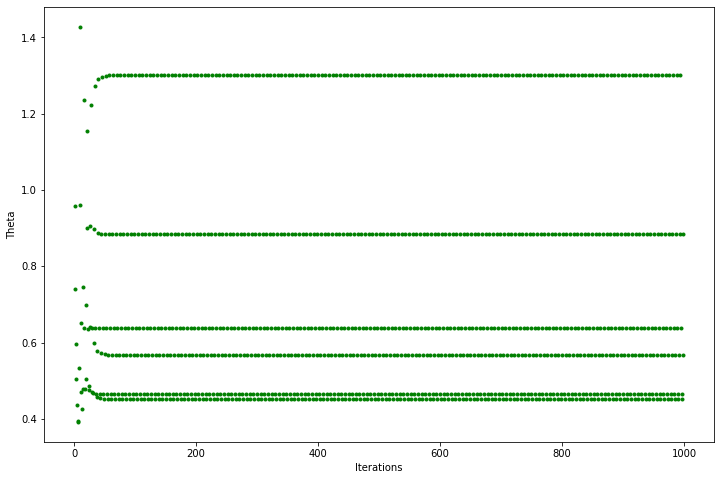

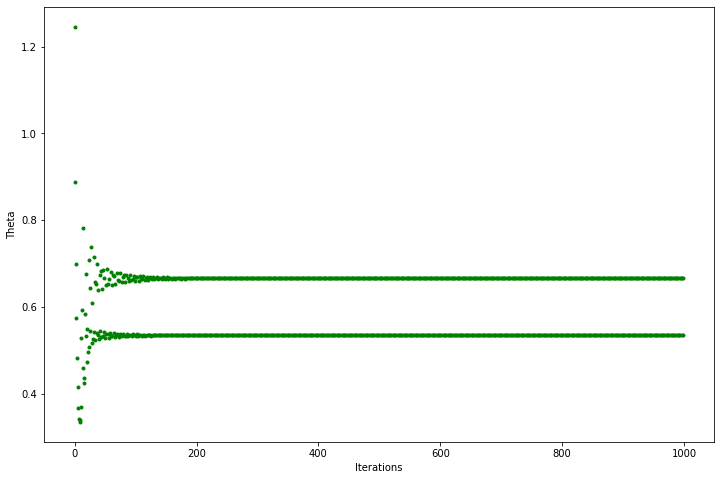

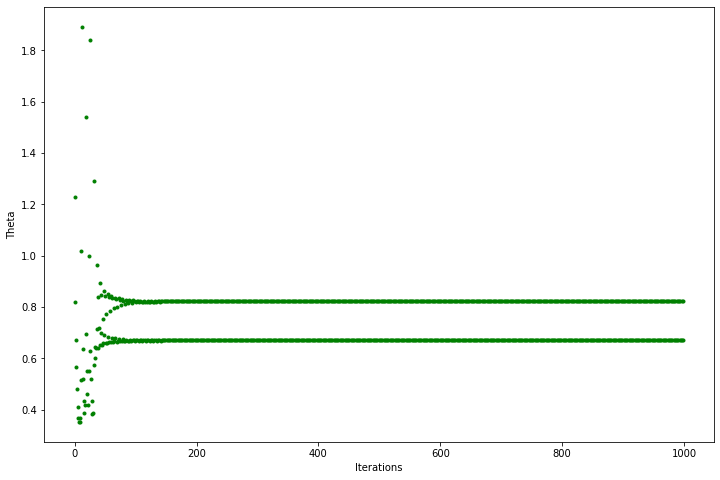

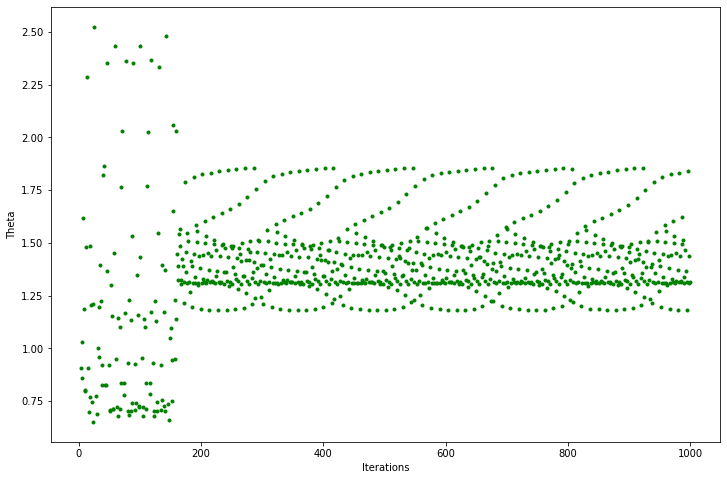

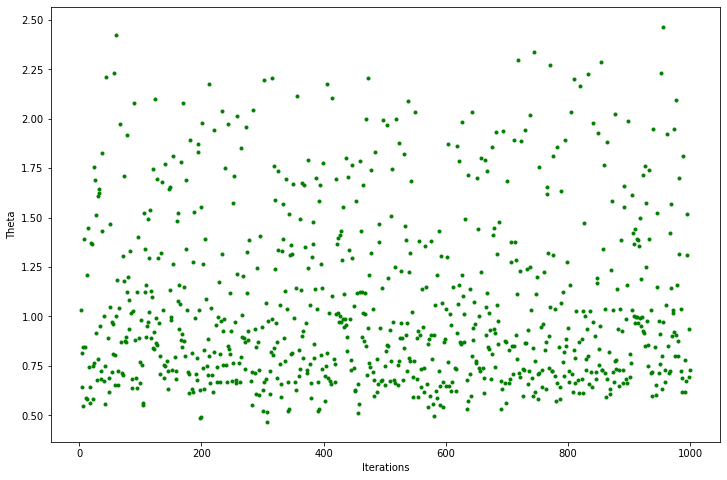

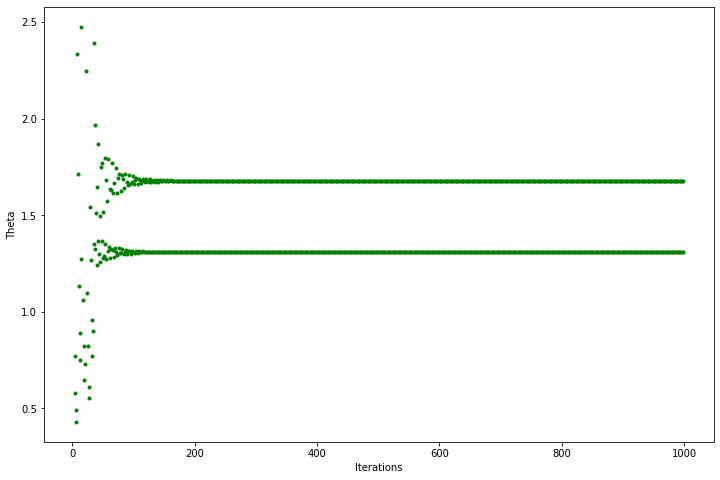

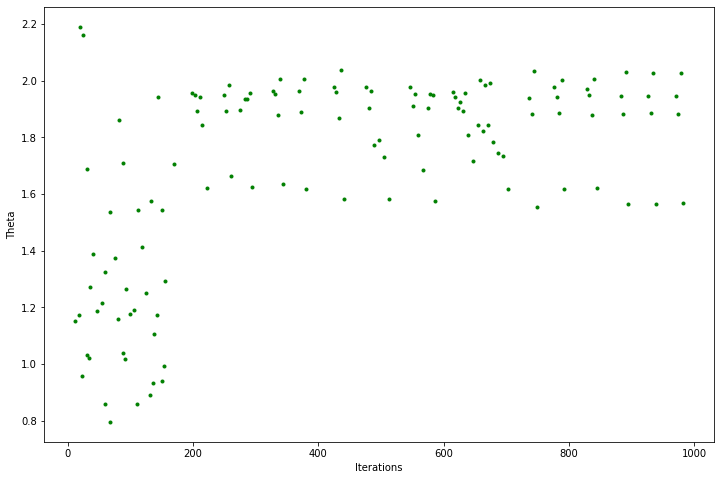

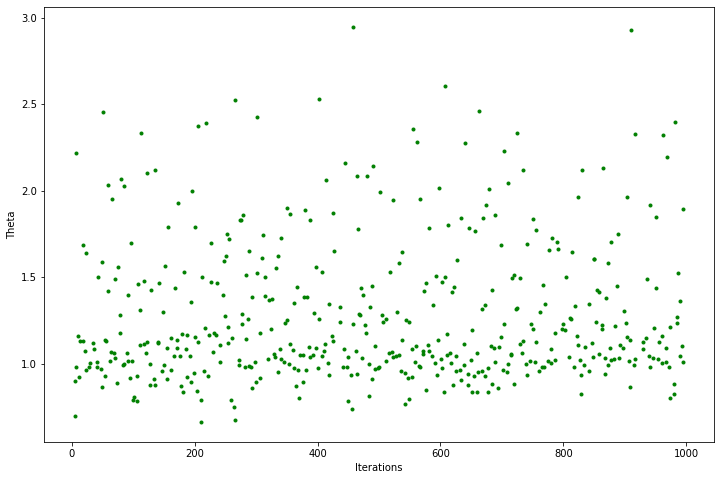

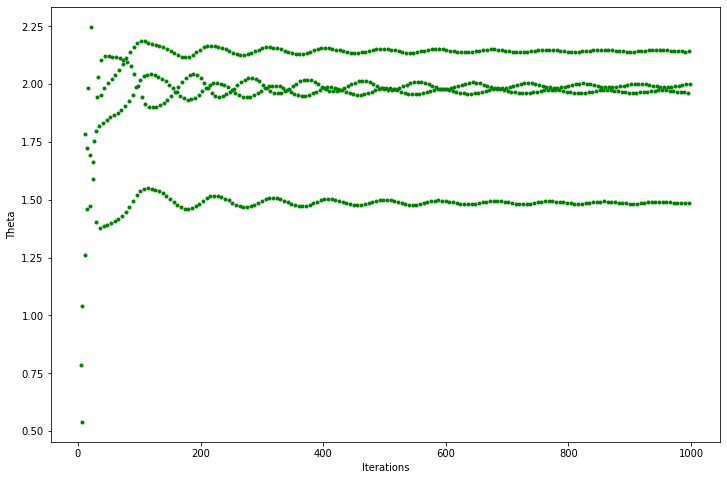

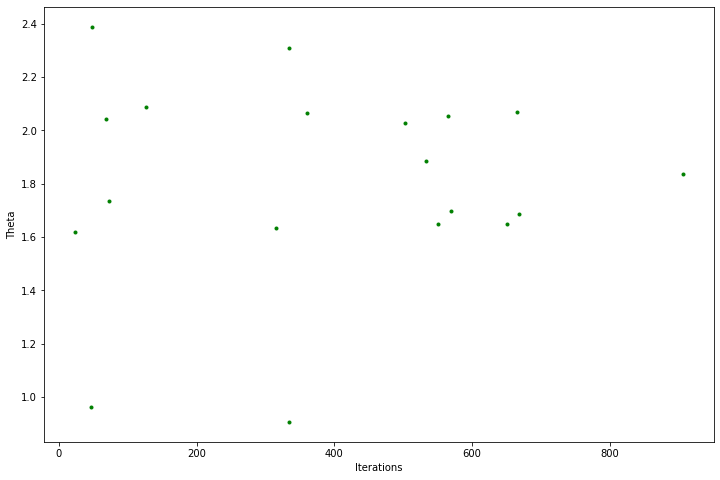

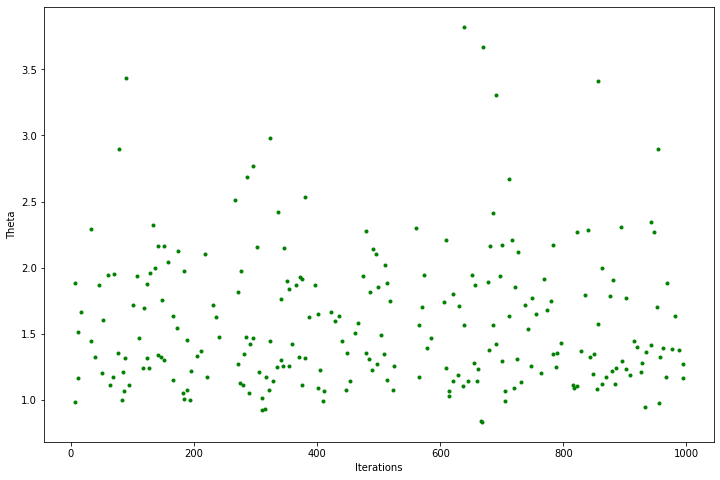

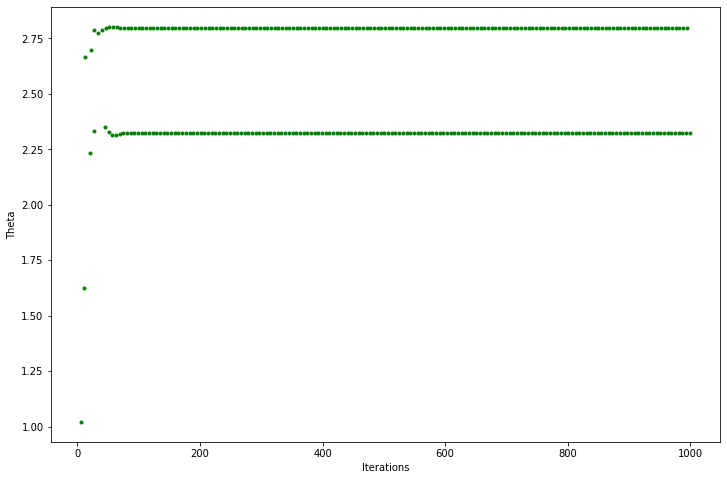

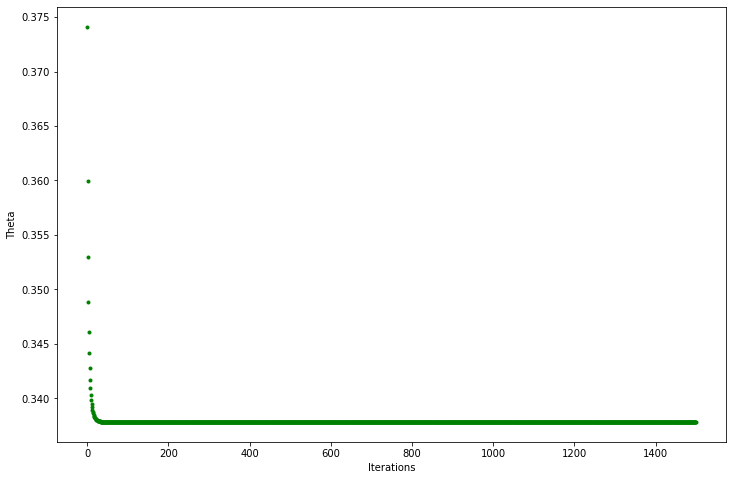

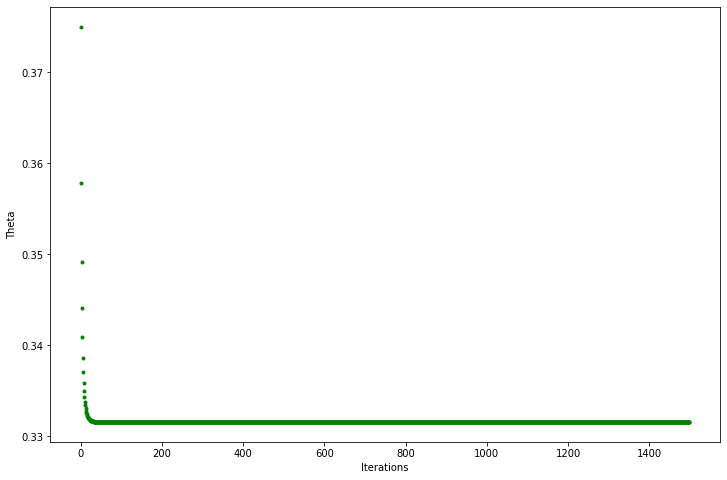

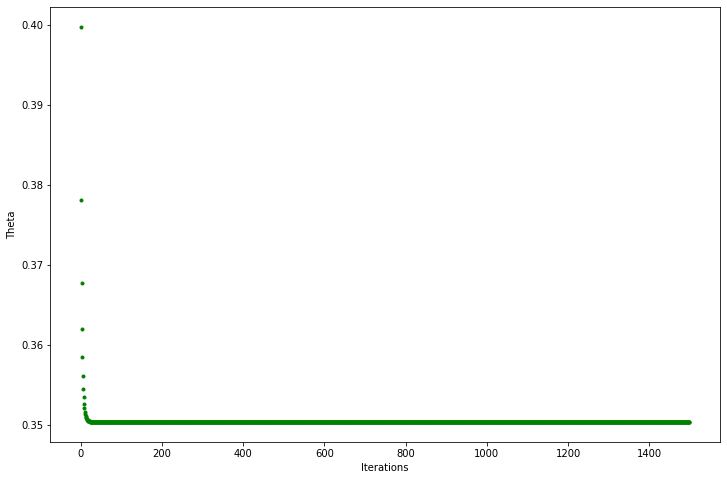

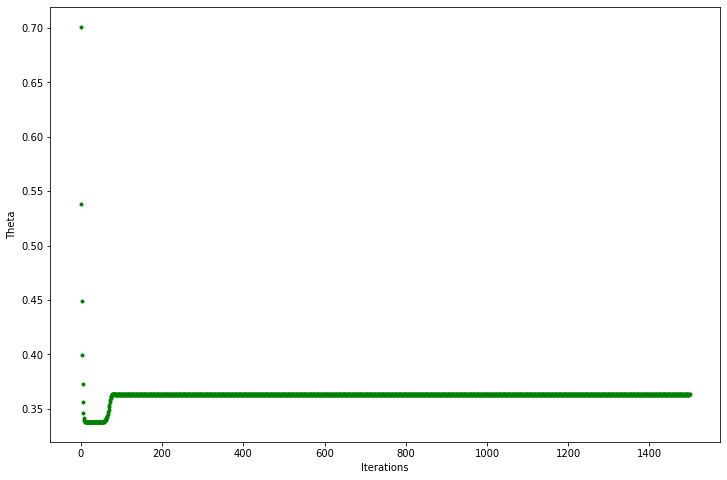

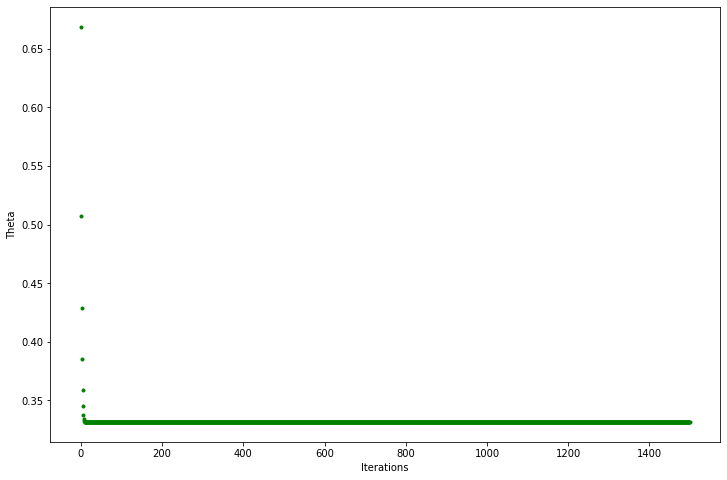

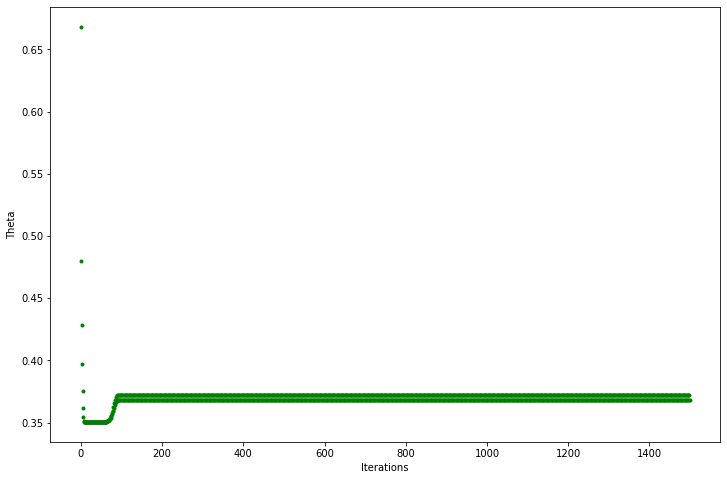

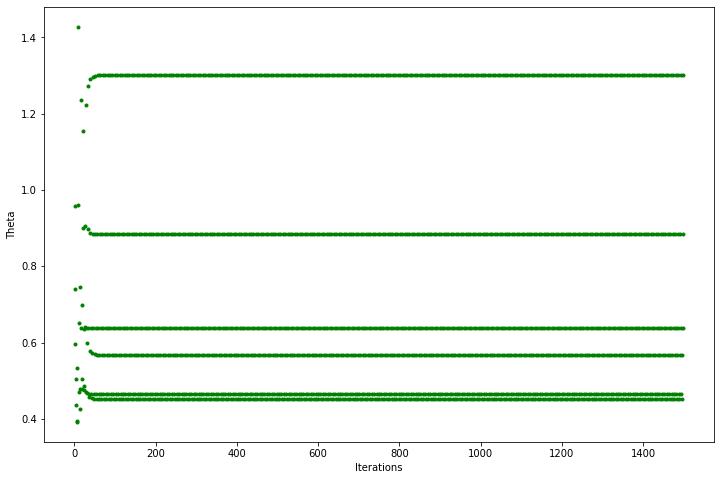

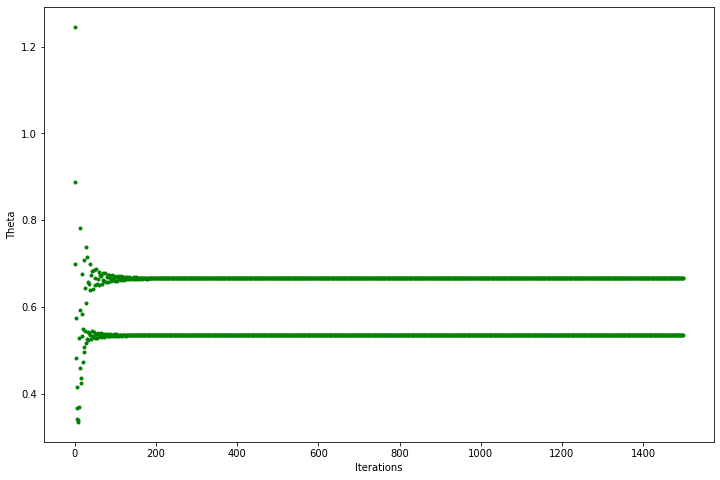

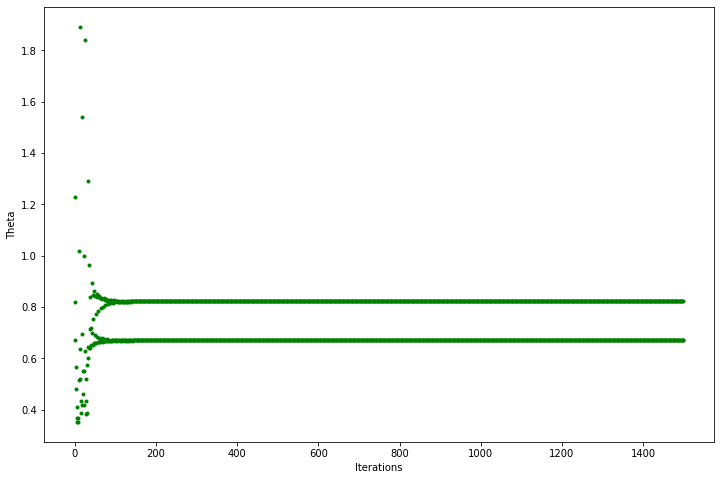

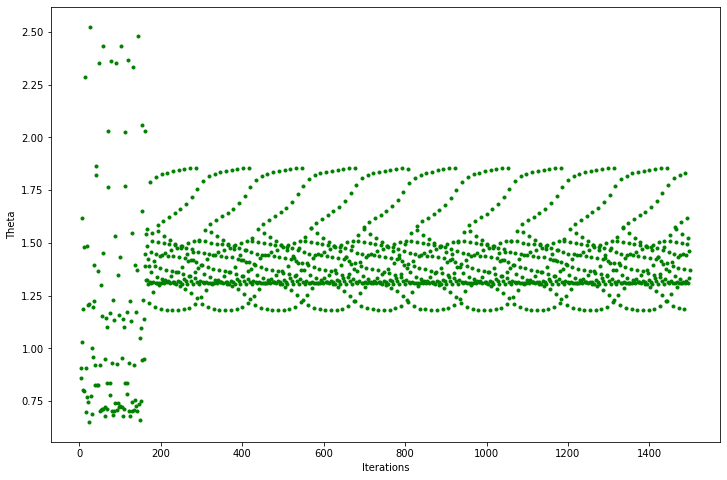

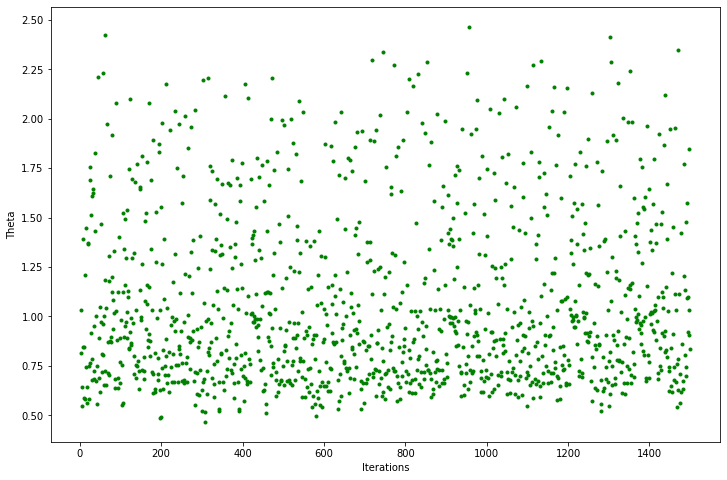

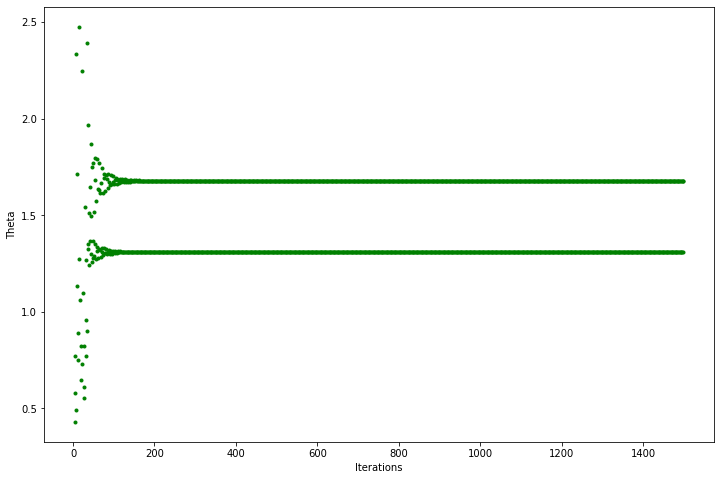

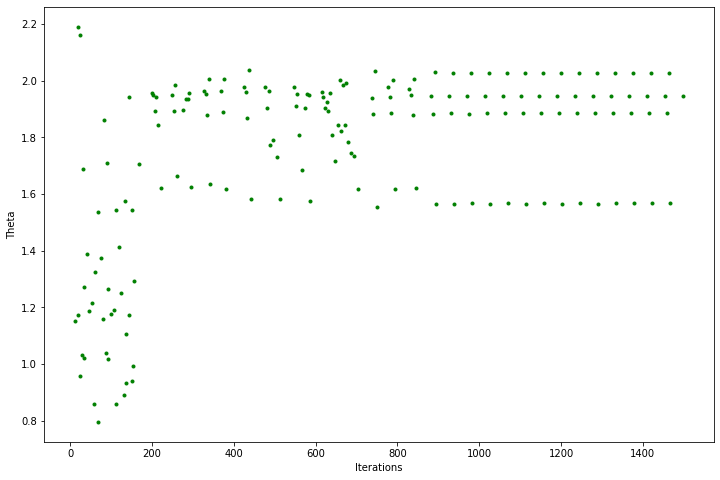

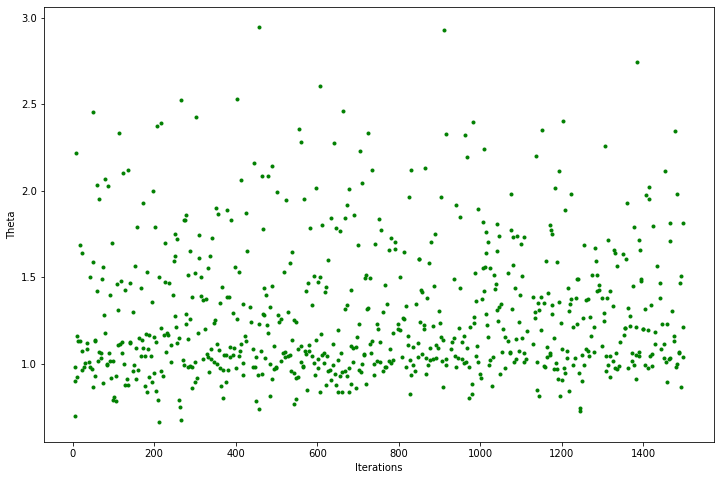

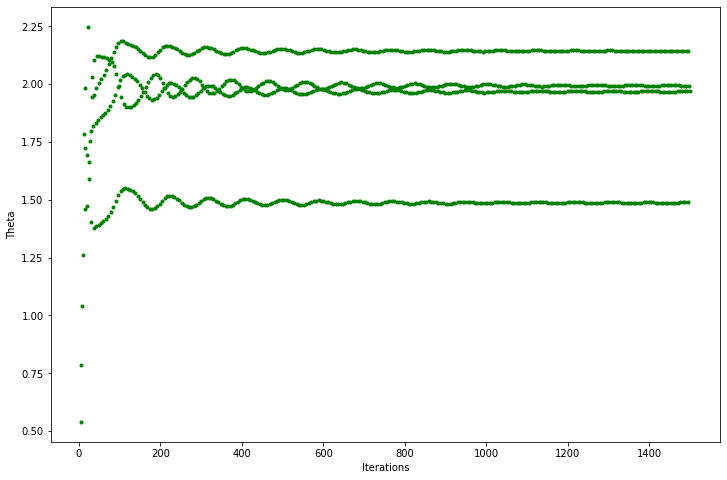

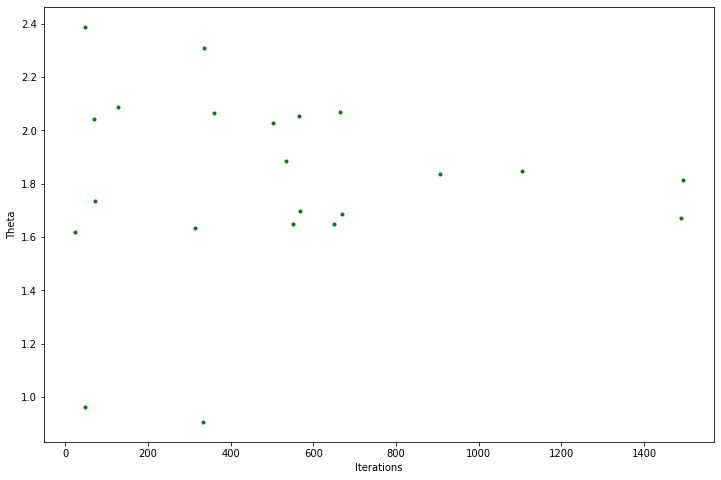

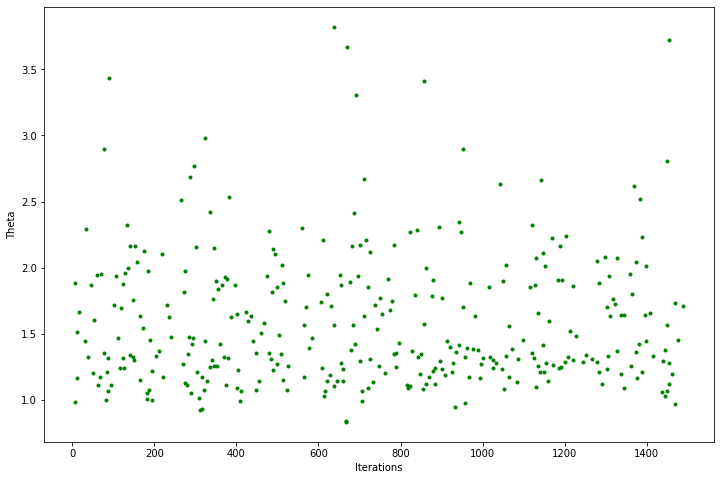

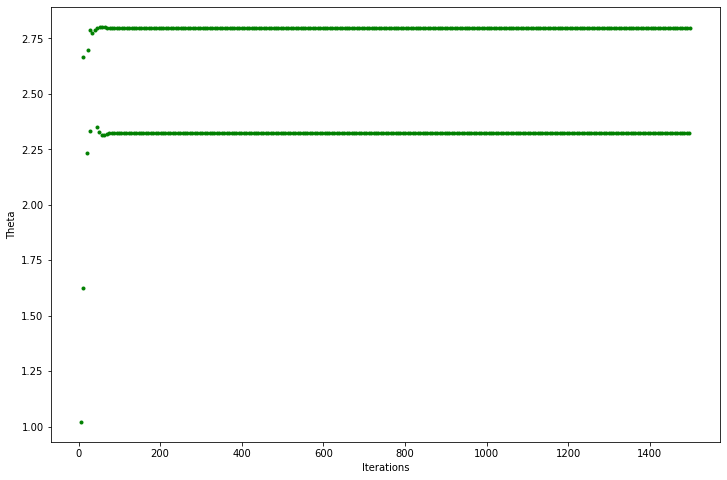

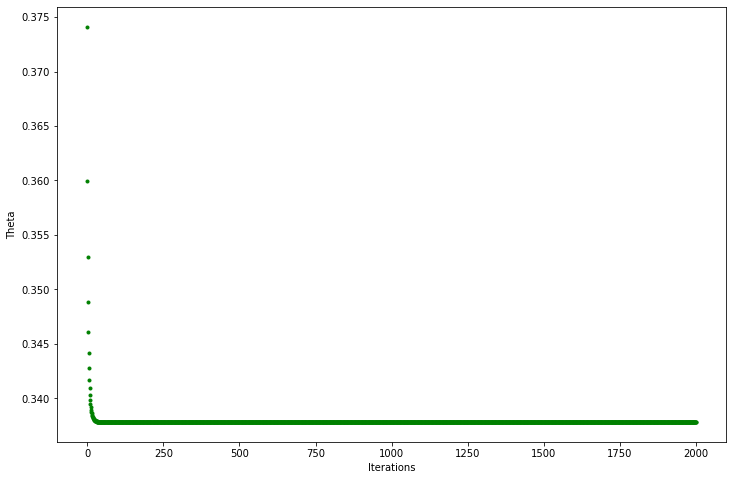

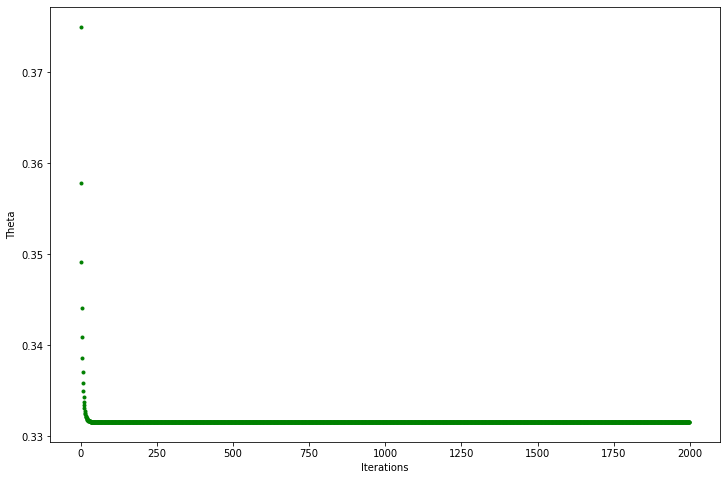

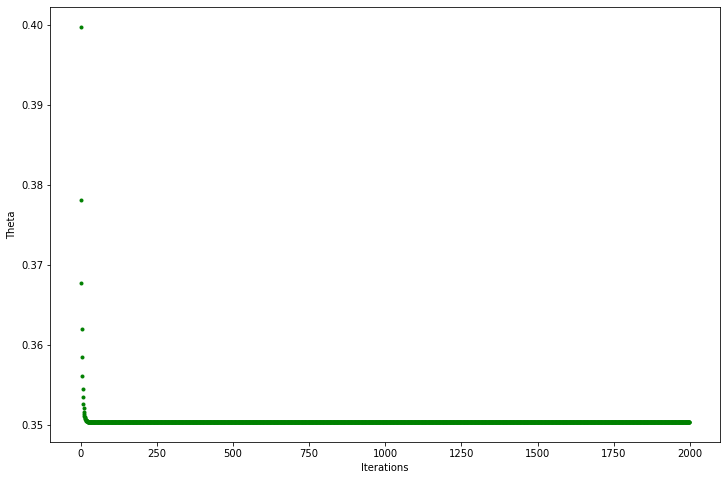

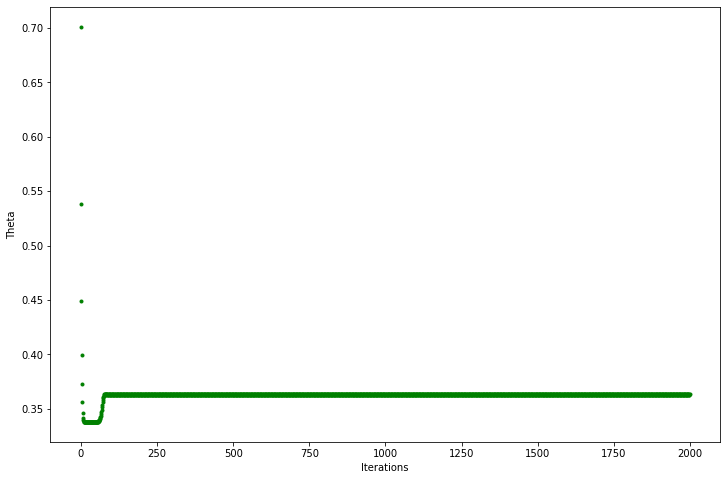

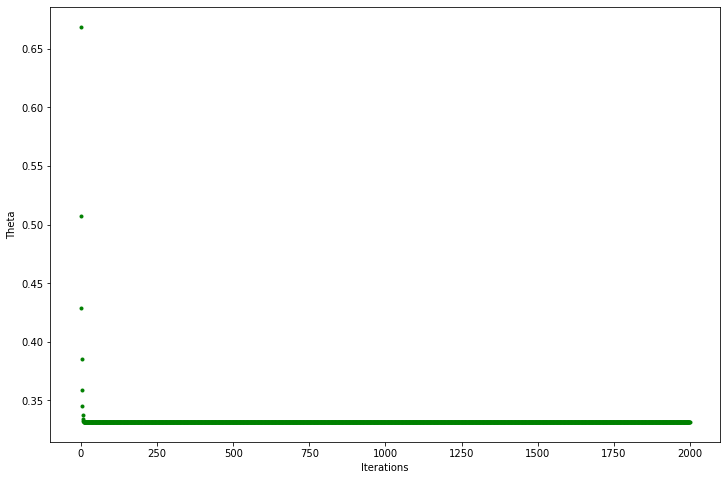

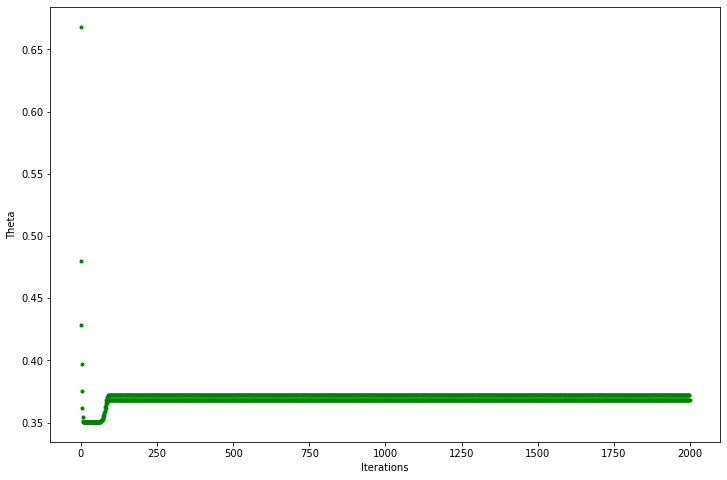

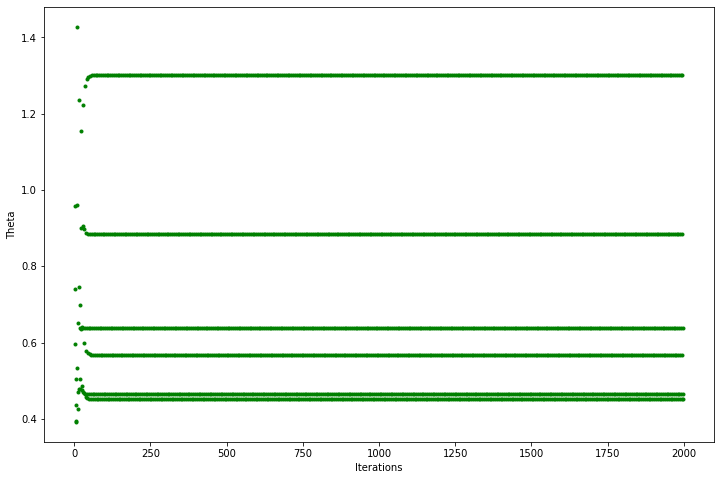

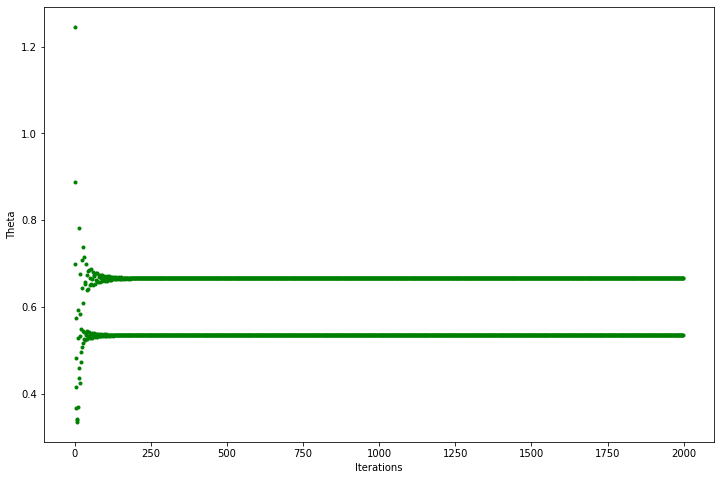

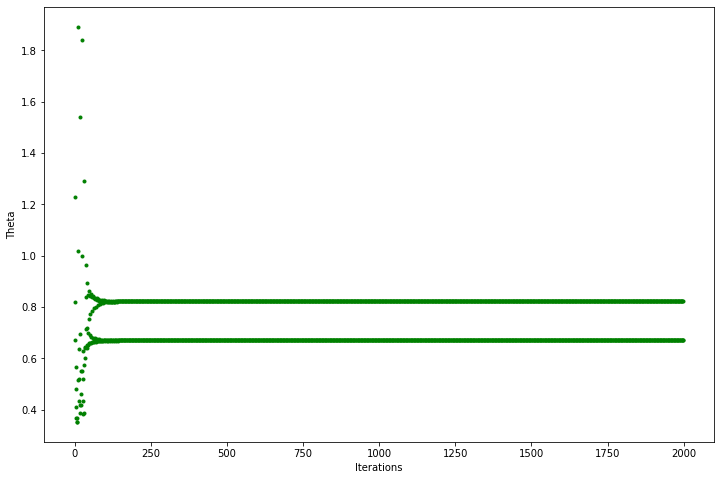

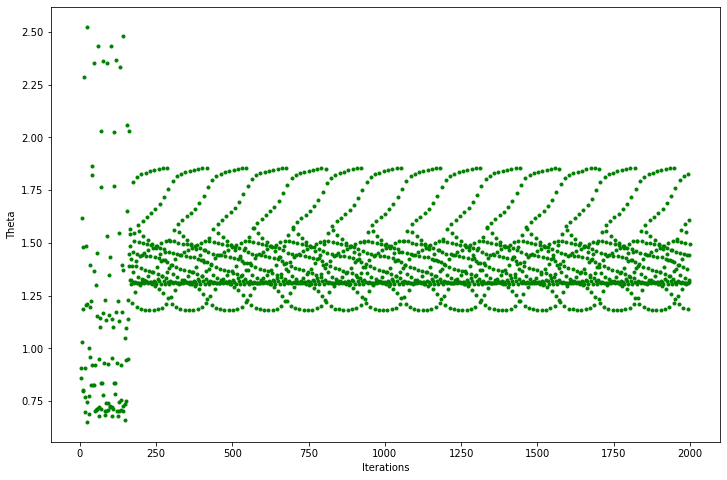

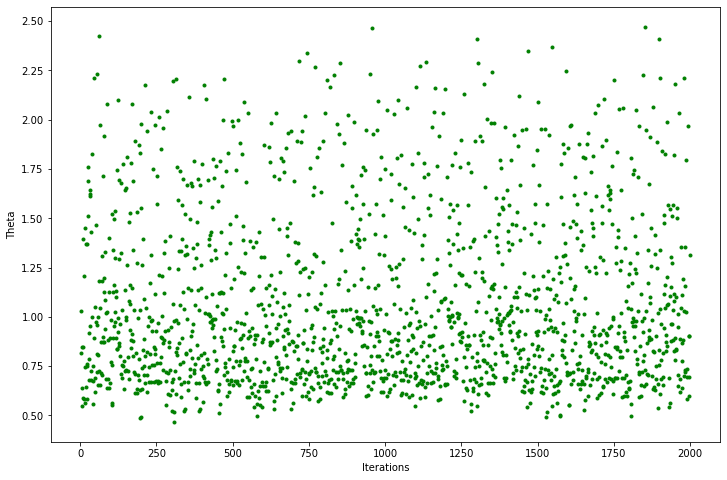

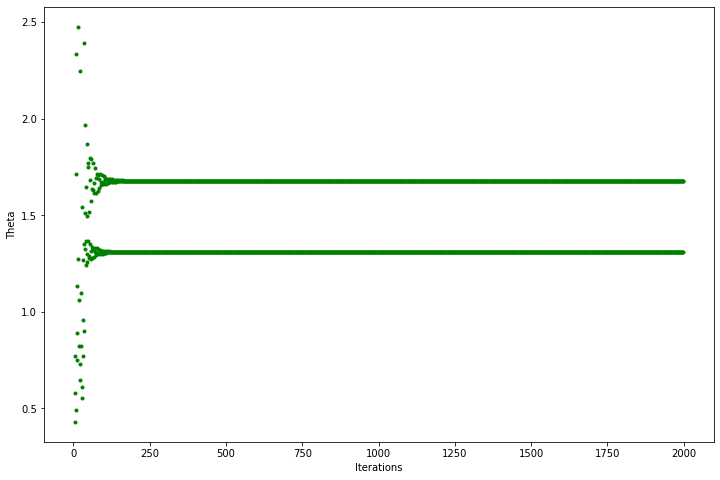

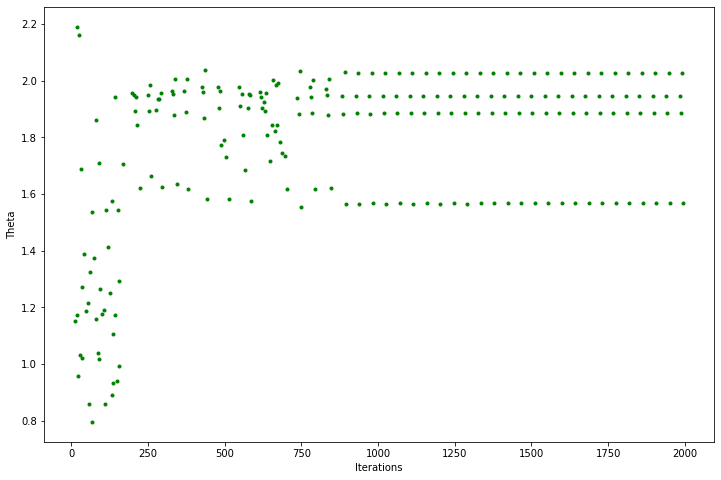

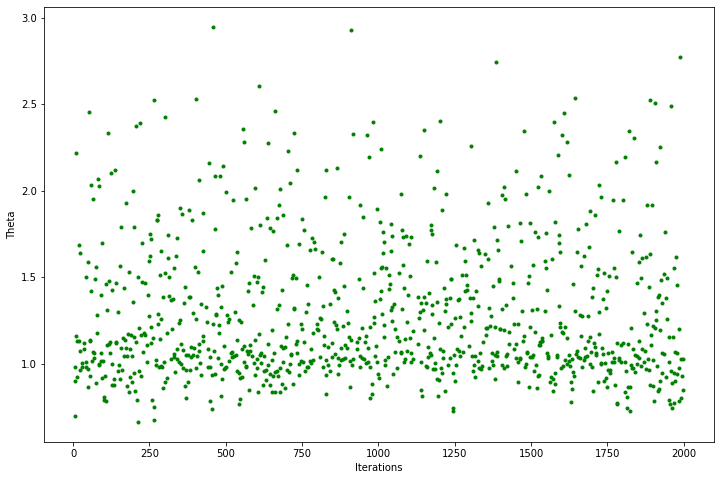

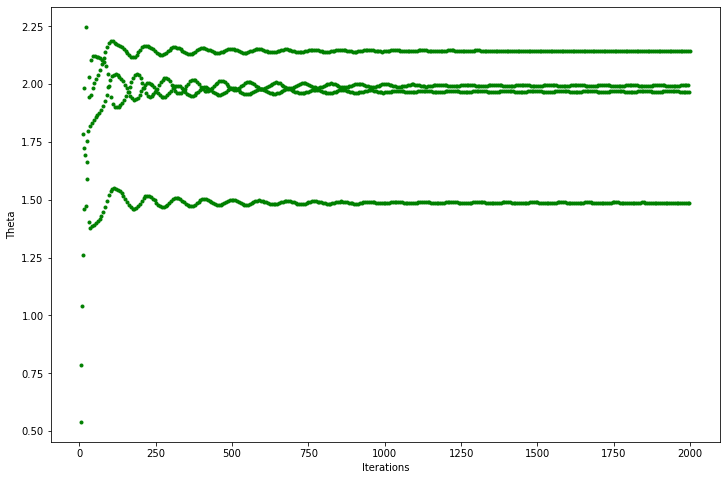

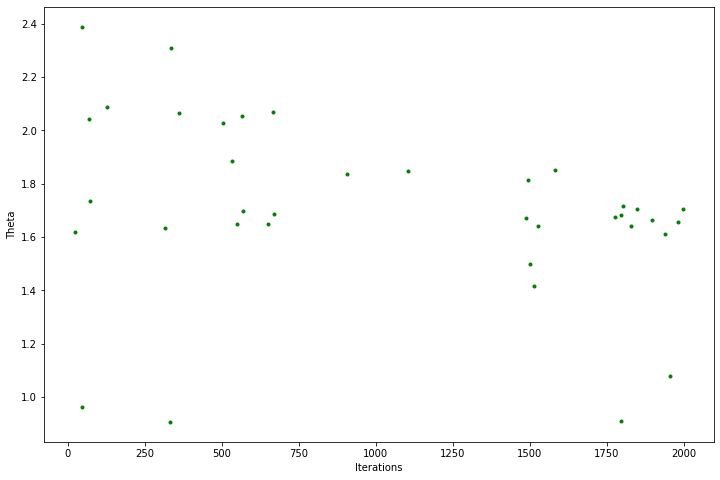

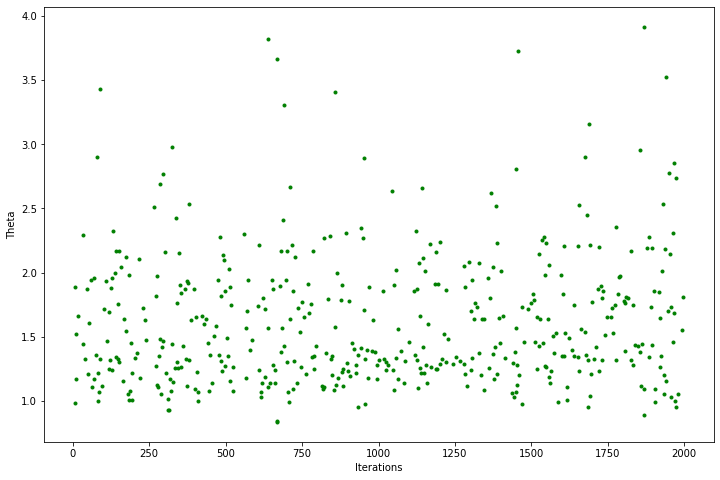

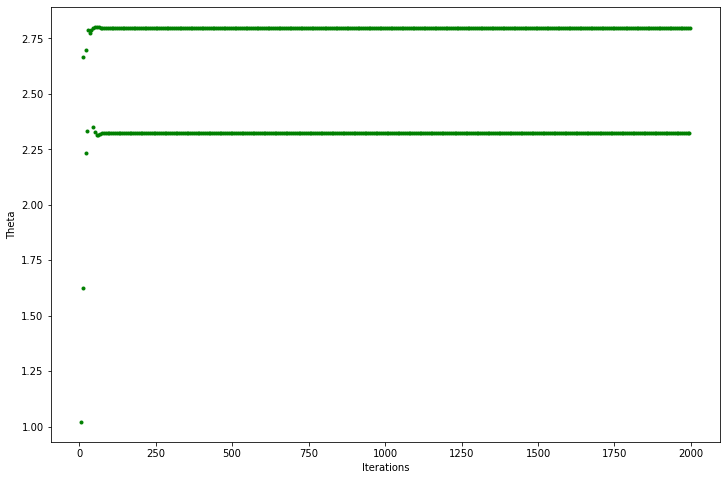

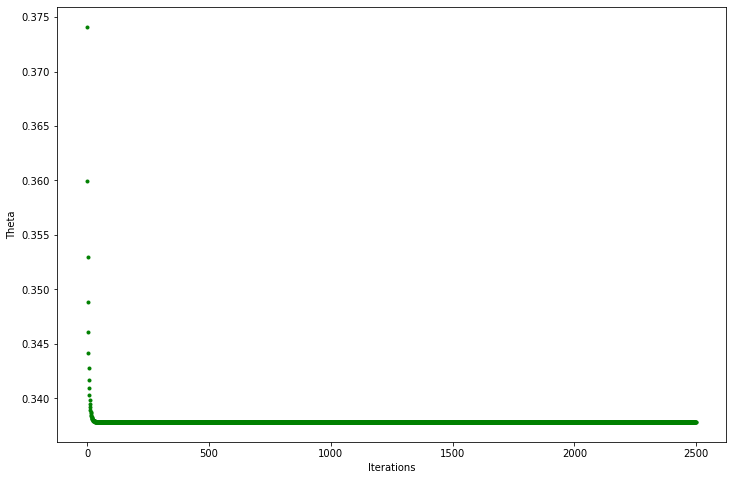

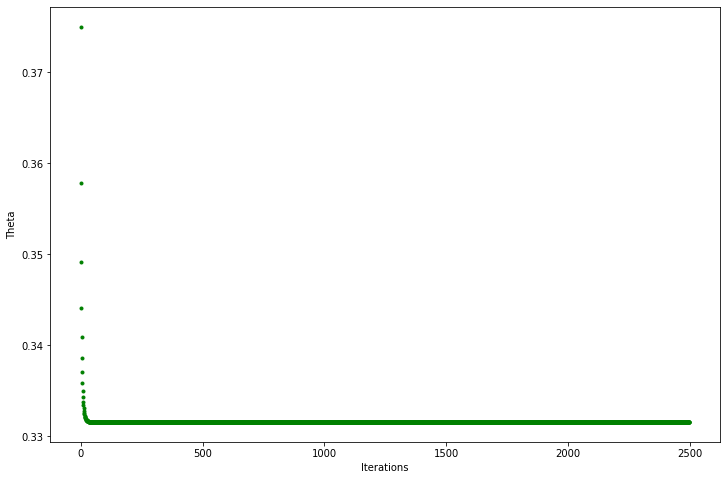

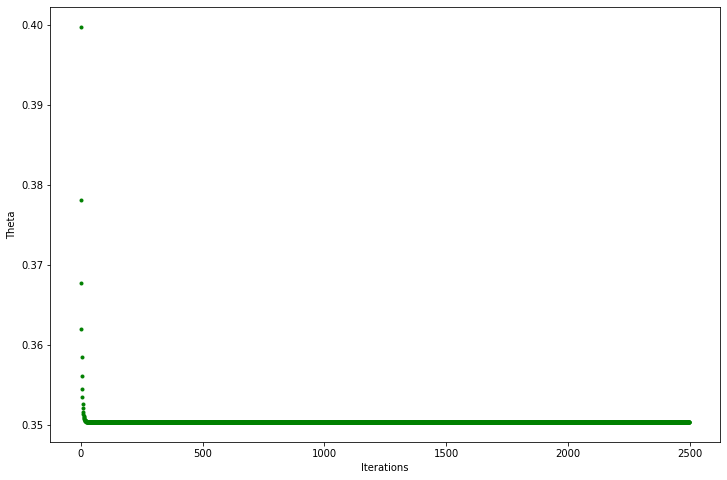

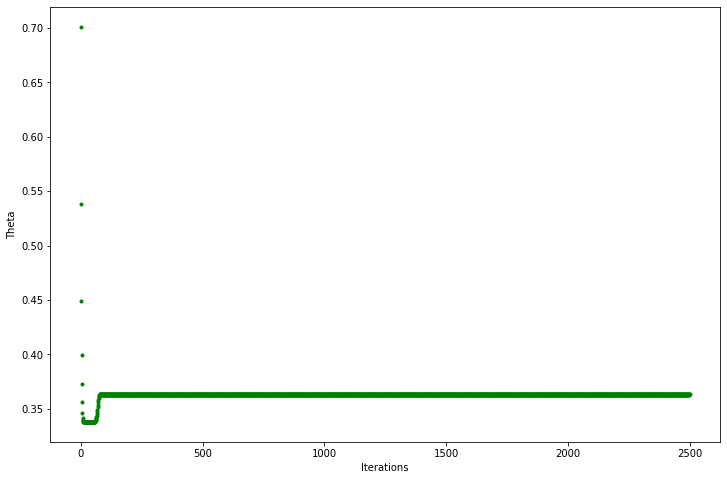

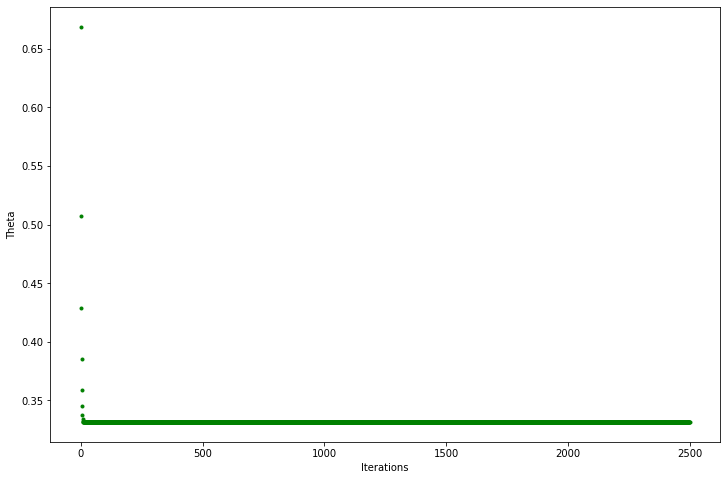

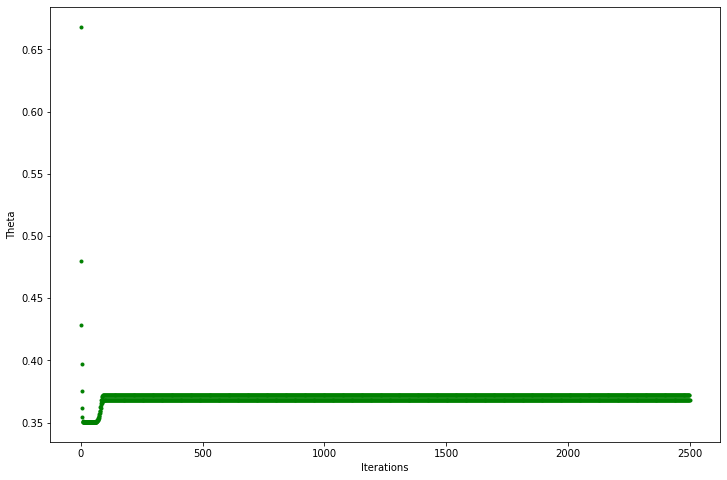

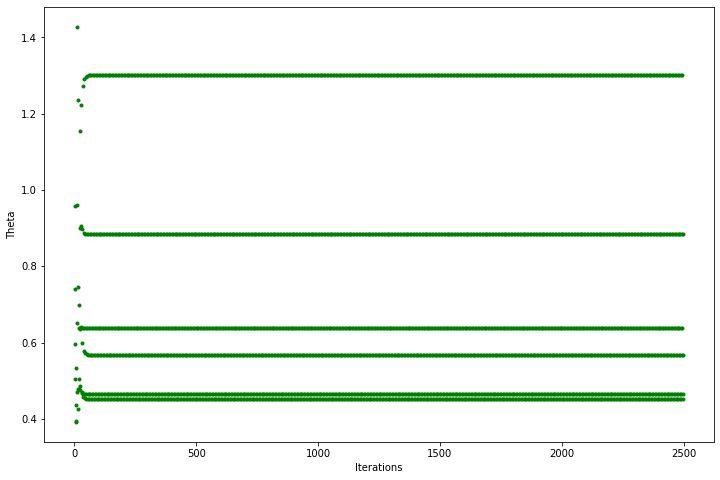

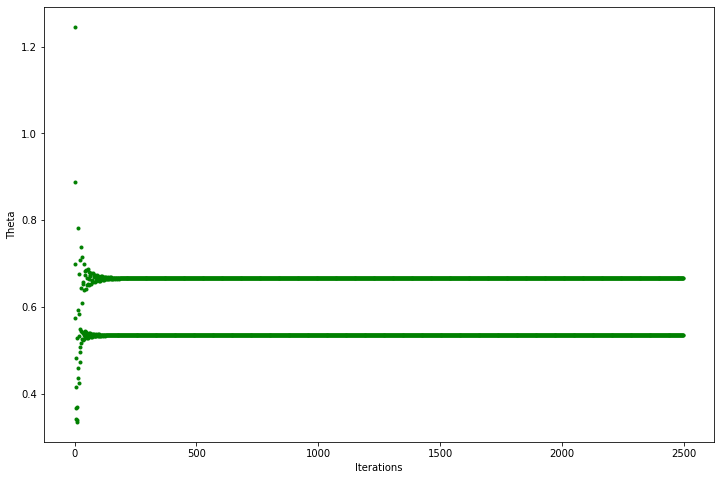

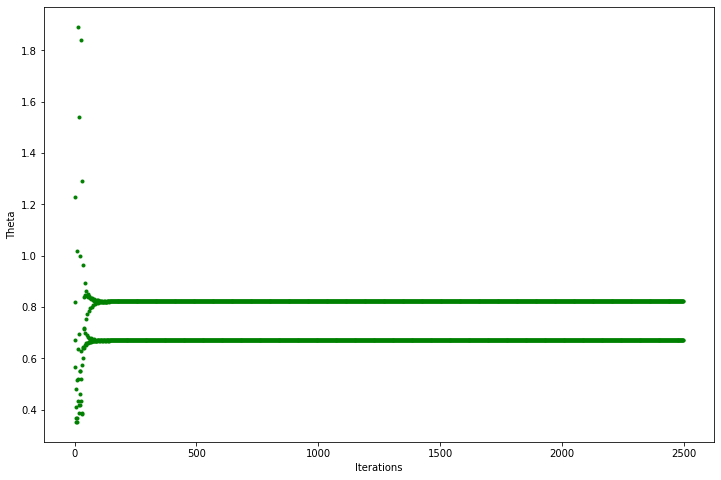

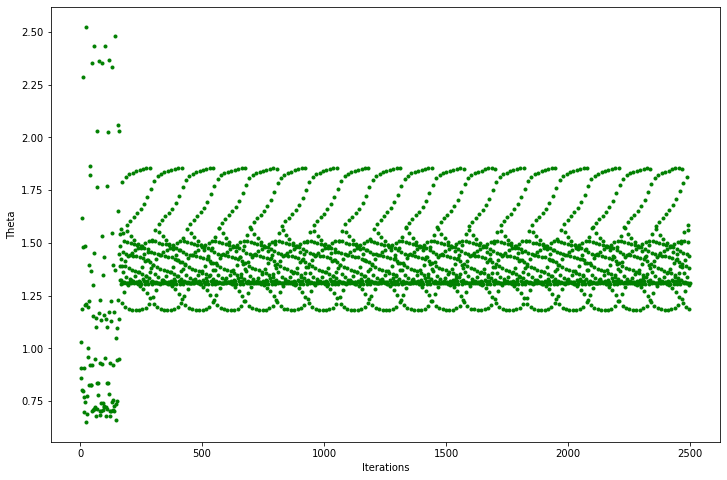

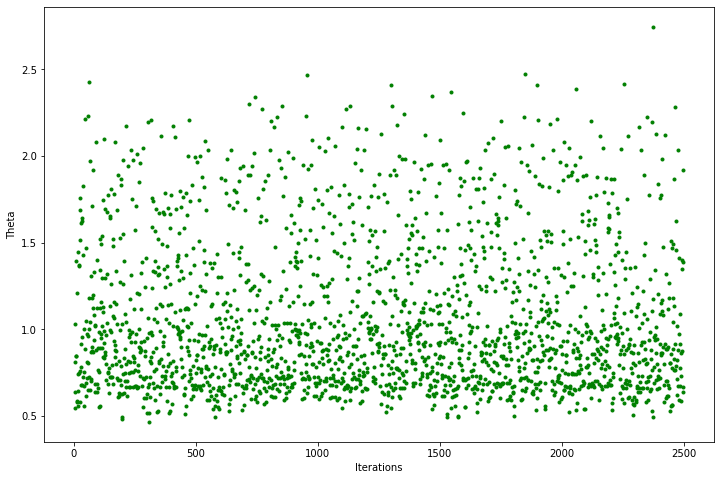

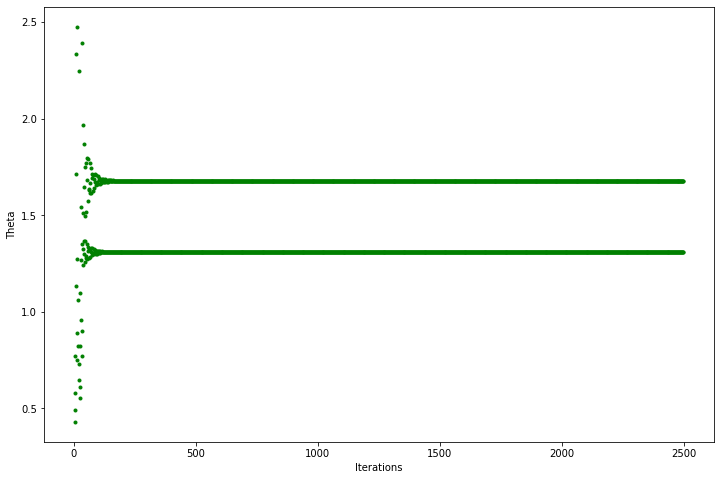

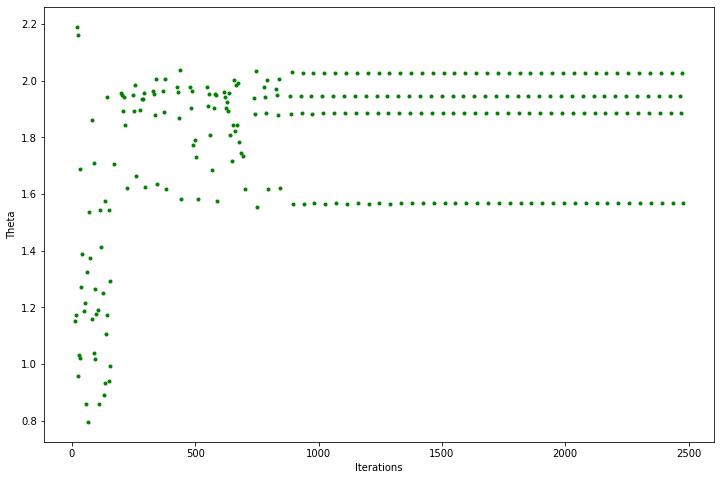

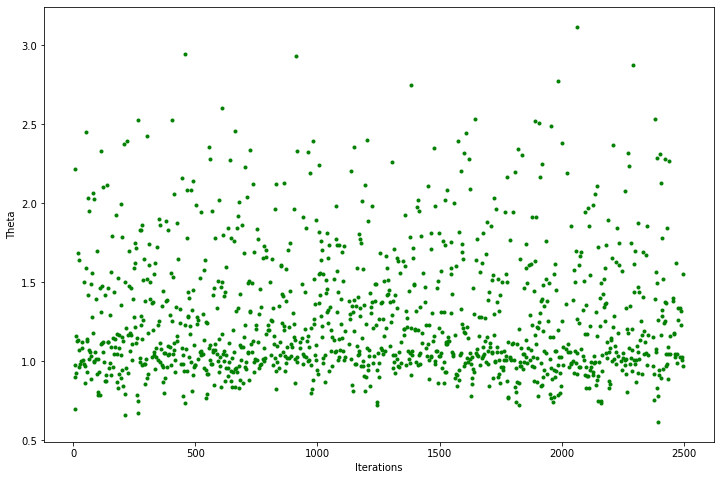

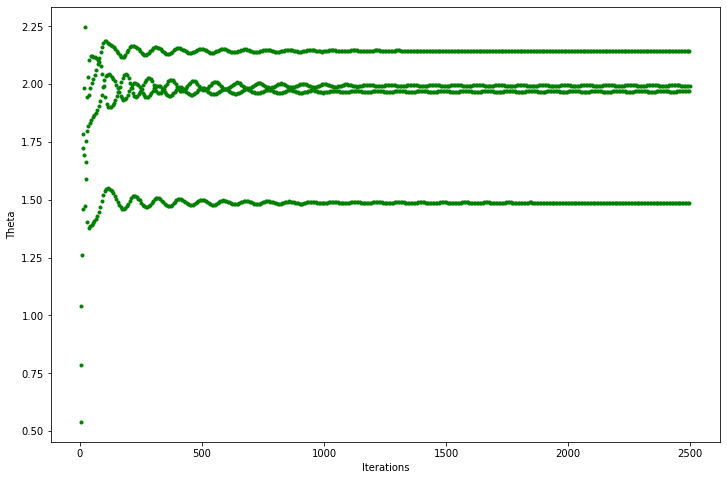

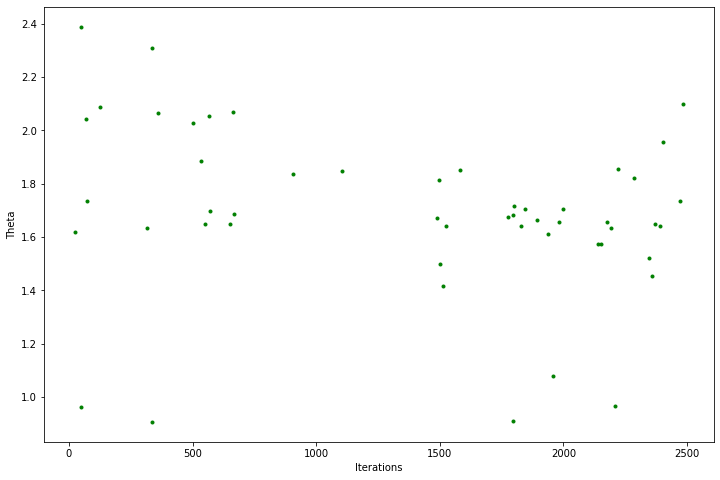

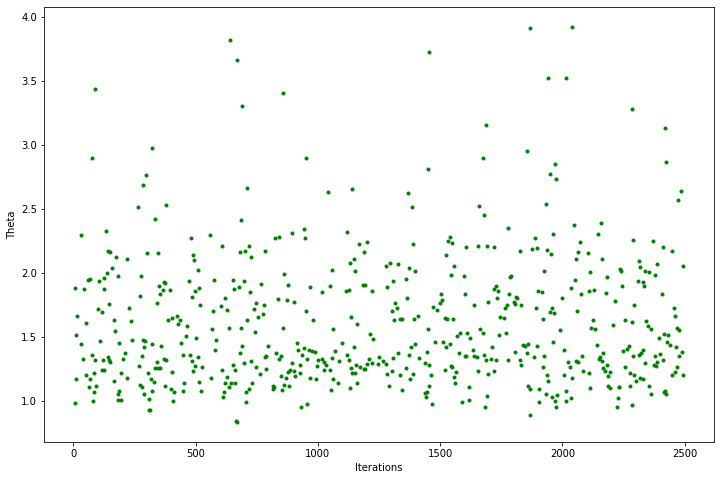

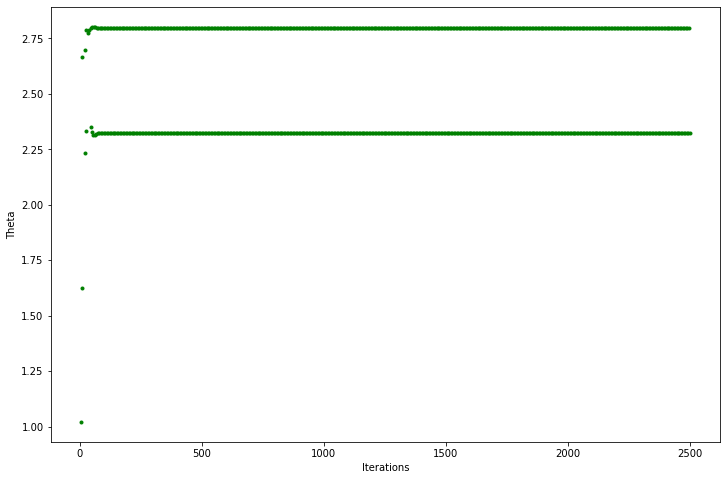

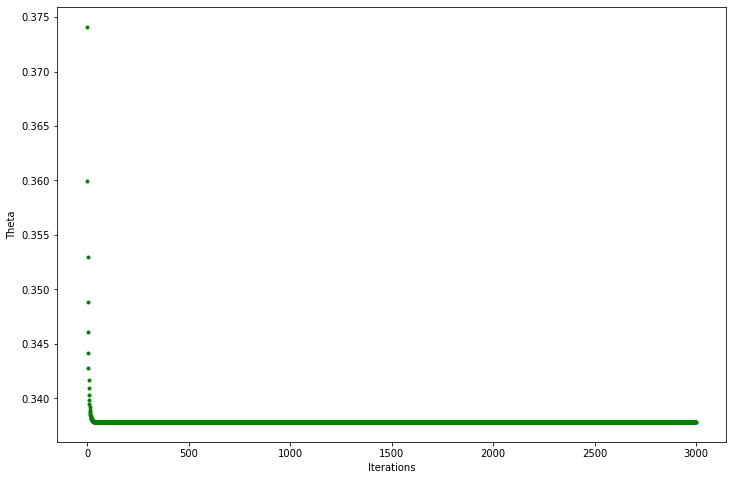

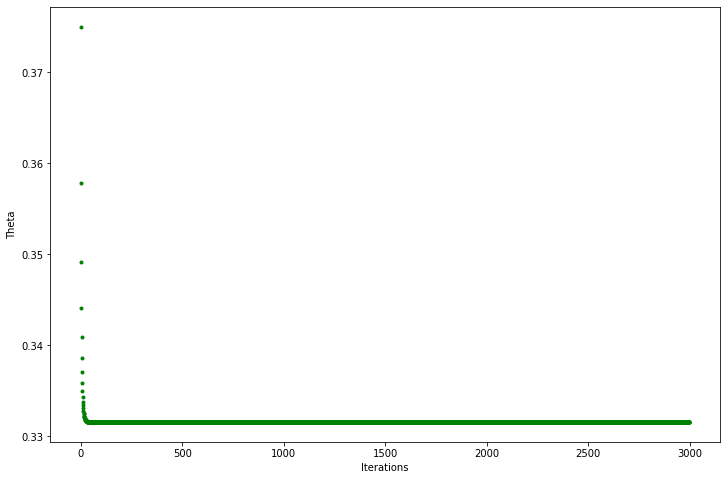

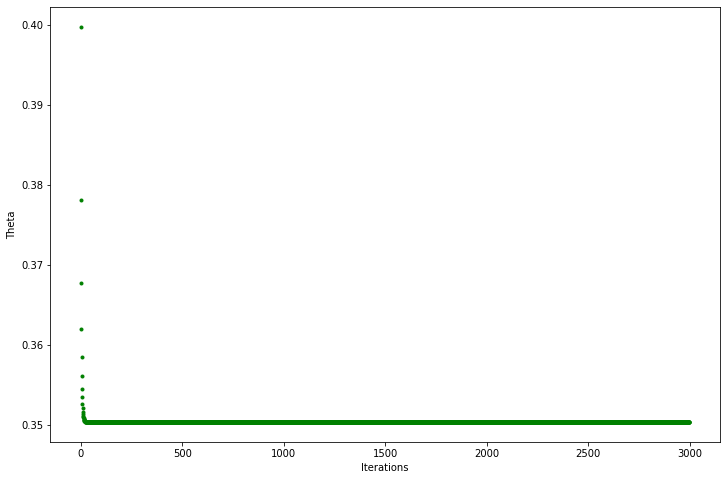

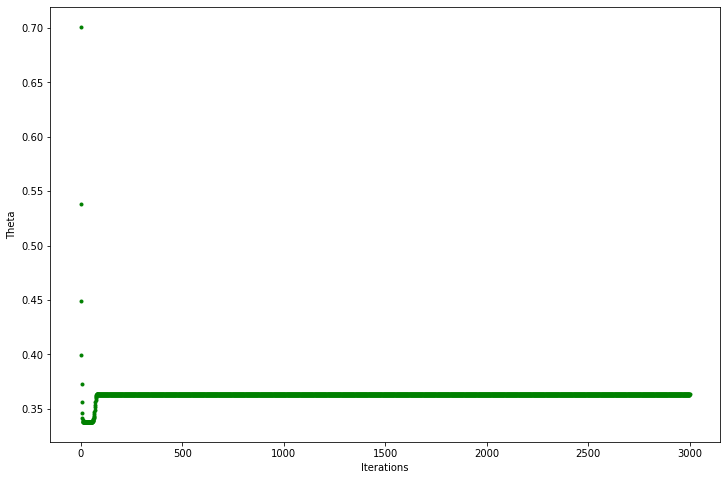

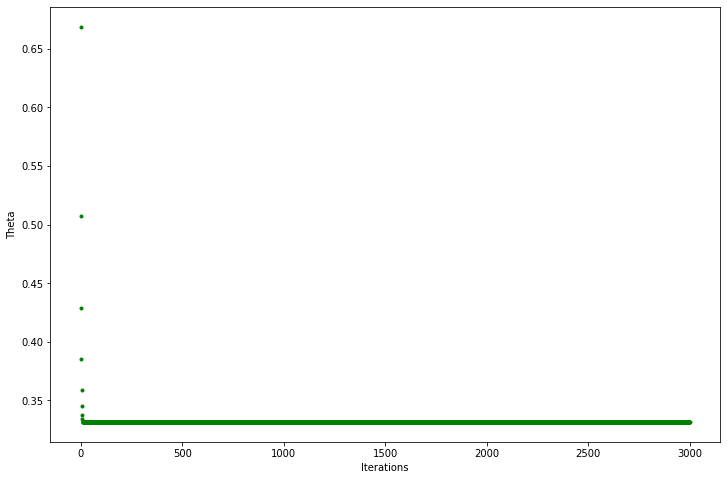

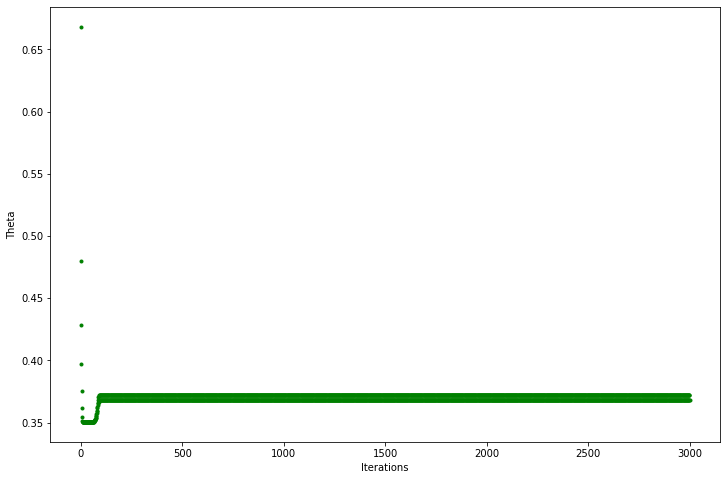

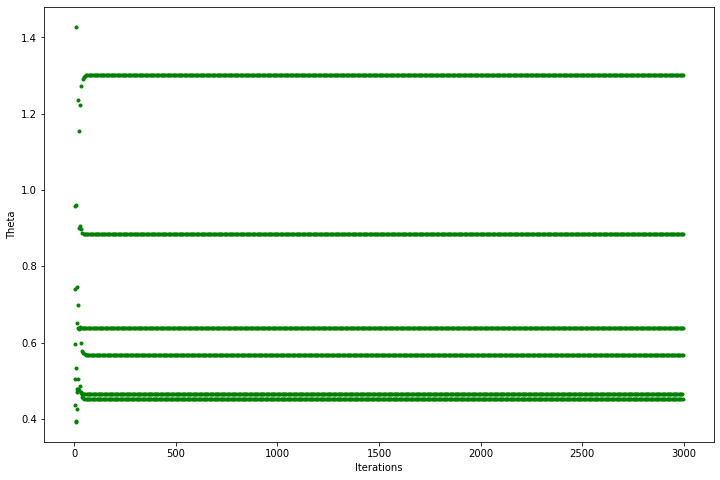

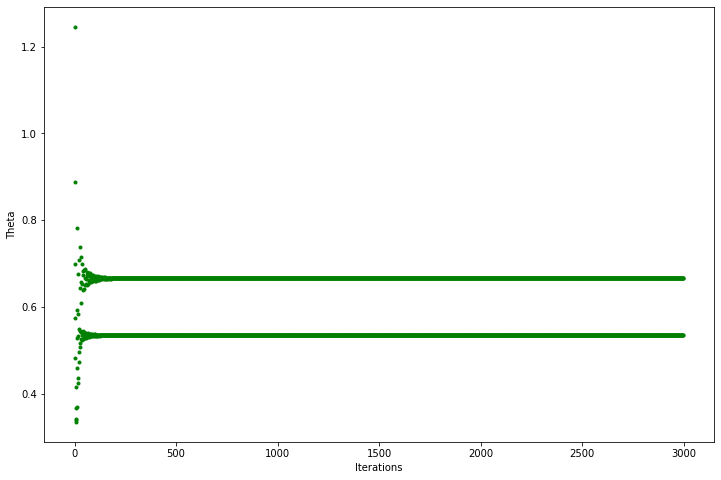

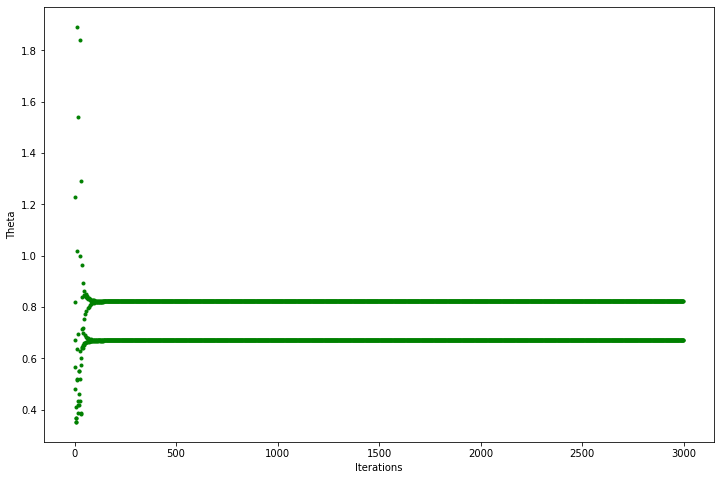

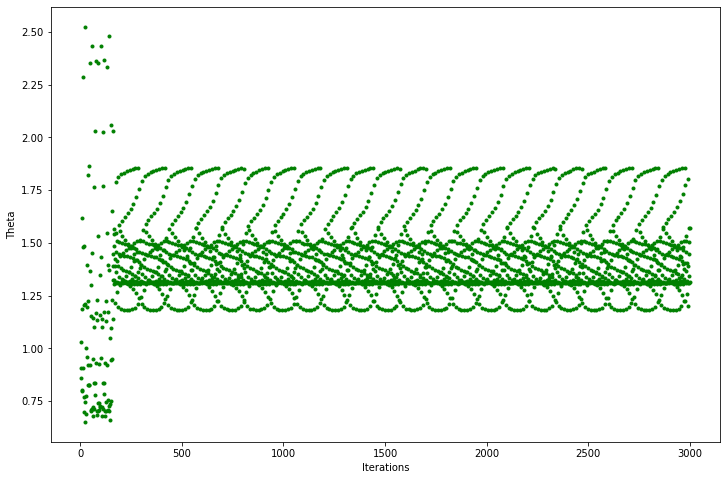

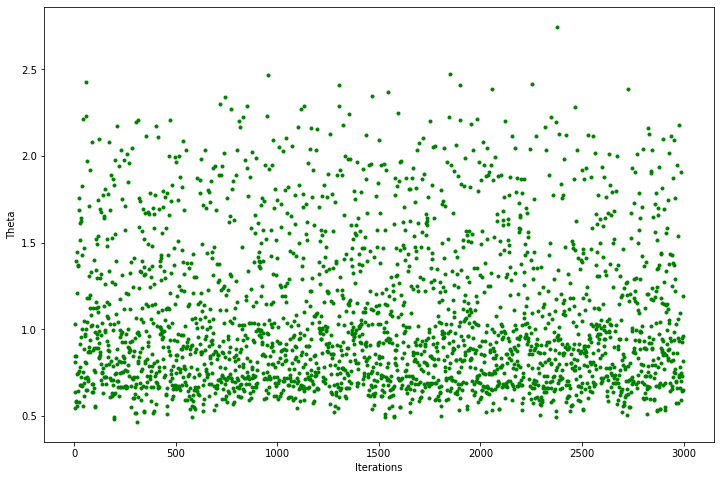

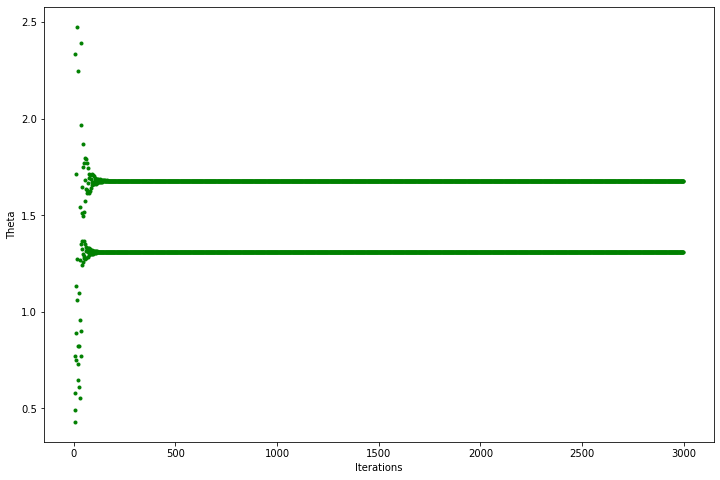

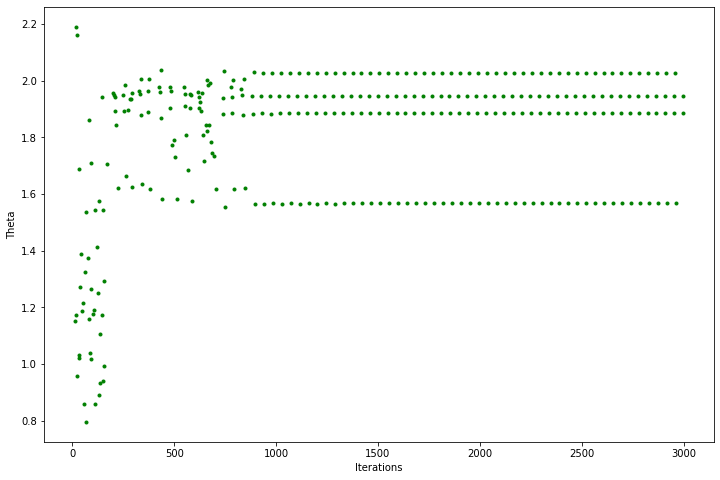

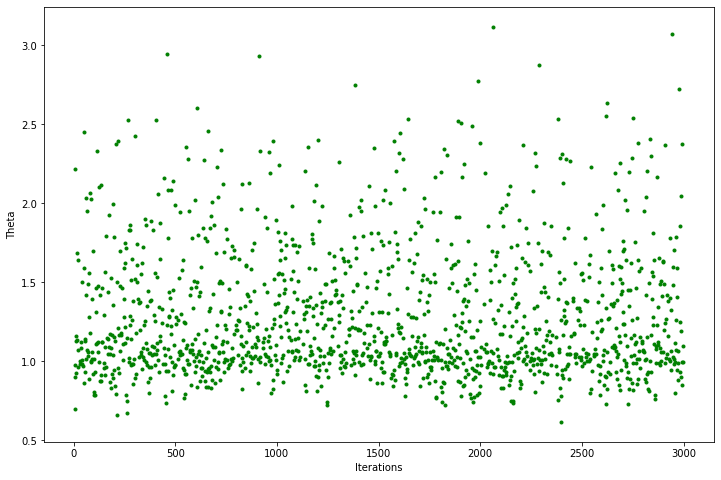

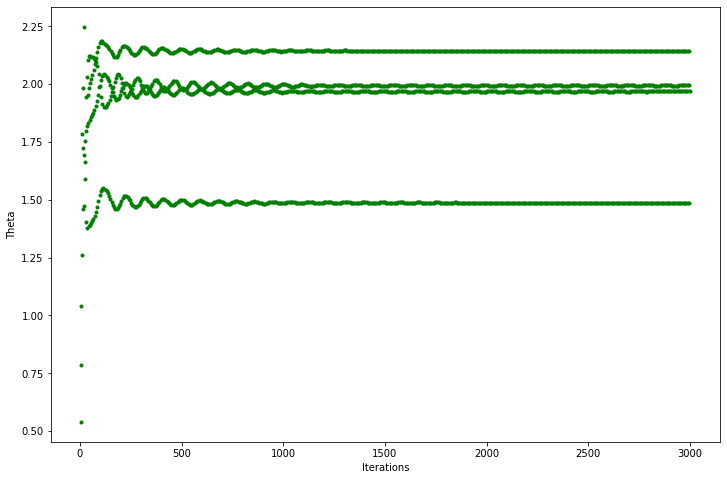

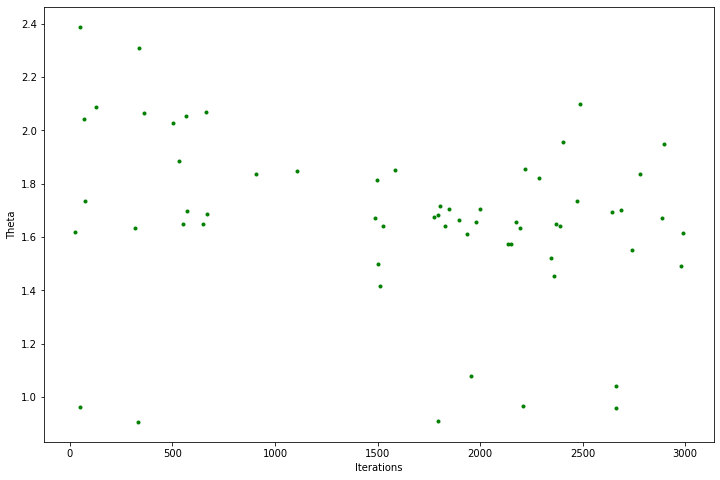

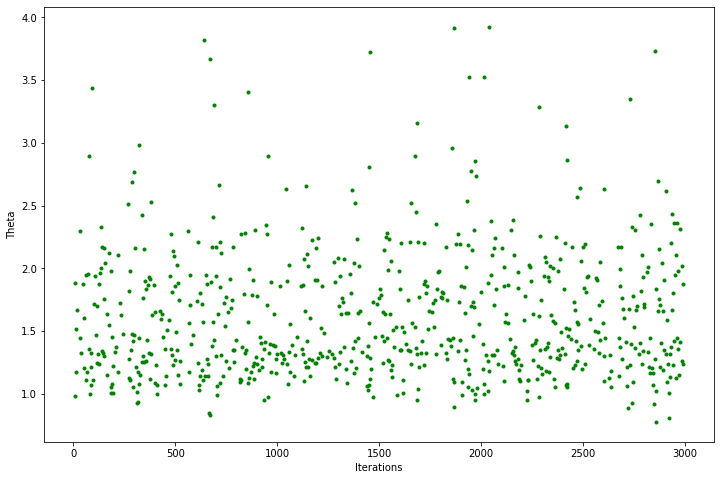

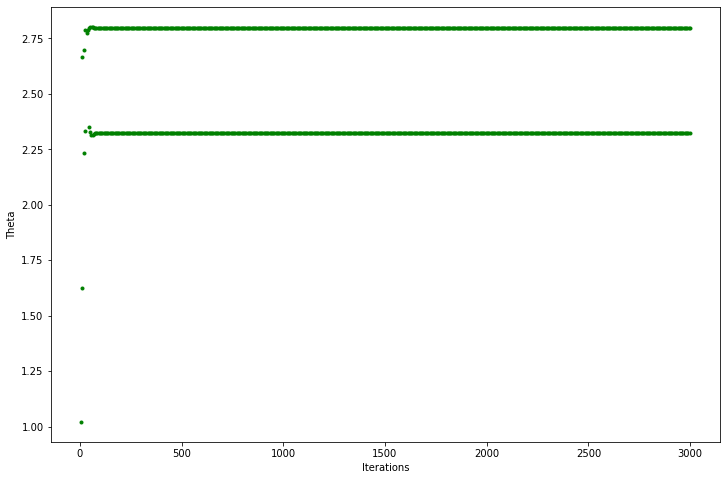

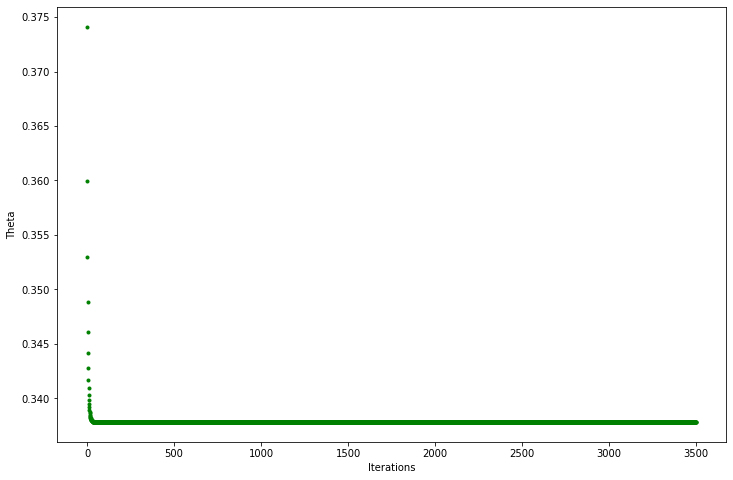

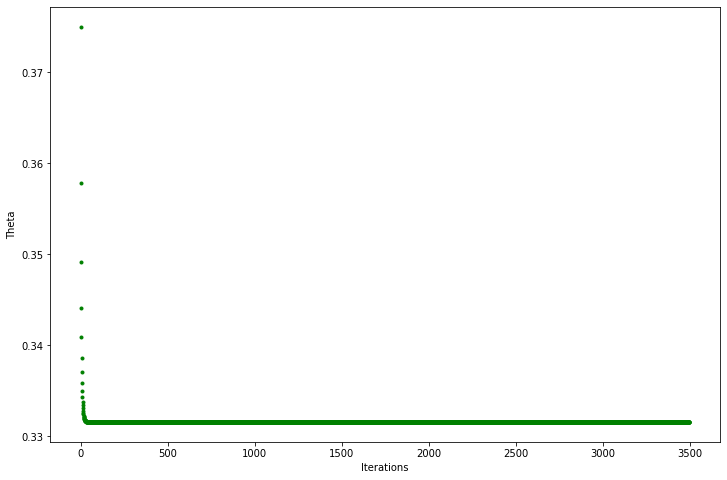

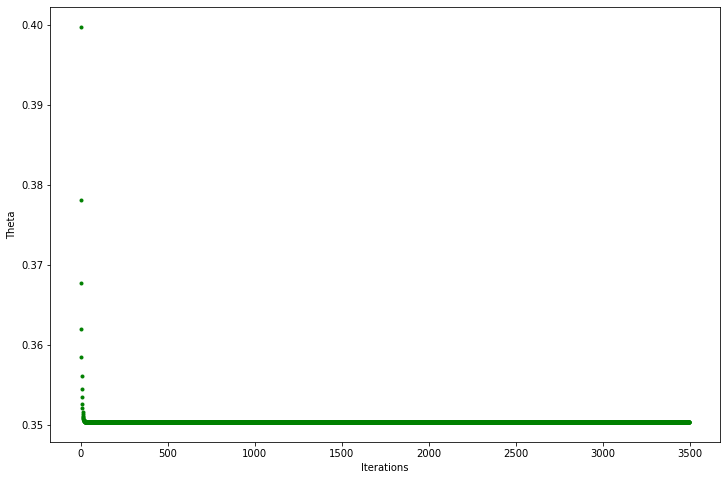

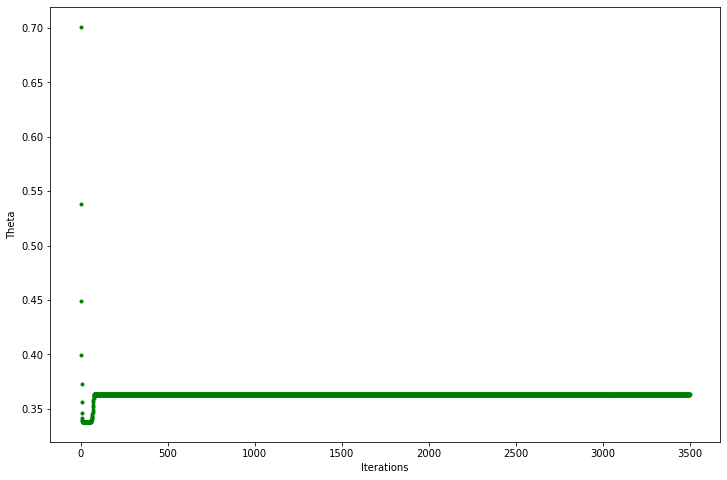

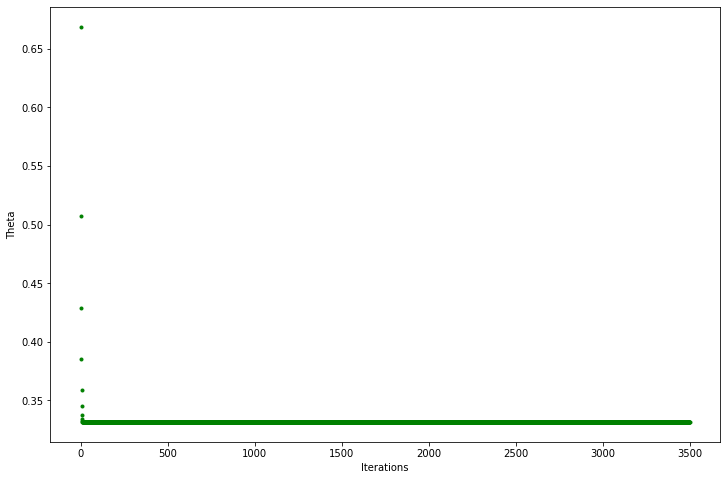

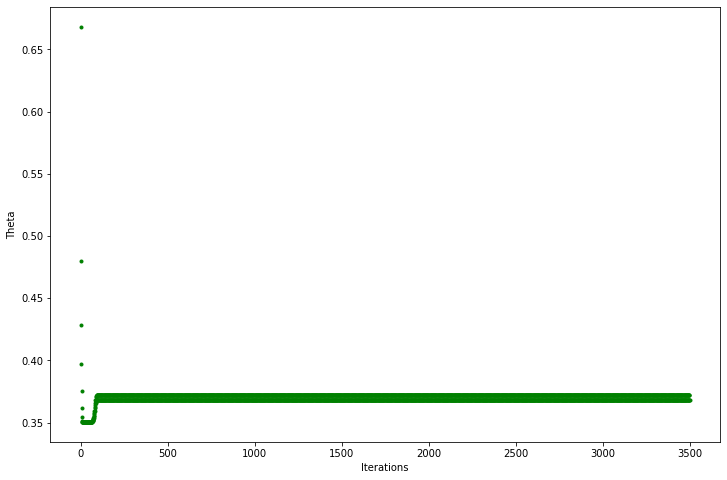

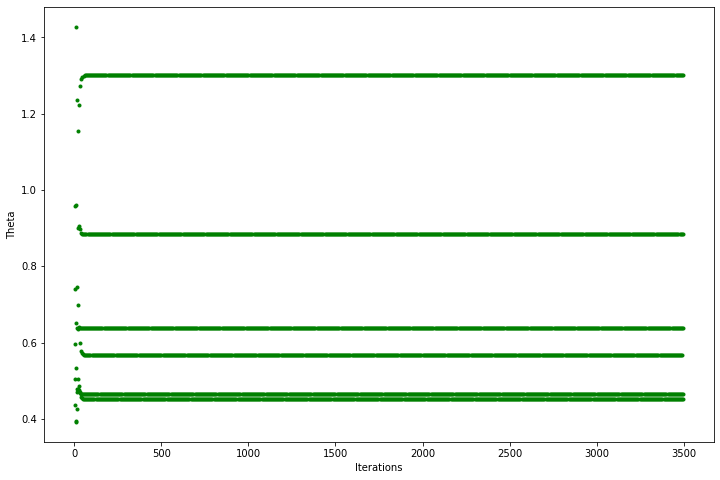

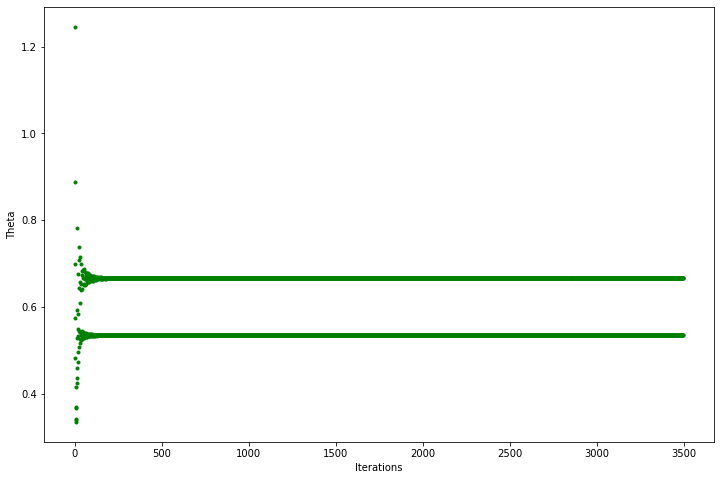

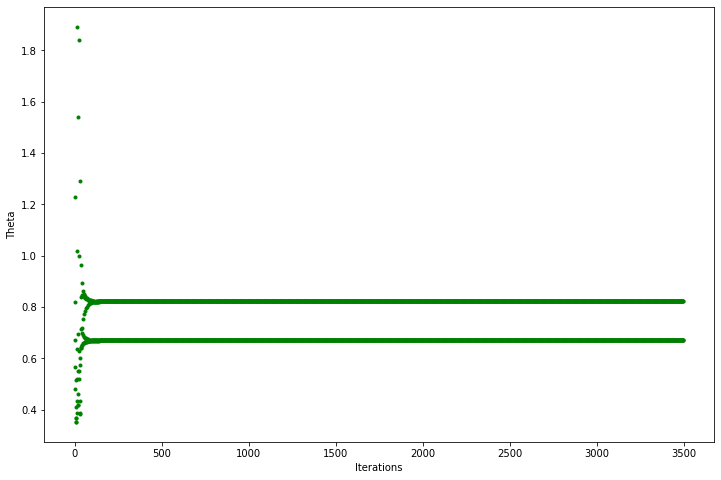

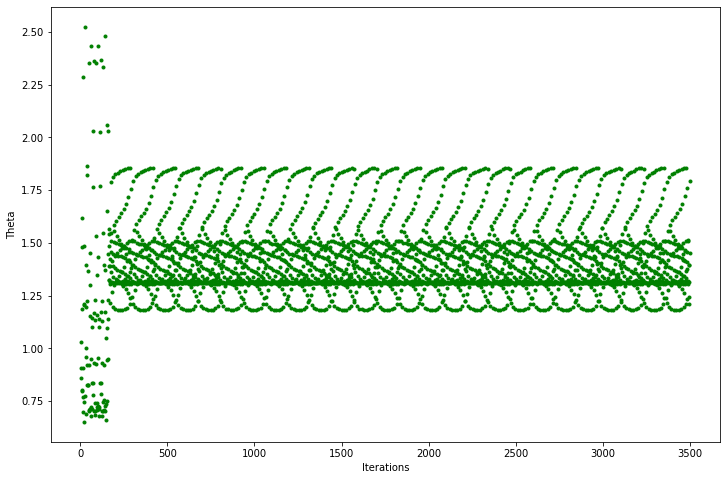

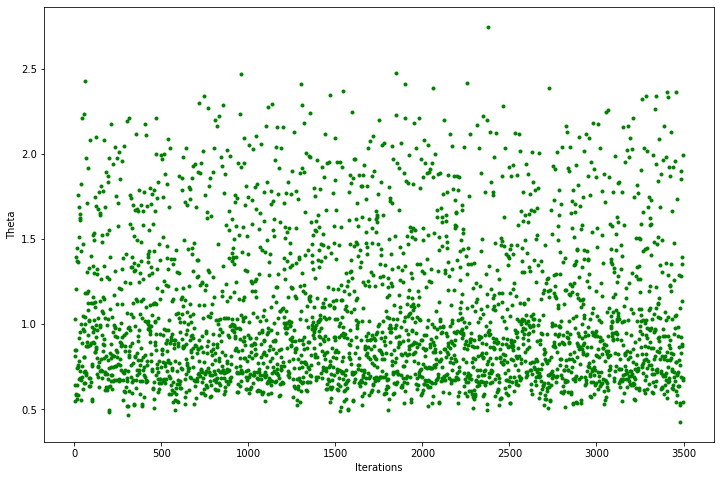

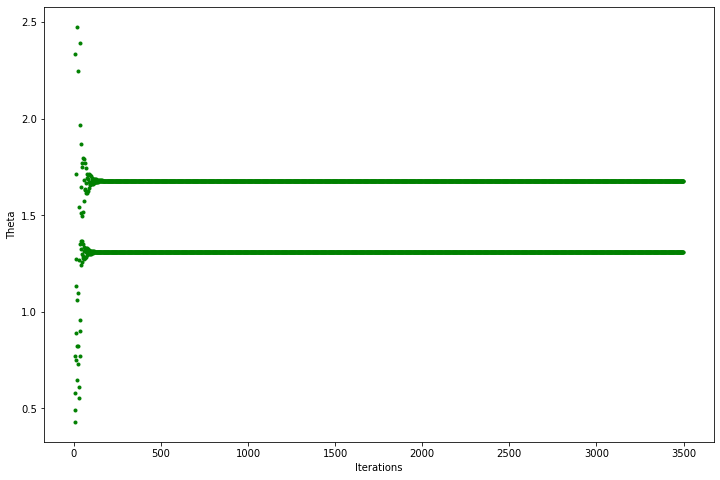

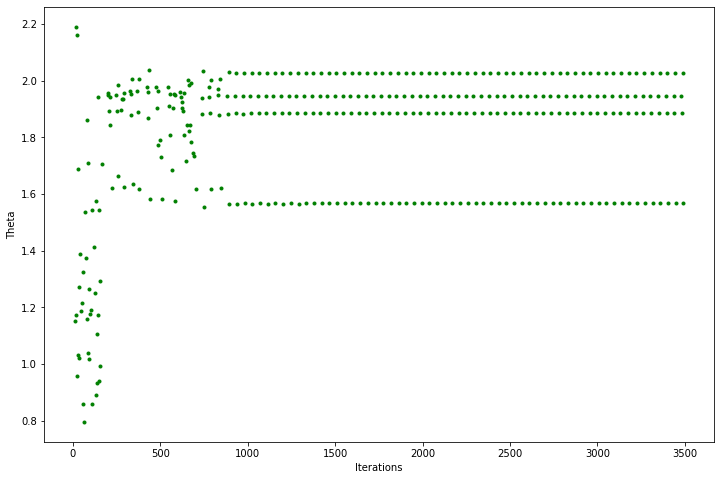

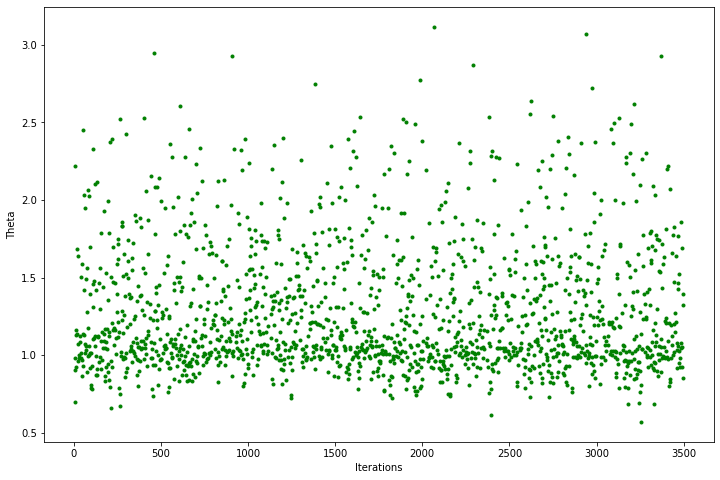

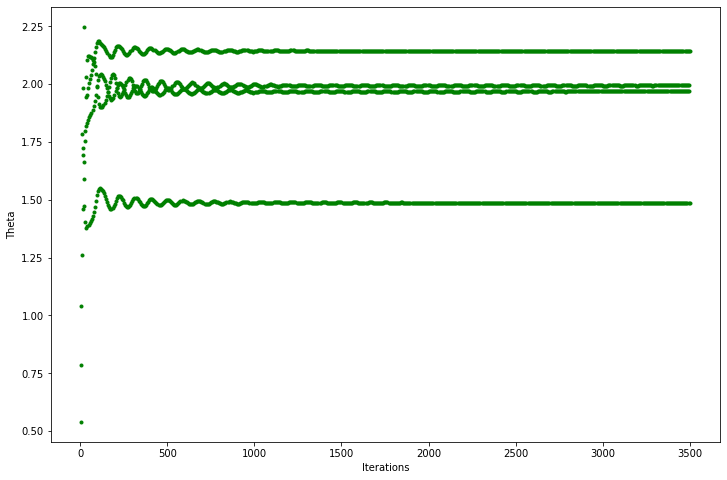

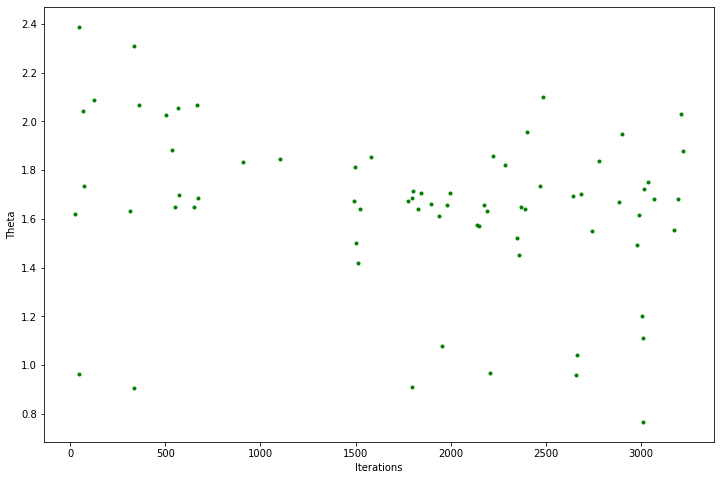

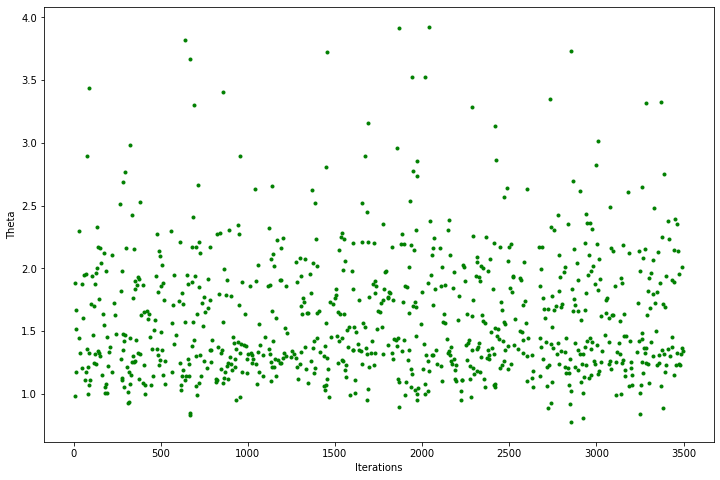

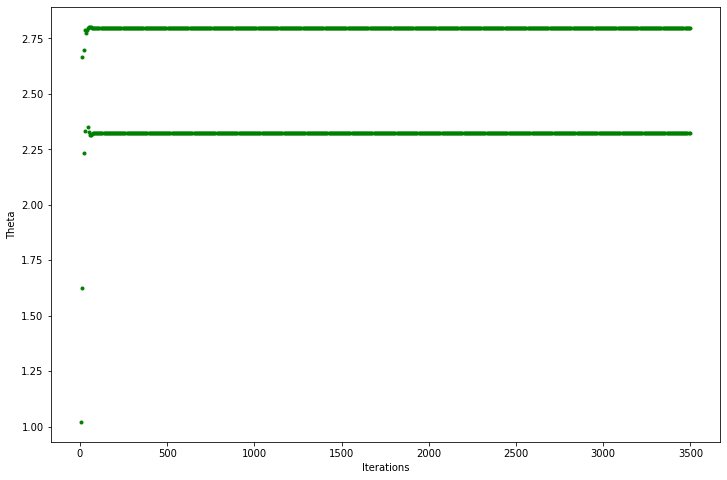

In [17]:
code2 = ""
for i in iteracciones:
    for t in tasas:
        code2 = code2 + str(get_data(sets2, i,t)) + ' - '
    code2 += '\n'
    
print (code2)